In [1]:
import pandas as pd
#Load my dataset with an updated date format and lets get analyzing
df = pd.read_csv('C:/Users/srsch/OneDrive/Desktop/merged_steel_weather_data_with_datetime.csv')

print(df.head())



# Check unique values in a specific column
print(df['CO2(tCO2)'].unique())  


print(df['Leading_Current_Reactive_Power_kVarh'].unique())

import psutil
print(f"Memory usage: {psutil.virtual_memory().percent}%")


In [2]:
#Each Time I load this file or any file like this with date, I will need to convert.  
#There is the pickle code, but I will just rerun this code and check data to be sure of findings

#Make sure you're using the same DataFrame name throughout your code - oops, I not sure what happeeed

#Load data
df = pd.read_csv('C:/Users/srsch/OneDrive/Desktop/merged_steel_weather_data_with_datetime.csv') 

#Convert date to datetime Again
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
print(f"Date column type after conversion: {df['date'].dtype}")
#I am circling back because 
#Check data
print("\nChecking data types:")
print(df.dtypes)
print("\nUnique dates:")
print(df['date'].unique())
print("\nFirst few rows:")
df.head()

Date column type after conversion: datetime64[ns]

Checking data types:
date                                    datetime64[ns]
Usage_kWh                                      float64
Lagging_Current_Reactive.Power_kVarh           float64
Leading_Current_Reactive_Power_kVarh           float64
CO2(tCO2)                                      float64
Lagging_Current_Power_Factor                   float64
Leading_Current_Power_Factor                   float64
NSM                                              int64
WeekStatus                                      object
Day_of_week                                     object
Load_Type                                       object
date_only                                       object
time_only                                       object
time_numeric_dec                               float64
time_seconds_since_midnight                      int64
temperature_2m (°C)                            float64
relative_humidity_2m (%)                       f

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0 2018-01-01 00:15:00       3.17                                  2.95   
1 2018-01-01 00:30:00       4.00                                  4.46   
2 2018-01-01 00:45:00       3.24                                  3.28   
3 2018-01-01 01:00:00       3.31                                  3.56   
4 2018-01-01 01:15:00       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type   date_only time_only  time_numeric_dec  \
0    Weekday      Monday  Light_Load  2018-01-01  00:15:00              0.25   
1    Weekday      Monday  Light_Load  2018-01-01  00:30:00              0.50   
2    Weekday      Monday  Light_Load  2018-01-01  00:45:00              0.75   
3    Weekday      Monday  Light_Load  2018-01-01  01:00:00              1.00   
4    Weekday      Monday  Light_Load  2018-01-01  01:15:00              1.25   

   time_seconds_since_midnight  temperature_2m (°C)  relative_humidity_2m (%)  \
0                          900                 -1.3                      63.0   
1                         1800                 -1.3                      63.0   
2                         2700                 -1.3                      63.0   
3                         3600                 -1.5                      65.0   
4                         4500                 -1.5                      65.0   

   dew_point_2m (°C)  precipitation (mm)  Load_Type_Rank  
0               -7.5                 0.0               1  
1               -7.5                 0.0               1  
2               -7.5                 0.0               1  
3               -7.3                 0.0               1  
4               -7.3                 0.0               1

In [3]:
!pip install seaborn



#scatter plots as my first looksies  
#Need to load and import the powerful pandas (I forgot again)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates  # Added import for mdates

columns_to_plot = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
                   'Leading_Current_Reactive_Power_kVarh', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor',  # Added missing comma here
                   'CO2(tCO2)', 'NSM', 'dew_point_2m (°C)', 'precipitation (mm)',
                   'temperature_2m (°C)', 'relative_humidity_2m (%)', 'Load_Type_Rank']

#Create figure and axes objects before using them
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(12, 4*len(columns_to_plot)))  # Create figure and axes
date_form = mdates.DateFormatter("%Y-%m-%d")  # Define date_form formatter

for i, column in enumerate(columns_to_plot):
    #Using df instead of data.  I need to stick to df 
    sns.scatterplot(x='date', y=column, data=df, ax=axes[i], alpha=0.5)
    
    #Add trend line
    try:
        sns.regplot(x=mdates.date2num(df['date']), y=df[column], 
                   ax=axes[i], scatter=False, color='red', line_kws={"linestyle": "--"})
    except:
        pass
        
    axes[i].set_title(f'{column} vs Date')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(column)
    axes[i].xaxis.set_major_formatter(date_form)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()  # Add tight_layout for better spacing
plt.show()  # Display the plot

# Time series visualization for key energy and weather variables
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Select a subset of the most important variables
key_variables = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Lagging_Current_Power_Factor','CO2(tCO2)',
                'Leading_Current_Reactive_Power_kVarh','Leading_Current_Power_Factor']

# Create figure with subplots
fig, axes = plt.subplots(len(key_variables), 1, figsize=(12, 10), sharex=True)
date_formatter = DateFormatter('%Y-%m-%d')

# Plot each variable as a line plot
for i, var in enumerate(key_variables):
    # Check if the column exists in the dataframe
    if var in df.columns:
        # Line plot with markers at data points
        axes[i].plot(df['date'], df[var], linestyle='-', marker='o', markersize=3, alpha=0.7)
        
        # Add rolling average trend line (7-day window)
        try:
            rolling_avg = df[var].rolling(window=7, center=True).mean()
            axes[i].plot(df['date'], rolling_avg, 'r--', linewidth=2, alpha=0.8, label='7-day avg')
        except:
            pass
        
        # Formatting
        axes[i].set_ylabel(var, fontsize=10)
        axes[i].set_title(f'{var} Over Time', fontsize=12)
        axes[i].grid(True, alpha=0.3)
        axes[i].legend()
        
        # Format x-axis dates
        axes[i].xaxis.set_major_formatter(date_formatter)
        axes[i].xaxis.set_major_locator(mdates.MonthLocator())
    else:
        axes[i].text(0.5, 0.5, f"Column '{var}' not found in dataframe", 
                    horizontalalignment='center', verticalalignment='center')

# Add overall title and adjust layout
plt.suptitle('Energy Usage and Weather Variables Time Series', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust for suptitle
plt.xticks(rotation=45)
plt.show()

# Create a correlation heatmap for relationships between variables
plt.figure(figsize=(10, 8))
# Select numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Calculate correlation matrix
corr_matrix = numeric_df.corr()
# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', annot_kws={"size": 8})
plt.title('Correlation Between Energy Usage and Other Variables')
plt.tight_layout()
plt.show()

#now going to continue to play with the data
#my files were not saved properly .  my fault and ....well not going there

# First,Need to import the necessary libraries (A step often forgotten when returning back)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load DataFrame Using again (another thing forget when jump back on. )
df = pd.read_csv('C:/Users/srsch/OneDrive/Desktop/merged_steel_weather_data_with_datetime.csv')

# Staring with the Histogram to see the distrubtion for each variable.(plotting all so have paste options later)
# Plot 1 - Usage_kWh (fixed the function name from 'lot' to 'sns.histplot')
sns.histplot(df["Usage_kWh"], bins=30, kde=True)
plt.title("Histo plot #1 of Usage_kWh")
plt.show()

# Plot 2 - Lagging_Current_Reactive.Power_kVarh
sns.histplot(df["Lagging_Current_Reactive.Power_kVarh"], bins=30, kde=True)
plt.title("Histo plot #2 of Lagging_Current_Reactive.Power_kVarh")
plt.show()

# Plot 3 - Leading_Current_Reactive.Power_kVarh
sns.histplot(df["Leading_Current_Reactive_Power_kVarh"], bins=30, kde=True)
plt.title("Histo plot #3 of Leading_Current_Reactive.Power_kVarh")
plt.show()        

# Plot 4 - Lagging_Current_Power_Factor
sns.histplot(df["Lagging_Current_Power_Factor"], bins=30, kde=True)
plt.title("Histo plot #4 of Lagging_Current_Power_Factor")
plt.show()

# Plot 5 - Leading_Current_Power_Factor
sns.histplot(df["Leading_Current_Power_Factor"], bins=30, kde=True)
plt.title("Histo plot #5 of Leading_Current_Power_Factor")
plt.show()  

# Plot 6 - CO2(tCO2)
sns.histplot(df["CO2(tCO2)"], bins=30, kde=True)
plt.title("Histo plot #6 of CO2(tCO2)")
plt.show()

# Plot 7 - NSM
sns.histplot(df["NSM"], bins=30, kde=True)
plt.title("Histo plot #7 of NSM") 
plt.show()          

# Plot 8 - dew_point_2m (°C)
sns.histplot(df["dew_point_2m (°C)"], bins=30, kde=True)
plt.title("Histo plot #8 of dew_point_2m (°C)")  
plt.show()   

# Plot 9 - precipitation (mm)
sns.histplot(df["precipitation (mm)"], bins=30, kde=True)
plt.title("Histo plot #9 of precipitation (mm)")  
plt.show()         

# Plot 10 - temperature_2m (°C)
sns.histplot(df["temperature_2m (°C)"], bins=30, kde=True)
plt.title("Histo plot #10 of temperature_2m (°C)")  
plt.show()   

# Plot 11 - relative_humidity_2m (%)
# Fixed the column name by removing the leading single quote
sns.histplot(df["relative_humidity_2m (%)"], bins=30, kde=True)
plt.title("Histo plot #11 of relative_humidity_2m (%)")  
plt.show()          

# Plot 12 - Load_Type_Rank
#since it is rank, know histo is not the best, but I want the paste and sequence availble for other graphs
sns.histplot(df["Load_Type_Rank"], bins=30, kde=True)
plt.title("Histo plot #12 of Load_Type_Rank") 
plt.show()

In [4]:
#Want to look at more plots, but worried about my continuous date 
#I think it I am going to use date with time units of days, weeks for those plots that need categorical x values
#Also, based on some initial plots and analysis, I think I can get a better look

# Import necessary libraries
import pandas as pd
from datetime import datetime



# My date column should already be in the correct datetime format, because worked on that a lot lately
# If it's will come back to convert it
df['date_time'] = pd.to_datetime(df['date'])

# Create new columns for different time units without modifying the original date column
df['day'] = df['date_time'].dt.day
df['day_of_week'] = df['date_time'].dt.dayofweek  # 0 is Monday, 6 is Sunday
df['day_name'] = df['date_time'].dt.day_name()    # Monday, Tuesday, etc.
df['week'] = df['date_time'].dt.isocalendar().week
df['month'] = df['date_time'].dt.month
df['month_name'] = df['date_time'].dt.month_name()  # January, February, etc.
df['quarter'] = df['date_time'].dt.quarter
df['year'] = df['date_time'].dt.year #added year, because wanted to make sure only 2018 

#creating a year-month column for easier grouping i hope
df['year_month'] = df['date_time'].dt.strftime('%Y-%m')

# Display the first few rows to verify the new columns
print(df[['date', 'day', 'day_of_week', 'day_name', 'week', 'month', 'month_name', 'year']].head())

                 date  day  day_of_week day_name  week  month month_name  year
0 2018-01-01 00:15:00    1            0   Monday     1      1    January  2018
1 2018-01-01 00:30:00    1            0   Monday     1      1    January  2018
2 2018-01-01 00:45:00    1            0   Monday     1      1    January  2018
3 2018-01-01 01:00:00    1            0   Monday     1      1    January  2018
4 2018-01-01 01:15:00    1            0   Monday     1      1    January  2018


In [5]:
#My new date columns look good.  I know don't need year, but will keep it
# now time to save what I did, so I can continue to work with my data
#I am going to save as new file to not impact my other notebooks that I was working in with this file
df.to_csv("C:/Users/srsch/OneDrive/Desktop/merged_steel_weather_data_with_datetime_with_more_date_columns.csv", index=False)



#Next plots up are the Box Plots 
#Early, but lets look data distribution and identifies outliers with my new date columns

#import the necessary libraries , especially for plotting  (love my panda plots)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new and improved DataFrame. 
df = pd.read_csv('C:/Users/srsch/OneDrive/Desktop/merged_steel_weather_data_with_datetime_with_more_date_columns.csv')

# My x varibles will be 'day', 'day_of_week', 'day_name', 'week', 'month', 'month_name'


# Define the columns to plot against Usage_kWh
date_columns = ['day', 'day_of_week', 'day_name', 'week', 'month', 'month_name']

# Use "bright" palette for bright colors and "husl" for evenly spaced colors-Awesome
# Let's combine both by using "husl" which gives evenly spaced bright colors
palette = sns.color_palette("husl", len(date_columns))

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing (not for me)

# Create a box plot for each date column
for i, col in enumerate(date_columns):
    # Use the palette color for this specific plot
    sns.boxplot(x=col, y='Usage_kWh', data=df, ax=axes[i], color=palette[i])
    
    axes[i].set_title(f'Usage_kWh by {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Usage_kWh', fontsize=12)
    
    # Rotate x-axis labels if needed
    if col in ['day_name', 'month_name']:
        plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')
    
    # Add grid lines for better readability
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Add a main title for the entire figure
plt.suptitle('Usage_kWh Distribution Across Different Time Periods', fontsize=16, fontweight='bold', y=1.02)

# Adjust layout
plt.tight_layout()
#Save plot as jpg file
plt.savefig("Boxplots_for_usage_KwH.jpg", dpi=300, bbox_inches="tight")
#lets see what we have
plt.show()

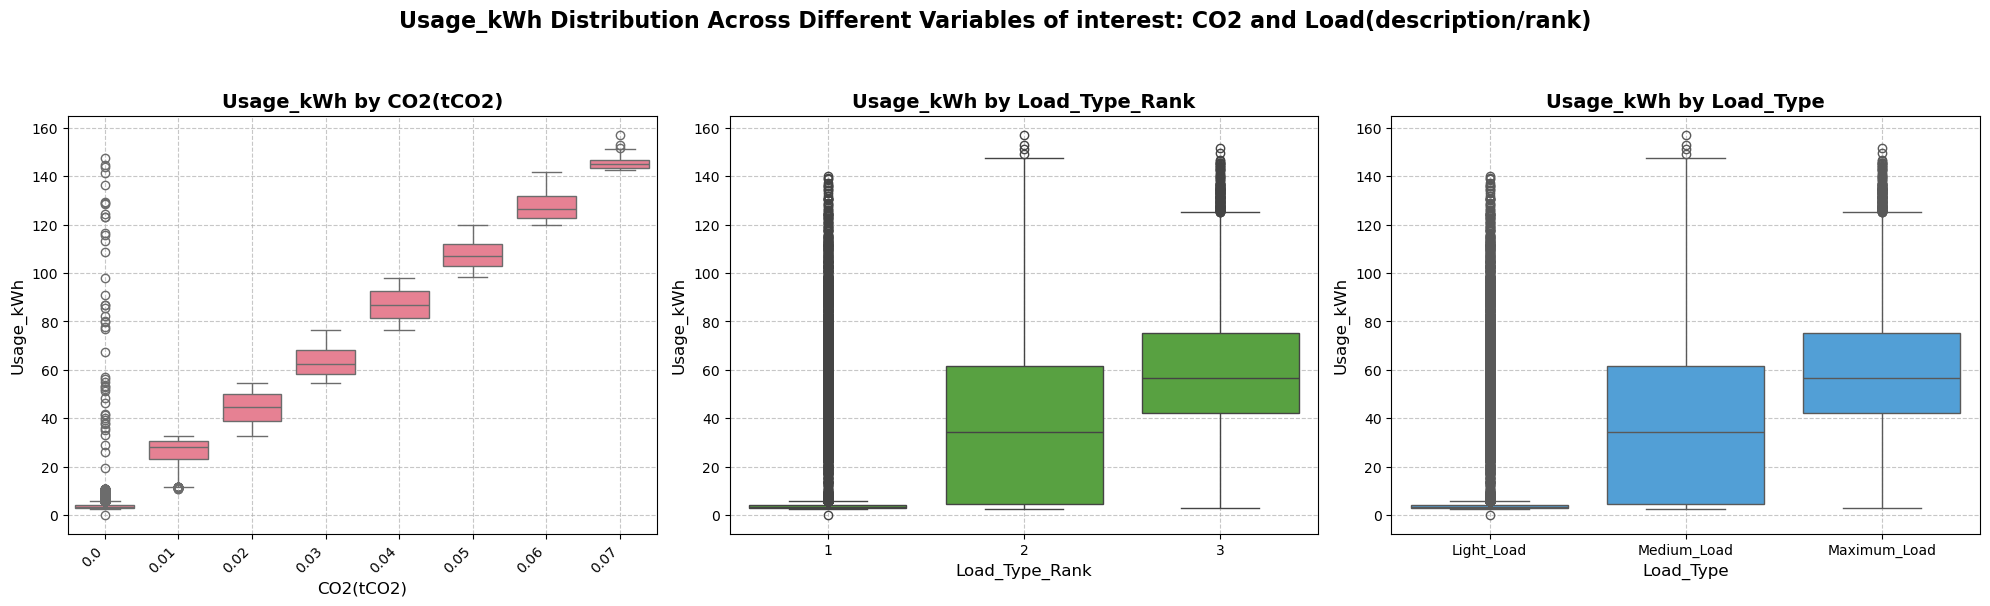

In [6]:
#I am going to stay with Usage_kWh in box pots
#Lets see what the other categorical varibles look like
#CO2(tCO2), NSM, Load_Type, time_seconds_since_midnight, relative_humidity_2m (%)                       dew_point_2m (°C)                              
#precipitation (mm), Load_Type_Rank, dew_point_2m (°C)                                   
                                

#import the necessary libraries , especially for plotting  (love my panda plots)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new and improved DataFrame. 
df = pd.read_csv('C:/Users/srsch/OneDrive/Desktop/merged_steel_weather_data_with_datetime_with_more_date_columns.csv')

# Define the columns to plot against Usage_kWh
Var_columns = ['CO2(tCO2)', 'Load_Type_Rank', 'Load_Type']

# Use "bright" palette for bright colors and "husl" for evenly spaced colors-Awesome
# Let's combine both by using "husl" which gives evenly spaced bright colors
palette = sns.color_palette("husl", len(Var_columns))

# Set up the figure with subplots - FIXED: Changed to 3x3 grid to accommodate 8 variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing (not for me)

# Create a box plot for each date column
for i, col in enumerate(Var_columns):
    # Use the palette color for this specific plot
    sns.boxplot(x=col, y='Usage_kWh', data=df, ax=axes[i], color=palette[i])
    
    axes[i].set_title(f'Usage_kWh by {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Usage_kWh', fontsize=12)
    
    # Rotate x-axis labels if needed
    if col in ['CO2(tCO2)']:
        plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')
    
    # Add grid lines for better readability
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Hide the empty subplot (since we have 9 subplots but only 8 variables)
if len(Var_columns) < len(axes):
    for j in range(len(Var_columns), len(axes)):
        axes[j].set_visible(False)

# Add a main title for the entire figure
plt.suptitle('Usage_kWh Distribution Across Different Variables of interest: CO2 and Load(description/rank)', fontsize=16, fontweight='bold', y=1.02)

# Adjust layout
plt.tight_layout()
#Save plot as jpg file
plt.savefig("Boxplots_for_other_usage_KwH.jpg", dpi=300, bbox_inches="tight")
#lets see what we have
plt.show()

#the strong relationship between kWh is not unexpected, but want to continue to look at
#will plot via Violin plot to visuaal the distribution of Usage_kWh across differemt levels of CO2
#suggested to uses density estimation to show whre data points lie
#Displays data distribution and density (unlike a box plot, which mainly shows quartiles and outliers).
#Reveals whether Usage_kWh is normally distributed or skewed at different CO2 levels.
#Helps identify trends in how energy usage scales with emissions.

#Load my libraries

import seaborn as sns
import matplotlib.pyplot as plt

#Plot The Violin
plt.figure(figsize=(12, 6))
sns.violinplot(x=df["CO2(tCO2)"], y=df["Usage_kWh"], data=df)
plt.xticks(rotation=45)  # Improves readability if CO2 values are detailed
plt.title("Violin Plot of Energy Usage vs. CO2 Emissions")
plt.grid(True, alpha=0.3)

plt.savefig("Violin_Plot_usage_KwH-CO2.jpg", dpi=300, bbox_inches="tight")

plt.show()




import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#I am playing with different plot versions of the Violin  

# Option 1: Create violin plots for each column of interest
columns_to_plot = ['Load_Type_Rank']  # Add other columns you want to plot

for col in columns_to_plot:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=df[col], y=df['Usage_kWh'], data=df)
    plt.title(f'Violin Plot of {col} vs Usage_kWh', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Usage_kWh', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Save each plot
    plt.savefig(f"Violin_plot_{col}.jpg", dpi=300, bbox_inches="tight")
    plt.show()

# Option 2: Split violin plot with different colors by Load_Type_Rank
plt.figure(figsize=(14, 8))
sns.violinplot(x='Lagging_Current_Reactive.Power_kVarh', y='Usage_kWh', hue='Load_Type_Rank', 
            data=df, palette='Set2', split=True)
plt.title('Split Violin Plot by Load Rank', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

# Specify a fixed legend position instead of "best"
plt.legend(loc='upper right')  # You can try: 'upper left', 'lower right', 'lower left', etc.

plt.savefig("Split_violin_plot.jpg", dpi=300, bbox_inches="tight")
plt.close()  # Close to free memory

# Option 3: Violin plot with color gradient based on a numeric variable
plt.figure(figsize=(12, 8))
# Create a custom colormap based on a numeric variable
numeric_var = 'CO2(tCO2)'  # Replace with your numeric variable
norm = plt.Normalize(df[numeric_var].min(), df[numeric_var].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Create a single axes object to plot on
ax = plt.gca()

# Group by a categorical variable and plot
for i, (name, group) in enumerate(df.groupby('Load_Type')):
    color = sm.to_rgba(group[numeric_var].mean())
    # Specify the ax parameter to plot on the same axes
    sns.violinplot(x='Load_Type', y='Usage_kWh', data=group, color=color, ax=ax)

# Now add the colorbar to the current figure with the axes specified
plt.colorbar(sm, ax=ax, label=numeric_var)  # Specify the ax parameter
plt.title('Violin Plot with Color Gradient', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("Gradient_violin_plot.jpg", dpi=300, bbox_inches="tight")
plt.show()

#Plot The Violin
plt.figure(figsize=(12, 6))
sns.violinplot(x=df["CO2(tCO2)"], y=df["Usage_kWh"], data=df)
plt.xticks(rotation=45)  # Improves readability if CO2 values are detailed
plt.title("Violin Plot of Energy Usage vs. CO2 Emissions")
plt.grid(True, alpha=0.3)
plt.savefig("Violin_Plot_usage_KwH-CO2.jpg", dpi=300, bbox_inches="tight")
plt.show()

import psutil
print(f"Memory usage: {psutil.virtual_memory().percent}%")

#Want to look at at the linerar correlations in the next few.  
#New day, lets import my libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#Scatter plot with regression for other variables besides date will revisit date later
sns.regplot(x=df["CO2(tCO2)"], y=df["Usage_kWh"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red", "linestyle": "--"})
plt.savefig("Regression_Plot_usage_KwH-CO2.jpg", dpi=300, bbox_inches="tight")


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#Density plot, compare the distribution of both variables 
#had on same plot as the scatter and I didn't like it.
#Also, Updated syntax for newer versions of seaborn - using named parameters x and y instead of positional arguments
#And fill instead of shade for color too.  
sns.kdeplot(x=df["CO2(tCO2)"], y=df["Usage_kWh"], cmap="coolwarm", fill=True)
plt.savefig("density_Plot_usage_KwH-CO2.jpg", dpi=300, bbox_inches="tight")

In [7]:
!pip install --upgrade statsmodels


In [8]:
#check columns before move on because having some kickback
#Before I keep going, I want to look at my anova table.  I am curious. 
#Time to import my stats stuff.  Will use statsmodels.  
import pandas
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# First, check if the columns exist in the dataframe
print("Original columns:", df.columns.tolist())

# Create a dictionary mapping old column names to new column names
column_mapping = {
    'temperature_2m (°C)': 'temperature_2m',
    'relative_humidity_2m (%)': 'relative_humidity_2m',
    'precipitation (mm)': 'precipitation',
    'CO2(tCO2)': 'CO2'
}

# Make a copy of the dataframe before renaming to preserve original data
df_anova = df.copy()

# Rename the columns using the rename method with inplace=True to modify the dataframe directly
df_anova.rename(columns=column_mapping, inplace=True)

# Verify the columns after renaming
print("Renamed columns:", df_anova.columns.tolist())

# Check for NaN values
print("NaN count in each column:")
print(df_anova.isna().sum())

# Define the formula with the renamed columns
# Make sure these column names exactly match what's in your dataframe after renaming
formula = "Usage_kWh ~ temperature_2m + relative_humidity_2m + precipitation + CO2"

# Fit the ANOVA model
model = smf.ols(formula, data=df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 for balanced designs

print(anova_table)


print(df.dtypes)
df.head()

Original columns: ['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type', 'date_only', 'time_only', 'time_numeric_dec', 'time_seconds_since_midnight', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'precipitation (mm)', 'Load_Type_Rank', 'date_time', 'day', 'day_of_week', 'day_name', 'week', 'month', 'month_name', 'quarter', 'year', 'year_month']
Renamed columns: ['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type', 'date_only', 'time_only', 'time_numeric_dec', 'time_seconds_since_midnight', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m (°C)', 'precipitation', 'Load_Type_Rank', 'date_time', 'day', 'day_of_week', 'day_

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  2018-01-01 00:15:00       3.17                                  2.95   
1  2018-01-01 00:30:00       4.00                                  4.46   
2  2018-01-01 00:45:00       3.24                                  3.28   
3  2018-01-01 01:00:00       3.31                                  3.56   
4  2018-01-01 01:15:00       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week  ...            date_time day day_of_week  day_name  \
0    Weekday      Monday  ...  2018-01-01 00:15:00   1           0    Monday   
1    Weekday      Monday  ...  2018-01-01 00:30:00   1           0    Monday   
2    Weekday      Monday  ...  2018-01-01 00:45:00   1           0    Monday   
3    Weekday      Monday  ...  2018-01-01 01:00:00   1           0    Monday   
4    Weekday      Monday  ...  2018-01-01 01:15:00   1           0    Monday   

   week  month  month_name  quarter  year  year_month  
0     1      1     January        1  2018     2018-01  
1     1      1     January        1  2018     2018-01  
2     1      1     January        1  2018     2018-01  
3     1      1     January        1  2018     2018-01  
4     1      1     January        1  2018     2018-01  

[5 rows x 30 columns]

In [9]:
#Before I keep going, I want to look at my anova table.  I am curious. 
#Time to import my stats stuff.  Will use statsmodels.  
import pandas as pd  # forgot pd last time. why?
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# First, make sure to load your dataframe
#load your data , going to use the ones with the new weather columns
df = pd.read_csv('C:/Users/srsch/OneDrive/Desktop/merged_steel_weather_data_with_datetime_with_more_date_columns.csv')  
# Define the formula with multiple independent variables
# rename columns in the dataframe having issues with characters.  
# Create a dictionary mapping old column names to new column names
column_mapping = {
    'temperature_2m (°C)': 'temperature_2m',
    'relative_humidity_2m (%)': 'relative_humidity_2m',
    'precipitation (mm)': 'precipitation',
    'CO2(tCO2)': 'CO2'
}

# Rename the columns using the rename method
df = df.rename(columns=column_mapping)

# Check if the columns exist after renaming.  Adding this to debug column names.  
print("Columns in dataframe:", df.columns.tolist())  

# define the formula with the renamed columns
formula = "Usage_kWh ~ temperature_2m + relative_humidity_2m + precipitation + CO2"

# Fit the ANOVA model
model = smf.ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 for balanced designs

print(anova_table)

# If you want to save the ANOVA table as an image, you need to create a plot first. I tried. will screen shot if need be

Columns in dataframe: ['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type', 'date_only', 'time_only', 'time_numeric_dec', 'time_seconds_since_midnight', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m (°C)', 'precipitation', 'Load_Type_Rank', 'date_time', 'day', 'day_of_week', 'day_name', 'week', 'month', 'month_name', 'quarter', 'year', 'year_month']
                            sum_sq       df             F        PR(>F)
temperature_2m        5.609350e+02      1.0  2.145120e+01  3.642525e-06
relative_humidity_2m  2.773542e+03      1.0  1.060654e+02  7.740786e-25
precipitation         3.785746e+01      1.0  1.447739e+00  2.288991e-01
CO2                   3.519365e+07      1.0  1.345871e+06  0.000000e+00
Residual              9.161427e+05  35035.0           NaN           NaN


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor



# 1. Calculate correlation between CO2 and Usage_kWh
correlation = df['CO2'].corr(df['Usage_kWh'])
print(f"Correlation between CO2 and Usage_kWh: {correlation:.4f}")

# 2. Create a correlation heatmap for all variables in the model
variables = ['Usage_kWh', 'temperature_2m', 'relative_humidity_2m', 'precipitation', 'CO2']
correlation_matrix = df[variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig("correlation_matrix.jpg", dpi=300, bbox_inches="tight")
plt.show()

# 3. Calculate Variance Inflation Factor (VIF)
# Create a dataframe with only the predictor variables
X = df[['temperature_2m', 'relative_humidity_2m', 'precipitation', 'CO2']]
# Add a constant term for the intercept
X = sm.add_constant(X)

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factors:")
print(vif_data)
print("\nNote: VIF > 5-10 indicates problematic multicollinearity")

# 4. Scatter plot to visualize the relationship between CO2 and Usage_kWh
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CO2', y='Usage_kWh', data=df, alpha=0.5)
plt.title('Relationship between CO2 and Usage_kWh')
plt.xlabel('CO2 (tCO2)')
plt.ylabel('Usage (kWh)')
plt.tight_layout()
plt.savefig("CO2_vs_Usage_scatter.jpg", dpi=300, bbox_inches="tight")
plt.show()

# 5. Run the model without CO2 to compare
formula_without_co2 = "Usage_kWh ~ temperature_2m + relative_humidity_2m + precipitation"
model_without_co2 = smf.ols(formula_without_co2, data=df).fit()
anova_table_without_co2 = sm.stats.anova_lm(model_without_co2, typ=2)

print("\nANOVA table without CO2:")
print(anova_table_without_co2)

In [10]:
!pip install --upgrade statsmodels



In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the formula with CO2 as the dependent variable
formula = "CO2 ~ temperature_2m + relative_humidity_2m + precipitation"

# Fit the ANOVA model
model = smf.ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 for balanced designs

print(anova_table)


                        sum_sq       df            F         PR(>F)
temperature_2m        0.159554      1.0   662.281719  1.058104e-144
relative_humidity_2m  0.675527      1.0  2804.004621   0.000000e+00
precipitation         0.009517      1.0    39.503582   3.313068e-10
Residual              8.440702  35036.0          NaN            NaN


In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the formula with interaction terms
formula = "CO2 ~ Usage_kWh * temperature_2m + Usage_kWh * relative_humidity_2m + Usage_kWh * precipitation"

# Fit the ANOVA model
model = smf.ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                                      sum_sq       df             F  \
Usage_kWh                       8.226553e+00      1.0  1.348491e+06   
temperature_2m                  4.476525e-04      1.0  7.337892e+01   
Usage_kWh:temperature_2m        3.474503e-05      1.0  5.695383e+00   
relative_humidity_2m            2.218008e-05      1.0  3.635745e+00   
Usage_kWh:relative_humidity_2m  4.227809e-04      1.0  6.930199e+01   
precipitation                   2.653875e-07      1.0  4.350216e-02   
Usage_kWh:precipitation         1.543927e-05      1.0  2.530795e+00   
Residual                        2.137148e-01  35032.0           NaN   

                                      PR(>F)  
Usage_kWh                       0.000000e+00  
temperature_2m                  1.113042e-17  
Usage_kWh:temperature_2m        1.701487e-02  
relative_humidity_2m            5.655948e-02  
Usage_kWh:relative_humidity_2m  8.751208e-17  
precipitation                   8.347838e-01  
Usage_kWh:precipitation        

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lmplot(x="Usage_kWh", y="CO2", hue="temperature_2m", data=df, aspect=1.5)
plt.title("Interaction Plot: Energy Usage & Temperature Impact on CO2")
plt.show()


#checking my columns again...trying to avoid errors
df.describe()
print(df.columns.tolist())


Available columns in the DataFrame:
['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type', 'date_only', 'time_only', 'time_numeric_dec', 'time_seconds_since_midnight', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'precipitation (mm)', 'Load_Type_Rank', 'date_time', 'day', 'day_of_week', 'day_name', 'week', 'month', 'month_name', 'quarter', 'year', 'year_month']


C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\51271408.py:39: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  interaction_plot = sns.pointplot(


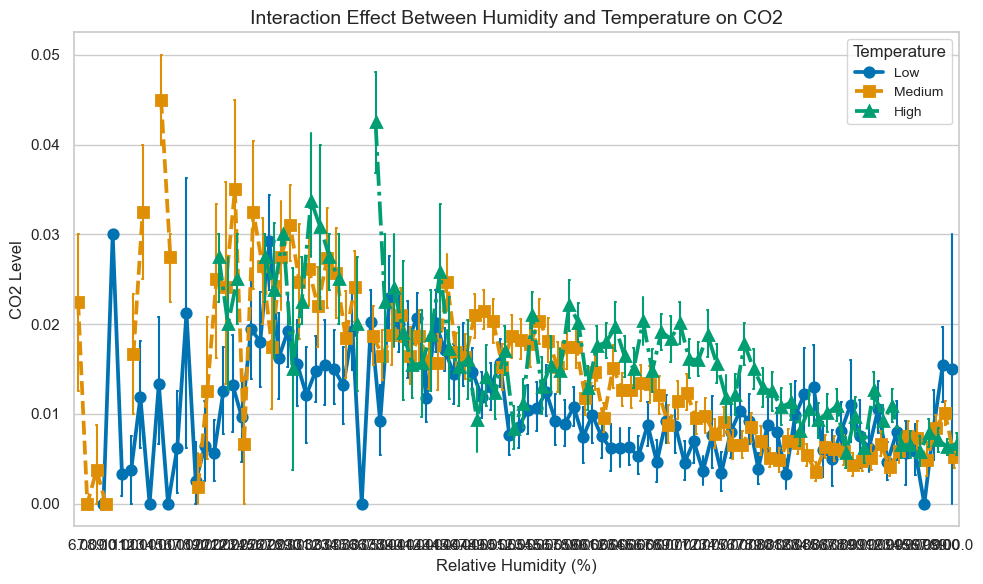

Temperature range: -10.6 to 35.7
Temperature bins: [-10.7, 4.833333333333336, 20.266666666666673, 35.800000000000004]
temp_category
Medium    16456
High      10896
Low        7688
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

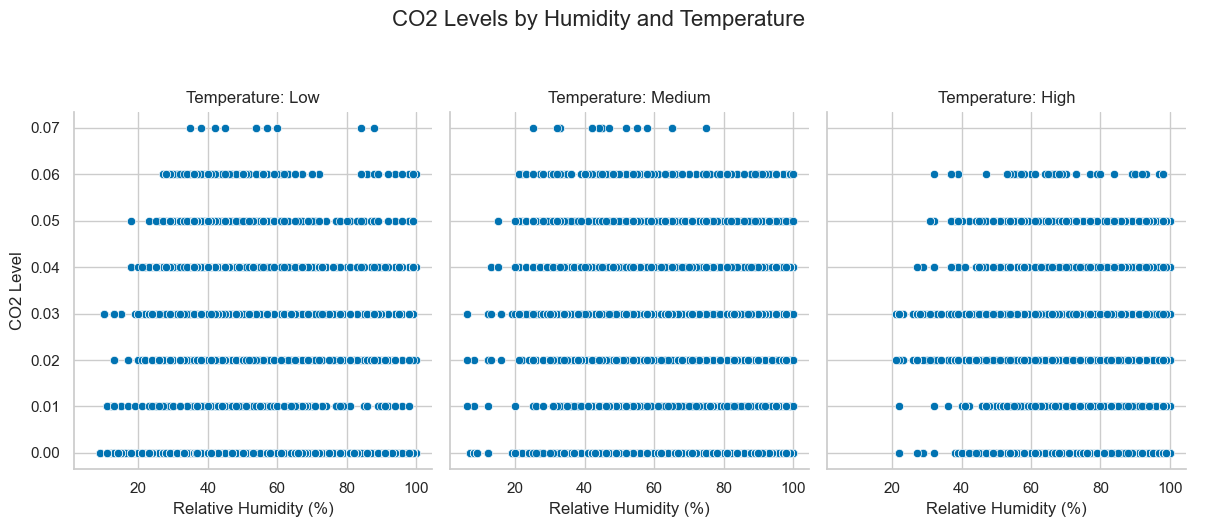

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Been having some issues with these interaction plots.  So here are the changes made.  This is 
#really just notes for me to help for future plots I  have planned.  
#1. Created temperature categories earlier in the code using `pd.cut()` and stored them in a new column called 'temp_category'
#2. Used this categorical column instead of the continuous temperature column in the `sns.pointplot()` function
#3. Added `.dropna(subset=['temp_category'])` to ensure we're not using rows with NaN temperature categories
#4. Used the same 'temp_category' column for the FacetGrid to maintain consistency
#5. Simplified the code by removing redundant binning operations

# Load your data, even if you have load before.  ha 
df = pd.read_csv('C:/Users/srsch/OneDrive/Desktop/merged_steel_weather_data_with_datetime_with_more_date_columns.csv')  

# Check columns names in df
print("Available columns in the DataFrame:")
print(df.columns.tolist())

# Changing column names to make more workable
humidity_col = 'relative_humidity_2m (%)'  
temperature_col = 'temperature_2m (°C)'    
CO2_col = 'CO2(tCO2)'                    

# Set the style for better aesthetics
sns.set(style="whitegrid", palette="colorblind")

# First, ensure temperature column is numeric
df[temperature_col] = pd.to_numeric(df[temperature_col], errors='coerce')

# Create temperature bins for the first plot
temp_min = df[temperature_col].min()
temp_max = df[temperature_col].max()
temp_bins = [temp_min - 0.1, temp_min + (temp_max-temp_min)/3, temp_min + 2*(temp_max-temp_min)/3, temp_max + 0.1]
df['temp_category'] = pd.cut(df[temperature_col], bins=temp_bins, labels=['Low', 'Medium', 'High'], include_lowest=True)

# First plot using the categorical temperature variable
plt.figure(figsize=(10, 6))
interaction_plot = sns.pointplot(
    data=df.dropna(subset=['temp_category']),  # Drop NaN values
    x=humidity_col,  
    y=CO2_col,      
    hue='temp_category',  # Use the categorical variable instead of continuous
    dodge=0.5,
    markers=['o', 's', '^'],
    linestyles=['-', '--', '-.'],
    capsize=0.1,
    errwidth=1.5)

# Improve the plot appearance
plt.title('Interaction Effect Between Humidity and Temperature on CO2', fontsize=14)
plt.xlabel('Relative Humidity (%)', fontsize=12)
plt.ylabel('CO2 Level', fontsize=12)
plt.legend(title='Temperature', title_fontsize=12, fontsize=10, loc='best')
plt.tight_layout()

plt.show()

# Print diagnostic information about temperature range
print(f"Temperature range: {temp_min} to {temp_max}")
print(f"Temperature bins: {temp_bins}")
print(df['temp_category'].value_counts())

# Continue with plotting the facet grid
plt.figure(figsize=(12, 6))
if df['temp_category'].isna().any():
    print(f"Warning: {df['temp_category'].isna().sum()} NaN values in temperature bins")
    # Handle NaN values by dropping them
    df_plot = df.dropna(subset=['temp_category'])
else:
    df_plot = df

# Use the cleaned dataframe for plotting
g = sns.FacetGrid(df_plot, col='temp_category', col_wrap=3, height=5, aspect=0.8)
g.map(sns.scatterplot, humidity_col, CO2_col)
g.add_legend()
g.set_axis_labels('Relative Humidity (%)', 'CO2 Level')
g.set_titles(col_template='Temperature: {col_name}')
g.fig.suptitle('CO2 Levels by Humidity and Temperature', y=1.05, fontsize=16)
plt.tight_layout()

plt.show()

#my temperature data is causing me grief.  lets check it out
print(df[temperature_col].head())
print(df[temperature_col].dtype)
print(df[temperature_col].apply(type).value_counts())
df[temperature_col].unique()


#revisiting some plot to get a better understanding of data
#.A heatmap showing how the average CO2 levels change across different combinations of temperature and humidity ranges
#A line plot with error bands showing the relationship between humidity and CO2 for different temperature ranges
#Regression plots for each temperature range to see if the relationship between humidity and CO2 differs across temperature levels
#These visualizations should help better identify if there's an interaction effect between humidity and temperature on CO2 levels.


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your data
df = pd.read_csv('C:/Users/srsch/OneDrive/Desktop/merged_steel_weather_data_with_datetime_with_more_date_columns.csv')  

# Changing column names to make more workable
humidity_col = 'relative_humidity_2m (%)'  
temperature_col = 'temperature_2m (°C)'    
CO2_col = 'CO2(tCO2)'                    

# Ensure columns are numeric
df[humidity_col] = pd.to_numeric(df[humidity_col], errors='coerce')
df[temperature_col] = pd.to_numeric(df[temperature_col], errors='coerce')
df[CO2_col] = pd.to_numeric(df[CO2_col], errors='coerce')

# Drop rows with NaN values in these columns
df_clean = df.dropna(subset=[humidity_col, temperature_col, CO2_col])

# Create bins for humidity and temperature for better visualization
# Create humidity bins (e.g., 10% intervals)
humidity_bins = np.linspace(df_clean[humidity_col].min(), df_clean[humidity_col].max(), 6)
df_clean['humidity_bin'] = pd.cut(df_clean[humidity_col], bins=humidity_bins, include_lowest=True)

# Create temperature bins (e.g., divide into 3 categories)
temp_bins = np.linspace(df_clean[temperature_col].min(), df_clean[temperature_col].max(), 4)
df_clean['temp_bin'] = pd.cut(df_clean[temperature_col], bins=temp_bins, include_lowest=True)

# Method 1: Heatmap to show interaction
plt.figure(figsize=(12, 8))
# Group by both binned variables and calculate mean CO2
pivot_table = df_clean.pivot_table(
    values=CO2_col, 
    index='temp_bin', 
    columns='humidity_bin', 
    aggfunc='mean'
)

sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Average CO2 Level'})
plt.title('Interaction Effect: Temperature × Humidity on CO2 Levels', fontsize=16)
plt.xlabel('Humidity Range', fontsize=14)
plt.ylabel('Temperature Range', fontsize=14)
plt.tight_layout()
plt.show()

# Method 2: Line plot with error bands
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df_clean,
    x=humidity_col,
    y=CO2_col,
    hue='temp_bin',
    ci=95,
    err_style='band'
)
plt.title('CO2 Levels by Humidity, Grouped by Temperature Range', fontsize=16)
plt.xlabel('Relative Humidity (%)', fontsize=14)
plt.ylabel('CO2 Level', fontsize=14)
plt.legend(title='Temperature Range', title_fontsize=12)
plt.tight_layout()
plt.show()

# Method 3: Regression plot with interaction
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df_clean, col='temp_bin', col_wrap=3, height=4, aspect=1.2)
g.map_dataframe(sns.regplot, x=humidity_col, y=CO2_col, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
g.set_axis_labels('Relative Humidity (%)', 'CO2 Level')
g.set_titles(col_template='Temperature: {col_name}')
g.fig.suptitle('Relationship between Humidity and CO2 at Different Temperature Ranges', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()

In [14]:
# perform a formal statistical test for interaction effects using regression analysis:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# First, print the actual column names to see what we're working with
print("Original column names:", df_clean.columns.tolist())

# perform a formal statistical test for interaction effects using regression analysis:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Add this at the beginning of your code to fix the missing part
temperature_cols = [col for col in df_clean.columns if 'temperature' in col.lower()]
if not temperature_cols:
    print("No Temperature column found. Available columns:", df_clean.columns.tolist())
    temperature_col = "temperature_column_not_found"
else:
    temperature_col = temperature_cols[0]
    print(f"Temperature column found: {temperature_col}")

humidity_cols = [col for col in df_clean.columns if 'humidity' in col.lower() or 'reactive' in col.lower()]
co2_cols = [col for col in df_clean.columns if 'co2' in col.lower()]

# Then modify the column cleaning part to also replace periods:
if any("not_found" in col for col in [temperature_col, humidity_col, CO2_col]):
    print("Error: Not all required columns were found. Please check your data.")
else:
    # Clean column names for statsmodels (which doesn't handle special characters well)
    df_clean.columns = [col.replace('°', 'deg').replace(' ', '_').replace('(', '').replace(')', '').replace('.', '_') for col in df_clean.columns]

    # Update your column variables to match the new column names
    temperature_col = temperature_col.replace('°', 'deg').replace(' ', '_').replace('(', '').replace(')', '').replace('.', '_')
    humidity_col = humidity_col.replace('°', 'deg').replace(' ', '_').replace('(', '').replace(')', '').replace('.', '_')
    CO2_col = CO2_col.replace('°', 'deg').replace(' ', '_').replace('(', '').replace(')', '').replace('.', '_')

    print(f"Cleaned columns: {temperature_col}, {humidity_col}, {CO2_col}")
    
    # Rest of your code remains the same
# Define your column names based on what's actually in the dataframe
# Updated: Use case-insensitive search and look for partial matches
temp_cols = [col for col in df_clean.columns if "temp" in col.lower()]
humidity_cols = [col for col in df_clean.columns if "humid" in col.lower() or "rh" in col.lower()]
co2_cols = [col for col in df_clean.columns if "co2" in col.lower()]

# Rest of your code continues...
# Assuming df_clean and temp_cols, humidity_cols, co2_cols are already defined above

if not temp_cols:
    print("No Temperature column found. Available columns:", df_clean.columns.tolist())
    # You might want to set a default or exit
    temperature_col = "temperature_column_not_found"
else:
    temperature_col = temp_cols[0]
    print(f"Temperature column found: {temperature_col}")
    
if not humidity_cols:
    print("No Humidity column found. Available columns:", df_clean.columns.tolist())
    # You might want to set a default or exit
    humidity_col = "humidity_column_not_found"
else:
    humidity_col = humidity_cols[0]
    print(f"Humidity column found: {humidity_col}")
    
if not co2_cols:
    print("No CO2 column found. Available columns:", df_clean.columns.tolist())
    # You might want to set a default or exit
    CO2_col = "co2_column_not_found"
else:
    CO2_col = co2_cols[0]
    print(f"CO2 column found: {CO2_col}")

print(f"Found columns: {temperature_col}, {humidity_col}, {CO2_col}")

# Check if all required columns were found before proceeding
if any("not_found" in col for col in [temperature_col, humidity_col, CO2_col]):
    print("Error: Not all required columns were found. Please check your data.")
else:
    # Clean column names for statsmodels (which doesn't handle special characters well)
    df_clean.columns = [col.replace('°', 'deg').replace(' ', '_').replace('(', '').replace(')', '') for col in df_clean.columns]

    # Update your column variables to match the new column names
    temperature_col = temperature_col.replace('°', 'deg').replace(' ', '_').replace('(', '').replace(')', '')
    humidity_col = humidity_col.replace('°', 'deg').replace(' ', '_').replace('(', '').replace(')', '')
    CO2_col = CO2_col.replace('°', 'deg').replace(' ', '_').replace('(', '').replace(')', '')

    print(f"Cleaned columns: {temperature_col}, {humidity_col}, {CO2_col}")

    # Create interaction term
    df_clean['temp_humid_interaction'] = df_clean[temperature_col] * df_clean[humidity_col]

    # Run regression with interaction term
    model = ols(f'{CO2_col} ~ {temperature_col} + {humidity_col} + temp_humid_interaction', data=df_clean).fit()
    print(model.summary())

    # Check if the interaction term is statistically significant
    print("\nInteraction term p-value:", model.pvalues['temp_humid_interaction'])

NameError: name 'df_clean' is not defined

# perform a formal statistical test for interaction effects using regression analysis:
# Check correlation matrix of all numeric variables
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

# Define the CO2 column name - make sure this matches exactly with your dataframe column name
CO2_col = 'CO2tCO2'  # Replace with the actual column name from your dataframe

# Check if the column exists in the correlation matrix
if CO2_col in correlation_matrix.columns:
    # Find top correlations with CO2
    correlations_with_co2 = correlation_matrix[CO2_col].sort_values(ascending=False)
    print("Top correlations with CO2:")
    print(correlations_with_co2)
else:
    print(f"Column '{CO2_col}' not found in correlation matrix.")
    print("Available columns:", correlation_matrix.columns.tolist())

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# Print the column names to verify what's available AND IF MY lAGGING POWER VARIABLE IS HUMIDITY NOW.
print("Available columns in dataframe:")
print(df.columns.tolist())


In [15]:
#I want to following a more stepwise approach.  It will help with a clearer interperation, I think.
#As well, the above code made my humidity my lagging power variable. yikes.
#So first, I want to understand enviromnmental variables firest and how much additional variance
#is explained by the power consumption variables.
#I am assuming that the power consumption variables are correlated, so I can avoid the dreaded 
#multicollinearity when putting all variables together. 
#Also what to be able to explain the importance of environmental factors vs. power consumption.
#first the y will be CO2.  my next coding adventure will be with the Usage_kWh.  should be similar results.
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt


# Fixing my columns again so don't have the characters that cause me grief and make more workable
humidity_col = 'relative_humidity_2m (%)'  
temperature_col = 'temperature_2m (°C)'    
CO2_col = 'CO2(tCO2)' 

# First part: Environmental variables only
# Use the actual column names in the dataframe, not the variable names
env_vars = [temperature_col, humidity_col]  # Use the variables, not strings
df['temp_humid_interaction'] = df[temperature_col] * df[humidity_col]  # Use the variables
X1 = df[env_vars + ['temp_humid_interaction']].copy()
X1 = sm.add_constant(X1)
y = df[CO2_col]  # Use the variable

env_model = sm.OLS(y, X1).fit()
print("Environmental Variables Model:")
print(env_model.summary())
env_aic = env_model.aic
env_r2 = env_model.rsquared

# Step 2: Add power variables one by one, keeping those that improve the model
power_vars = [
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor']

# Initialize with environmental variables
best_vars = env_vars + ['temp_humid_interaction']
best_aic = env_aic
best_r2 = env_r2

results = []
for var in power_vars:
    test_vars = best_vars + [var]
    X_test = df[test_vars].copy()
    X_test = sm.add_constant(X_test)
    
    test_model = sm.OLS(y, X_test).fit()
    test_aic = test_model.aic
    test_r2 = test_model.rsquared
    
    results.append({
        'Variable': var,
        'AIC': test_aic,
        'R-squared': test_r2,
        'Coefficient': test_model.params[var],
        'P-value': test_model.pvalues[var]
    })
    
#If this variable improves the model (lower AIC is better)
    if test_aic < best_aic:
        best_vars = test_vars
        best_aic = test_aic
        best_r2 = test_r2

# Display results of individual variable additions
print("\nResults of adding each power variable:")
results_df = pd.DataFrame(results)
print(results_df)

# Step 3: Final model with selected variables
X_final = df[best_vars].copy()
X_final = sm.add_constant(X_final)
final_model = sm.OLS(y, X_final).fit()

print("\nFinal Model Summary:")
print(final_model.summary())

# Check for multicollinearity in final model
vif_data = pd.DataFrame()
vif_data["Variable"] = X_final.columns
vif_data["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
print("\nVariance Inflation Factors for Final Model:")
print(vif_data)


Environmental Variables Model:
                            OLS Regression Results                            
Dep. Variable:              CO2(tCO2)   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     963.2
Date:                Thu, 28 Aug 2025   Prob (F-statistic):               0.00
Time:                        12:10:23   Log-Likelihood:                 96237.
No. Observations:               35040   AIC:                        -1.925e+05
Df Residuals:                   35036   BIC:                        -1.924e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
#I copied the above coding adventure, but now instead of CO2, use the Usage_kWh for my y 
#Again it should be similar.  
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt


# Fixing (repeat)my columns again so don't have the characters that cause me grief and make more workable
humidity_col = 'relative_humidity_2m (%)'  
temperature_col = 'temperature_2m (°C)'    
kWh = 'Usage_kWh' 

# First part: Environmental variables only
# Use the actual column names in the dataframe, not the variable names
env_vars = [temperature_col, humidity_col]  # Use the variables, not strings
df['temp_humid_interaction'] = df[temperature_col] * df[humidity_col]  # Use the variables
X1 = df[env_vars + ['temp_humid_interaction']].copy()
X1 = sm.add_constant(X1)
y = df[kWh]  # Use the variable

env_model = sm.OLS(y, X1).fit()
print("Enviroment Variables Model with kWh:")
print(env_model.summary())
env_aic = env_model.aic
env_r2 = env_model.rsquared

# Step 2: Add power variables one by one, keeping those that improve the model
power_vars = [
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor'
]

# Initialize with environmental variables
best_vars = env_vars + ['temp_humid_interaction']
best_aic = env_aic
best_r2 = env_r2

results = []
for var in power_vars:
    test_vars = best_vars + [var]
    X_test = df[test_vars].copy()
    X_test = sm.add_constant(X_test)
    
    test_model = sm.OLS(y, X_test).fit()
    test_aic = test_model.aic
    test_r2 = test_model.rsquared
    
    results.append({
        'Variable': var,
        'AIC': test_aic,
        'R-squared': test_r2,
        'Coefficient': test_model.params[var],
        'P-value': test_model.pvalues[var]
    })
    
#If this variable improves the model (lower AIC is better)
    if test_aic < best_aic:
        best_vars = test_vars
        best_aic = test_aic
        best_r2 = test_r2

# Display results of individual variable additions
print("\nResults of adding each power variable with y as kWh:")
results_df = pd.DataFrame(results)
print(results_df)

# Step 3: Final model with selected variables 
X_final = df[best_vars].copy()
X_final = sm.add_constant(X_final)
final_model = sm.OLS(y, X_final).fit()

print("\nFinal Model Summary:")
print(final_model.summary())

# Check for multicollinearity in final model
vif_data = pd.DataFrame()
vif_data["Variable"] = X_final.columns
vif_data["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
print("\nVariance Inflation Factors for Final Model:")
print(vif_data)

In [16]:
#This is great. I have direction, I think although I do like to jump around, but will focus on findings now.
#High VIF for temp_humid_interaction (19.66) and temperature_2m (14.73) suggests multicollinearity.
#I am dropping the temp_humid_interaction, but will revisit later and maybe standardize the value 
#First, I am rerunning both models(y=CO2&y=kWh to see if R-squared drops significantly 
#Second, I will then remove the Leading_Current_Reactive_Power_kVarh
#(it has a smaller coefficient and higher p-value) 
#third do the above again for y=kWh but in sepearate cell

#import my libraries to save grief
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt


# Print the column names to verify what's available
print("Available columns in dataframe:")
print(df.columns.tolist())

# Fixing my columns again so don't have the characters that cause me grief and make more workable
humidity_col = 'relative_humidity_2m (%)'  
temperature_col = 'temperature_2m (°C)'    
CO2_col = 'CO2(tCO2)' 

# First part: Environmental variables only - without interaction term of tempxhumidity
env_vars = [temperature_col, humidity_col]
X1 = df[env_vars].copy()  
X1 = sm.add_constant(X1)
y = df[CO2_col]

env_model = sm.OLS(y, X1).fit()
print("Environmental Variables Model (*without interaction of tempxhumd*):")
print(env_model.summary())
env_aic = env_model.aic
env_r2 = env_model.rsquared
print(f"R-squared: {env_r2}")
print(f"AIC: {env_aic}")

# Step 2: Add power variables one by one, keeping those that improve the model
# First check which power variables actually exist in the dataframe
power_vars = []
possible_power_vars = [
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor']

for var in possible_power_vars:
    if var in df.columns:
        power_vars.append(var)

print(f"Power variables found in dataframe: {power_vars}")

# Initialize with environmental variables only
best_vars = env_vars.copy()  
best_aic = env_aic
best_r2 = env_r2

results = []
for var in power_vars:
    test_vars = best_vars + [var]
    X_test = df[test_vars].copy()
    X_test = sm.add_constant(X_test)
    
    test_model = sm.OLS(y, X_test).fit()
    test_aic = test_model.aic
    test_r2 = test_model.rsquared
    
    results.append({
        'Variable': var,
        'AIC': test_aic,
        'R-squared': test_r2,
        'Coefficient': test_model.params[var],
        'P-value': test_model.pvalues[var]
    })
    
    # If this variable improves the model (lower AIC is better) -This is step#2, but using AIC
    #Will check to see if Leading_Current_Reactive_Power_kVarh is removed from model.
    if test_aic < best_aic:
        best_vars = test_vars
        best_aic = test_aic
        best_r2 = test_r2

# Display results of individual variable additions
print("\nResults of adding each power variable:")
results_df = pd.DataFrame(results)
print(results_df)

# Step 3: Final model with selected variables
if best_vars:  # Check if we have any variables and not using the ones
    X_final = df[best_vars].copy()
    X_final = sm.add_constant(X_final)
    final_model = sm.OLS(y, X_final).fit()

    print("\nFinal Model Summary:")
    print(final_model.summary())
    print(f"Final model R-squared: {final_model.rsquared}")
    print(f"Final model AIC: {final_model.aic}")

    # Check for multicollinearity in final model
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_final.columns
    vif_data["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
    print("\nVariance Inflation Factors for Final Model:")
    print(vif_data)
else:
    print("No variables were selected for the final model.")

Available columns in dataframe:
['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type', 'date_only', 'time_only', 'time_numeric_dec', 'time_seconds_since_midnight', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'precipitation (mm)', 'Load_Type_Rank', 'date_time', 'day', 'day_of_week', 'day_name', 'week', 'month', 'month_name', 'quarter', 'year', 'year_month', 'temp_category', 'temp_humid_interaction']
Environmental Variables Model (*without interaction of tempxhumd*):
                            OLS Regression Results                            
Dep. Variable:              CO2(tCO2)   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     1430.
Date:        

In [17]:
#Now with y=kWh
#copy, paste and change out y

#import my libraries -make it a habit
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt


# Print the column names to verify what's available
print("Available columns in dataframe:")
print(df.columns.tolist())


# Fixing my columns again so don't have the characters that cause me grief and make more workable
humidity_col = 'relative_humidity_2m (%)'  
temperature_col = 'temperature_2m (°C)'    
kWh = 'Usage_kWh' 

# First part: Environmental variables only - without interaction term of tempxhumidity
env_vars = [temperature_col, humidity_col]
X1 = df[env_vars].copy()  
X1 = sm.add_constant(X1)
y = df[kWh]

env_model = sm.OLS(y, X1).fit()
print("Environmental Variables Model (*without interaction of tempxhumd*):")
print(env_model.summary())
env_aic = env_model.aic
env_r2 = env_model.rsquared
print(f"R-squared: {env_r2}")
print(f"AIC: {env_aic}")

# Step 2: Add power variables one by one, keeping those that improve the model
# First check which power variables actually exist in the dataframe
power_vars = []
possible_power_vars = [
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor']

for var in possible_power_vars:
    if var in df.columns:
        power_vars.append(var)

print(f"Power variables found in dataframe: {power_vars}")

# Initialize with environmental variables only
best_vars = env_vars.copy()  
best_aic = env_aic
best_r2 = env_r2

results = []
for var in power_vars:
    test_vars = best_vars + [var]
    X_test = df[test_vars].copy()
    X_test = sm.add_constant(X_test)
    
    test_model = sm.OLS(y, X_test).fit()
    test_aic = test_model.aic
    test_r2 = test_model.rsquared
    
    results.append({
        'Variable': var,
        'AIC': test_aic,
        'R-squared': test_r2,
        'Coefficient': test_model.params[var],
        'P-value': test_model.pvalues[var]
    })
    
    # If this variable improves the model (lower AIC is better) -This is step#2, but using AIC
    #Will check to see if Leading_Current_Reactive_Power_kVarh is removed from model. Fun!
    if test_aic < best_aic:
        best_vars = test_vars
        best_aic = test_aic
        best_r2 = test_r2

# Display results of individual variable additions
print("\nResults of adding each power variable:")
results_df = pd.DataFrame(results)
print(results_df)

# Step 3: Final model with selected variables
if best_vars:  # Check if we have any variables and not using the ones
    X_final = df[best_vars].copy()
    X_final = sm.add_constant(X_final)
    final_model = sm.OLS(y, X_final).fit()

    print("\nFinal Model Summary:")
    print(final_model.summary())
    print(f"Final model R-squared: {final_model.rsquared}")
    print(f"Final model AIC: {final_model.aic}")

    # Check for multicollinearity in final model
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_final.columns
    vif_data["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
    print("\nVariance Inflation Factors for Final Model:")
    print(vif_data)
else:
    print("No variables were selected for the final model.")

Available columns in dataframe:
['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type', 'date_only', 'time_only', 'time_numeric_dec', 'time_seconds_since_midnight', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'precipitation (mm)', 'Load_Type_Rank', 'date_time', 'day', 'day_of_week', 'day_name', 'week', 'month', 'month_name', 'quarter', 'year', 'year_month', 'temp_category', 'temp_humid_interaction']
Environmental Variables Model (*without interaction of tempxhumd*):
                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1473.
Date:        

In [18]:
#Still with y=kWh
#Last model used the AIC for stepwise variable selction.  
#surprisingly it kept the Leading_Current_Reactive_Power_kVarh variable
#This model, I am going to remove the variable above, but still keep the AIC stepwise selection


#import my libraries -make it a habit
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt


# Print the column names to verify what's available
print("Available columns in dataframe:")
print(df.columns.tolist())

# Fixing my columns again so don't have the characters that cause me grief and make more workable
humidity_col = 'relative_humidity_2m (%)'  
temperature_col = 'temperature_2m (°C)'    
kWh = 'Usage_kWh' 

# First part: Environmental variables only - without interaction term of tempxhumidity
env_vars = [temperature_col, humidity_col]
X1 = df[env_vars].copy()  
X1 = sm.add_constant(X1)
y = df[kWh]

env_model = sm.OLS(y, X1).fit()
print("Environmental Variables Model (*without interaction of tempxhumd*):")
print(env_model.summary())
env_aic = env_model.aic
env_r2 = env_model.rsquared
print(f"R-squared: {env_r2}")
print(f"AIC: {env_aic}")

# Step 2: Add power variables one by one, keeping those that improve the model
# This is diffrent than previous model coding, removed 'Leading_Current_Reactive_Power_kVarh'
power_vars = []
possible_power_vars = [
    'Lagging_Current_Reactive.Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor']

for var in possible_power_vars:
    if var in df.columns:
        power_vars.append(var)

print(f"Power variables found in dataframe: {power_vars}")

# Initialize with environmental variables only
best_vars = env_vars.copy()  
best_aic = env_aic
best_r2 = env_r2

results = []
for var in power_vars:
    test_vars = best_vars + [var]
    X_test = df[test_vars].copy()
    X_test = sm.add_constant(X_test)
    
    test_model = sm.OLS(y, X_test).fit()
    test_aic = test_model.aic
    test_r2 = test_model.rsquared
    
    results.append({
        'Variable': var,
        'AIC': test_aic,
        'R-squared': test_r2,
        'Coefficient': test_model.params[var],
        'P-value': test_model.pvalues[var]
    })
    
    # If this variable improves the model (lower AIC is better) -This is step#2, but using AIC
    #Will check to see if Leading_Current_Reactive_Power_kVarh is removed from model. Fun!
    if test_aic < best_aic:
        best_vars = test_vars
        best_aic = test_aic
        best_r2 = test_r2

# Display results of individual variable additions
print("\nResults of adding each power variable except 'Leading_Current_Reactive_Power_kVarh':")
results_df = pd.DataFrame(results)
print(results_df)

# Step 3: Final model with selected variables
if best_vars:  # Check if we have any variables and not using the ones
    X_final = df[best_vars].copy()
    X_final = sm.add_constant(X_final)
    final_model = sm.OLS(y, X_final).fit()

    print("\nFinal Model Summary without 'Leading_Current_Reactive_Power_kVarh':")
    print(final_model.summary())
    print(f"Final model R-squared: {final_model.rsquared}")
    print(f"Final model AIC: {final_model.aic}")

    # Check for multicollinearity in final model
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_final.columns
    vif_data["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
    print("\nVariance Inflation Factors for Final Model:")
    print(vif_data)
else:
    print("No variables were selected for the final model.")

Available columns in dataframe:
['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type', 'date_only', 'time_only', 'time_numeric_dec', 'time_seconds_since_midnight', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'precipitation (mm)', 'Load_Type_Rank', 'date_time', 'day', 'day_of_week', 'day_name', 'week', 'month', 'month_name', 'quarter', 'year', 'year_month', 'temp_category', 'temp_humid_interaction']
Environmental Variables Model (*without interaction of tempxhumd*):
                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1473.
Date:        

In [19]:
#Good results on models, but still shows potential strong multicollinearity
#Want to run Lassso and Cross-Validation and other metrics however, need to standardize variables
#(Standardization /scaling is a preprocessing step that prepares your data for modeling. )
#Ensures all subsequent analyses (cross-validation, LASSO, metrics like BIC)-use the same scaled data, avoiding inconsistencies.

#Loading some new Libraries for me.  yeah 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


# Define predictors and dependent variables
predictors = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 
              'Lagging_Current_Reactive.Power_kVarh', 'Lagging_Current_Power_Factor', 
              'Leading_Current_Power_Factor']
y_co2 = df['CO2(tCO2)']
y_kwh = df['Usage_kWh']
X = df[predictors]

# Standardize predictors /Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=predictors)

# Add constant for statsmodels OLS (needed for BIC, adjusted R-squared)
X_scaled_sm = sm.add_constant(X_scaled_df)

#print standardized predictors
print(X_scaled_df.head())
# Compare statistics
print("Unscaled Variables")
df[['temperature_2m (°C)', 'relative_humidity_2m (%)',
    'Lagging_Current_Reactive.Power_kVarh', 'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor']].head()


   temperature_2m (°C)  relative_humidity_2m (%)  \
0            -1.512850                 -0.384125   
1            -1.512850                 -0.384125   
2            -1.512850                 -0.384125   
3            -1.532816                 -0.283913   
4            -1.532816                 -0.283913   

   Lagging_Current_Reactive.Power_kVarh  Lagging_Current_Power_Factor  \
0                             -0.618516                     -0.389410   
1                             -0.525911                     -0.729772   
2                             -0.598278                     -0.544264   
3                             -0.581106                     -0.660009   
4                             -0.523458                     -0.838117   

   Leading_Current_Power_Factor  
0                      0.513268  
1                      0.513268  
2                      0.513268  
3                      0.513268  
4                      0.513268  
Unscaled Variables


temperature_2m (°C)  relative_humidity_2m (%)  \
0                 -1.3                      63.0   
1                 -1.3                      63.0   
2                 -1.3                      63.0   
3                 -1.5                      65.0   
4                 -1.5                      65.0   

   Lagging_Current_Reactive.Power_kVarh  Lagging_Current_Power_Factor  \
0                                  2.95                         73.21   
1                                  4.46                         66.77   
2                                  3.28                         70.28   
3                                  3.56                         68.09   
4                                  4.50                         64.72   

   Leading_Current_Power_Factor  
0                         100.0  
1                         100.0  
2                         100.0  
3                         100.0  
4                         100.0

In [20]:
#Checking and picking my Models  (stable?)
# Cross-validation for CO2 model
model = LinearRegression()
cv_scores_co2 = cross_val_score(model, X_scaled_df, y_co2, cv=5, scoring='neg_mean_squared_error')
mse_co2 = -cv_scores_co2.mean()
rmse_co2 = np.sqrt(mse_co2)
print(f"CO2 Model - 5-Fold CV MSE: {mse_co2:.6f}, RMSE: {rmse_co2:.6f}")

# Cross-validation for kWh model
cv_scores_kwh = cross_val_score(model, X_scaled_df, y_kwh, cv=5, scoring='neg_mean_squared_error')
mse_kwh = -cv_scores_kwh.mean()
rmse_kwh = np.sqrt(mse_kwh)
print(f"kWh Model - 5-Fold CV MSE: {mse_kwh:.6f}, RMSE: {rmse_kwh:.6f}")

# Test model without Leading_Current_Power_Factor
X_reduced = X_scaled_df.drop(columns=['Leading_Current_Power_Factor'])
cv_scores_reduced = cross_val_score(model, X_reduced, y_kwh, cv=5, scoring='neg_mean_squared_error')
mse_reduced = -cv_scores_reduced -cv_scores_reduced.mean()
rmse_reduced = np.sqrt(mse_reduced)
print(f"kWh Model (without Leading_Current_Power_Factor) - CV MSE: {mse_reduced:.6f}, RMSE: {rmse_reduced:.6f}")

CO2 Model - 5-Fold CV MSE: 0.000031, RMSE: 0.005532
kWh Model - 5-Fold CV MSE: 115.588644, RMSE: 10.751216


TypeError: unsupported format string passed to numpy.ndarray.__format__

import psutil
print(f"Memory usage: {psutil.virtual_memory().percent}%")

import os
import psutil

process = psutil.Process(os.getpid())  # Get current Jupyter process
print(f"Jupyter Notebook memory usage: {process.memory_info().rss / 1024 ** 2:.2f} MB")


In [21]:
#Checking and picking my Models  (stable?)
# Cross-validation for CO2 model
model = LinearRegression()
cv_scores_co2 = cross_val_score(model, X_scaled_df, y_co2, cv=5, scoring='neg_mean_squared_error')
mse_co2 = -cv_scores_co2.mean()
rmse_co2 = np.sqrt(mse_co2)
print(f"CO2 Model - 5-Fold CV MSE: {mse_co2:.6f}, RMSE: {rmse_co2:.6f}")

# Cross-validation for kWh model
cv_scores_kwh = cross_val_score(model, X_scaled_df, y_kwh, cv=5, scoring='neg_mean_squared_error')
mse_kwh = -cv_scores_kwh.mean()
rmse_kwh = np.sqrt(mse_kwh)
print(f"kWh Model - 5-Fold CV MSE: {mse_kwh:.6f}, RMSE: {rmse_kwh:.6f}")

# Test model without Leading_Current_Power_Factor
X_reduced = X_scaled_df.drop(columns=['Leading_Current_Power_Factor'])
cv_scores_reduced = cross_val_score(model, X_reduced, y_kwh, cv=5, scoring='neg_mean_squared_error')
# Fixed: Calculate mean first, then negate
mse_reduced = -cv_scores_reduced.mean()  # Just take the mean of negative scores
rmse_reduced = np.sqrt(mse_reduced)
print(f"kWh Model (without Leading_Current_Power_Factor) - CV MSE: {mse_reduced:.6f}, RMSE: {rmse_reduced:.6f}")

CO2 Model - 5-Fold CV MSE: 0.000031, RMSE: 0.005532
kWh Model - 5-Fold CV MSE: 115.588644, RMSE: 10.751216
kWh Model (without Leading_Current_Power_Factor) - CV MSE: 155.424307, RMSE: 12.466929


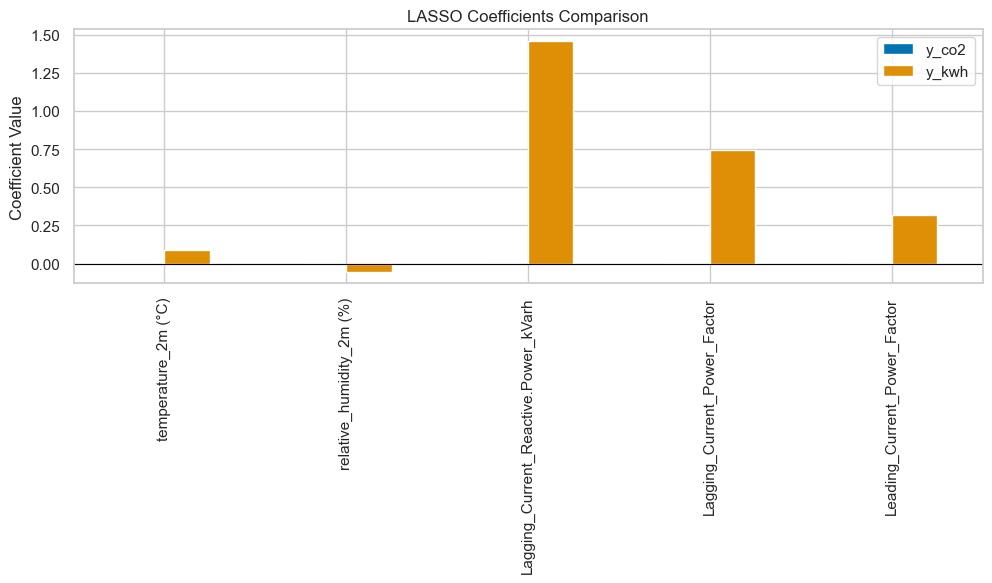

In [22]:
#Coefficient Comparison Charts
#Using a side-by-side bar plot to show scaled LASSO coefficients for both CO₂ and kWh models
#hopefully it will highlight the predictors diverge in influence across the target variables
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Lasso


# Assuming df is your DataFrame with the data
# First, create and fit the LASSO models
# You need to define X (your feature matrix) before this code
X = df[predictors]  # Your feature matrix
y_co2 = df['CO2(tCO2)']
y_kwh = df['Usage_kWh']

# Create and fit LASSO models
lasso_co2 = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso_co2.fit(X, y_co2)

lasso_kwh = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso_kwh.fit(X, y_kwh)

# create the coefficient comparison dataframe
coefs_df = pd.DataFrame({
    'y_co2': lasso_co2.coef_,
    'y_kwh': lasso_kwh.coef_
}, index=predictors)

coefs_df.plot(kind='bar', figsize=(10,6), title='LASSO Coefficients Comparison')
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()


C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\2352398428.py:26: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\srsch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


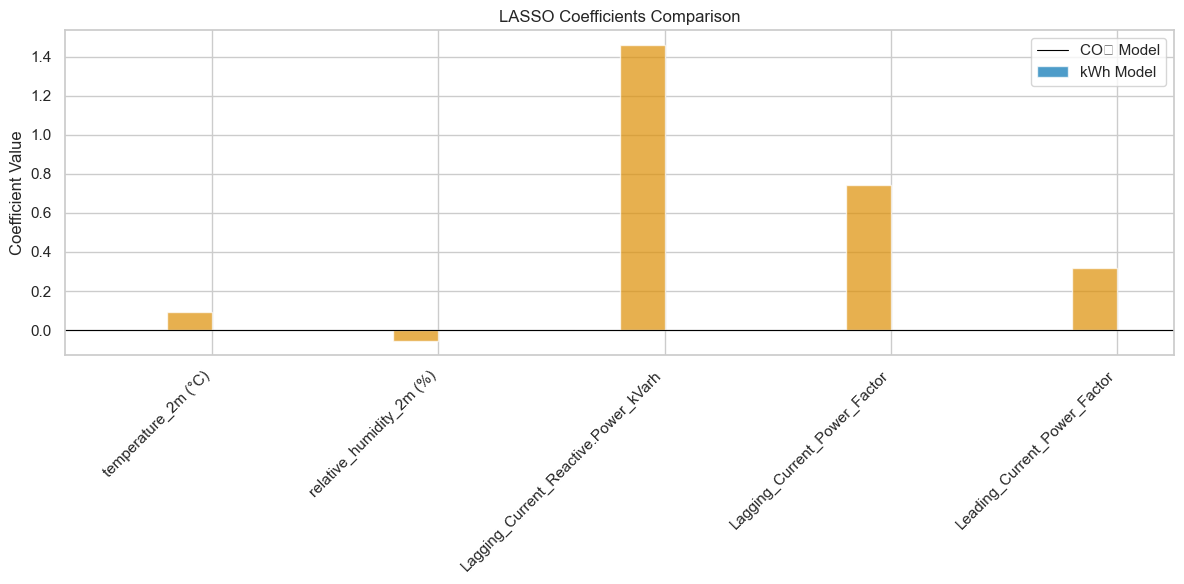

C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\2352398428.py:44: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\srsch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


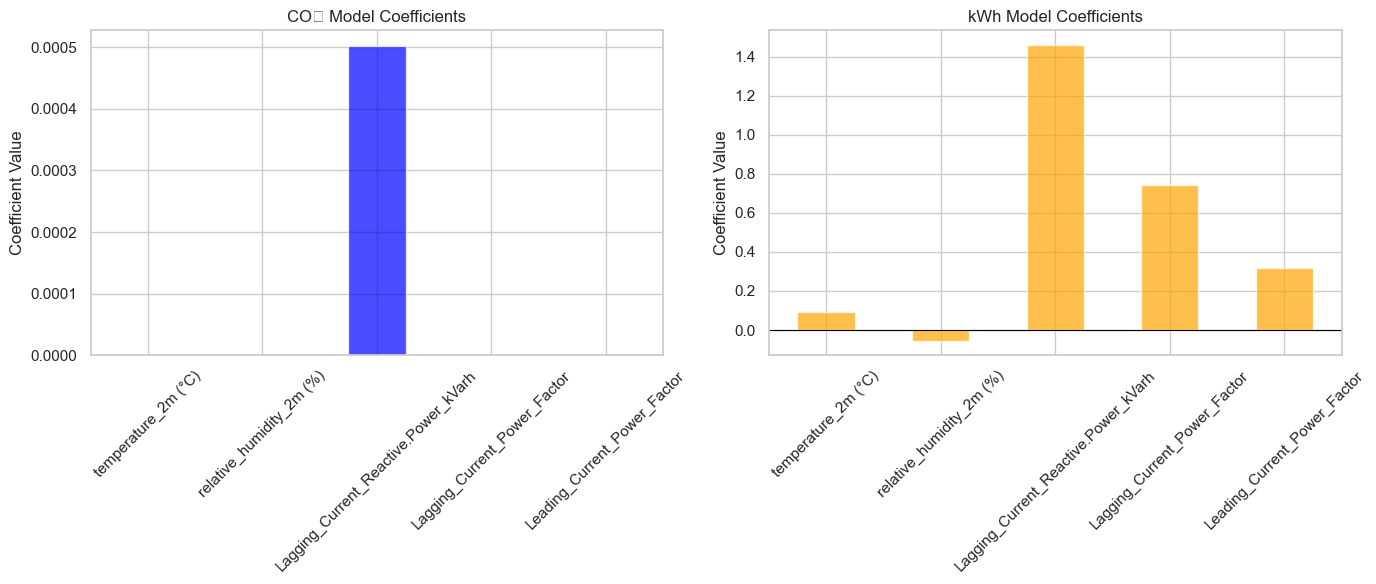

In [23]:
#Coefficient Comparison Charts
#Using a side-by-side bar plot to show scaled LASSO coefficients for both CO₂ and kWh models
import matplotlib.pyplot as plt
import pandas as pd

# Assuming lasso_co2 and lasso_kwh are already defined and fitted

# Create the coefficient comparison dataframe
coefs_df = pd.DataFrame({
    'y_co2': lasso_co2.coef_,
    'y_kwh': lasso_kwh.coef_
}, index=predictors)

# Plot with transparency and side-by-side bars instead of overlapping
ax = coefs_df.plot(kind='bar', figsize=(12,6), 
                  title='LASSO Coefficients Comparison',
                  alpha=0.7,  # Add transparency
                  width=0.4,  # Make bars narrower
                  position=1)  # Position bars side by side

# Improve the visualization
plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel('Coefficient Value')
plt.legend(['CO₂ Model', 'kWh Model'])
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()
plt.show()

# Alternative: the coefficients side by side in separate subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

coefs_df['y_co2'].plot(kind='bar', ax=ax1, color='blue', alpha=0.7)
ax1.set_title('CO₂ Model Coefficients')
ax1.axhline(0, color='black', linewidth=0.8)
ax1.set_ylabel('Coefficient Value')
ax1.tick_params(axis='x', rotation=45)

coefs_df['y_kwh'].plot(kind='bar', ax=ax2, color='orange', alpha=0.7)
ax2.set_title('kWh Model Coefficients')
ax2.axhline(0, color='black', linewidth=0.8)
ax2.set_ylabel('Coefficient Value')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\4097054435.py:50: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\srsch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


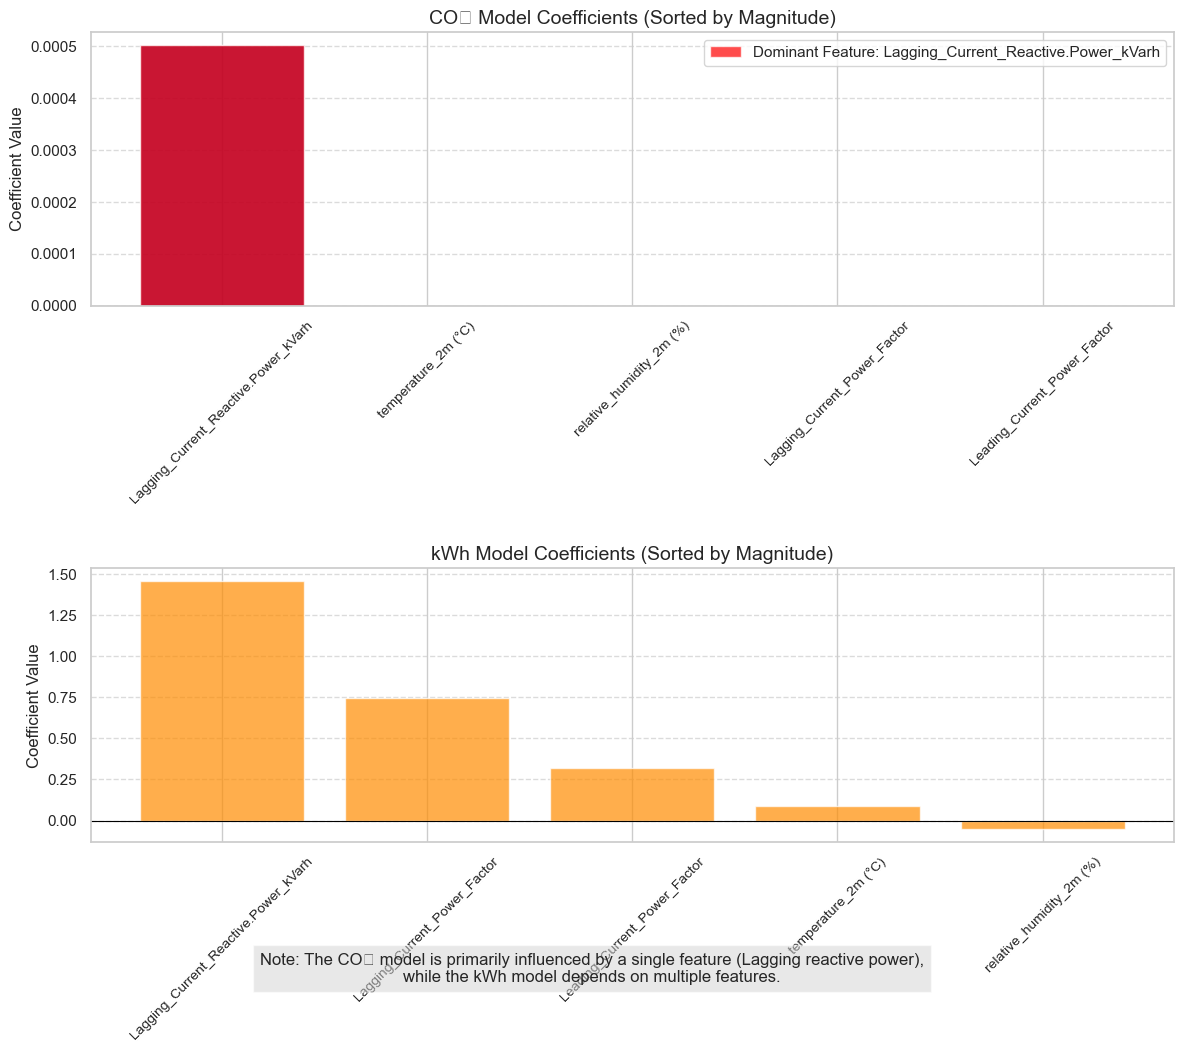

CO2 Model Coefficients (Sorted by Magnitude):
                                         y_co2
Lagging_Current_Reactive.Power_kVarh  0.000502
temperature_2m (°C)                   0.000000
relative_humidity_2m (%)              0.000000
Lagging_Current_Power_Factor          0.000000
Leading_Current_Power_Factor          0.000000

kWh Model Coefficients (Sorted by Magnitude):
                                         y_kwh
Lagging_Current_Reactive.Power_kVarh  1.458640
Lagging_Current_Power_Factor          0.744297
Leading_Current_Power_Factor          0.317063
temperature_2m (°C)                   0.090030
relative_humidity_2m (%)              0.053556


In [24]:
# Enhanced visualization to highlight the difference between CO2 and kWh models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming lasso_co2 and lasso_kwh are already defined and fitted

# Create the coefficient comparison dataframe
coefs_df = pd.DataFrame({
    'y_co2': lasso_co2.coef_,
    'y_kwh': lasso_kwh.coef_
}, index=predictors)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [1, 1]})

# Sort coefficients by absolute value for better visualization
co2_sorted = coefs_df['y_co2'].abs().sort_values(ascending=False)
kwh_sorted = coefs_df['y_kwh'].abs().sort_values(ascending=False)

# Plot CO2 coefficients
co2_data = coefs_df.loc[co2_sorted.index, 'y_co2']
bars1 = ax1.bar(co2_data.index, co2_data, color='darkblue', alpha=0.7)
ax1.set_title('CO₂ Model Coefficients (Sorted by Magnitude)', fontsize=14)
ax1.axhline(0, color='black', linewidth=0.8)
ax1.set_ylabel('Coefficient Value', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the dominant feature in CO2 model
max_idx = co2_data.abs().idxmax()
max_bar = ax1.bar([max_idx], [co2_data[max_idx]], color='red', alpha=0.7)
ax1.legend([max_bar[0]], ['Dominant Feature: ' + max_idx])

# Plot kWh coefficients
kwh_data = coefs_df.loc[kwh_sorted.index, 'y_kwh']
bars2 = ax2.bar(kwh_data.index, kwh_data, color='darkorange', alpha=0.7)
ax2.set_title('kWh Model Coefficients (Sorted by Magnitude)', fontsize=14)
ax2.axhline(0, color='black', linewidth=0.8)
ax2.set_ylabel('Coefficient Value', fontsize=12)
ax2.tick_params(axis='x', rotation=45, labelsize=10)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Add a text annotation explaining the difference
plt.figtext(0.5, 0.01, 
           "Note: The CO₂ model is primarily influenced by a single feature (Lagging reactive power),\n"
           "while the kWh model depends on multiple features.", 
           ha="center", fontsize=12, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for the annotation
plt.show()

# Optional: Create a table showing the exact coefficient values
print("CO2 Model Coefficients (Sorted by Magnitude):")
print(co2_sorted.to_frame().head(10))
print("\nkWh Model Coefficients (Sorted by Magnitude):")
print(kwh_sorted.to_frame().head(10))

In [25]:
#loading the goods aka library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Assuming my file (df) is loaded moving forward.  if not, I'll be back.

# Defining predictors and dependent variables
predictors = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 
              'Lagging_Current_Reactive.Power_kVarh', 'Lagging_Current_Power_Factor', 
              'Leading_Current_Power_Factor']
y_co2 = df['CO2(tCO2)']
y_kwh = df['Usage_kWh']
X = df[predictors]

#Standardize predictors (already done, but included for completeness and future copying -ha)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=predictors)

# Add constant for statsmodels
X_scaled_sm = sm.add_constant(X_scaled_df)

#LASSO for CO2 model
lasso_co2 = LassoCV(cv=5, random_state=42, max_iter=10000).fit(X_scaled_df, y_co2)
print("CO2 Model - LASSO Coefficients:")
print(pd.Series(lasso_co2.coef_, index=predictors))
print(f"Optimal alpha: {lasso_co2.alpha_:.6f}")

#LASSO for kWh model
lasso_kwh = LassoCV(cv=5, random_state=42, max_iter=10000).fit(X_scaled_df, y_kwh)
print("\nkWh Model - LASSO Coefficients:")
print(pd.Series(lasso_kwh.coef_, index=predictors))
print(f"Optimal alpha: {lasso_kwh.alpha_:.6f}")

# Fit OLS with LASSO-selected variables (Ordinary Least Squares)
#Filtering out features where Lasso coefficients are zero, focus on important predictors
lasso_selected_co2 = X_scaled_sm.loc[:, ['const'] + [col for col, coef in zip(predictors, lasso_co2.coef_) if coef != 0]]
lasso_selected_kwh = X_scaled_sm.loc[:, ['const'] + [col for col, coef in zip(predictors, lasso_kwh.coef_) if coef != 0]]

model_co2_lasso = sm.OLS(y_co2, lasso_selected_co2).fit()
model_kwh_lasso = sm.OLS(y_kwh, lasso_selected_kwh).fit()

print("\nCO2 Model (LASSO-selected variables):")
print(model_co2_lasso.summary())
print("\nkWh Model (LASSO-selected variables):")
print(model_kwh_lasso.summary())

CO2 Model - LASSO Coefficients:
temperature_2m (°C)                     0.000444
relative_humidity_2m (%)               -0.000378
Lagging_Current_Reactive.Power_kVarh    0.011258
Lagging_Current_Power_Factor            0.006716
Leading_Current_Power_Factor            0.004708
dtype: float64
Optimal alpha: 0.000094

kWh Model - LASSO Coefficients:
temperature_2m (°C)                      0.280719
relative_humidity_2m (%)                -0.630660
Lagging_Current_Reactive.Power_kVarh    24.016861
Lagging_Current_Power_Factor            13.353312
Leading_Current_Power_Factor             8.706943
dtype: float64
Optimal alpha: 0.369493

CO2 Model (LASSO-selected variables):
                            OLS Regression Results                            
Dep. Variable:              CO2(tCO2)   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 6.075e+04
Date:  

In [26]:
# rerunning code with adding a panda that was missing, preserving df
#creating a X_scaled_df
#Import StandardScaler and other 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import pandas as pd


# Assuming my file (df) is loaded moving forward.  if not, I'll be back.

# Defining predictors and dependent variables
predictors = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 
              'Lagging_Current_Reactive.Power_kVarh', 'Lagging_Current_Power_Factor', 
              'Leading_Current_Power_Factor']
y_co2 = df['CO2(tCO2)']
y_kwh = df['Usage_kWh']
X = df[predictors]

#Standardize predictors (already done, but included for completeness and future copying -ha)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=predictors, index=df.index)  # Preserve original index

# Add constant for statsmodels
X_scaled_sm = sm.add_constant(X_scaled_df)

#LASSO for CO2 model
lasso_co2 = LassoCV(cv=5, random_state=42, max_iter=10000).fit(X_scaled_df, y_co2)
print("CO2 Model - LASSO Coefficients:")
print(pd.Series(lasso_co2.coef_, index=predictors))
print(f"Optimal alpha: {lasso_co2.alpha_:.6f}")

#LASSO for kWh model
lasso_kwh = LassoCV(cv=5, random_state=42, max_iter=10000).fit(X_scaled_df, y_kwh)
print("\nkWh Model - LASSO Coefficients:")
print(pd.Series(lasso_kwh.coef_, index=predictors))
print(f"Optimal alpha: {lasso_kwh.alpha_:.6f}")

# Fit OLS with LASSO-selected variables (Ordinary Least Squares)
# Create masks for non-zero coefficients
co2_mask = [coef != 0 for coef in lasso_co2.coef_]
kwh_mask = [coef != 0 for coef in lasso_kwh.coef_]

# Select columns with non-zero coefficients and add constant
lasso_selected_co2_cols = ['const'] + [col for col, selected in zip(predictors, co2_mask) if selected]
lasso_selected_kwh_cols = ['const'] + [col for col, selected in zip(predictors, kwh_mask) if selected]

# Use the original DataFrame with preserved indices
lasso_selected_co2 = X_scaled_sm[lasso_selected_co2_cols]
lasso_selected_kwh = X_scaled_sm[lasso_selected_kwh_cols]

# Fit OLS models
model_co2_lasso = sm.OLS(y_co2, lasso_selected_co2).fit()
model_kwh_lasso = sm.OLS(y_kwh, lasso_selected_kwh).fit()

print("\nCO2 Model (LASSO-selected variables):")
print(model_co2_lasso.summary())
print("\nkWh Model (LASSO-selected variables):")
print(model_kwh_lasso.summary())

CO2 Model - LASSO Coefficients:
temperature_2m (°C)                     0.000444
relative_humidity_2m (%)               -0.000378
Lagging_Current_Reactive.Power_kVarh    0.011258
Lagging_Current_Power_Factor            0.006716
Leading_Current_Power_Factor            0.004708
dtype: float64
Optimal alpha: 0.000094

kWh Model - LASSO Coefficients:
temperature_2m (°C)                      0.280719
relative_humidity_2m (%)                -0.630660
Lagging_Current_Reactive.Power_kVarh    24.016861
Lagging_Current_Power_Factor            13.353312
Leading_Current_Power_Factor             8.706943
dtype: float64
Optimal alpha: 0.369493

CO2 Model (LASSO-selected variables):
                            OLS Regression Results                            
Dep. Variable:              CO2(tCO2)   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 6.075e+04
Date:  

In [27]:
#working on additional Metrics to Complement LASSO (Lasso is reg technique to prevent over fit and multicollinearity)
#want to ensure not over-relying on AIC: calculate BIC, in-sample MSE, and compare with CV MSE
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming have model_co2_lasso, model_kwh_lasso, y_co2, y_kwh, lasso_selected_co2, lasso_selected_kwh from LASSO
#Note for me:BIC helps select best model from competing models. balance fit against complexity.

# Function to calculate BIC
def calculate_bic(model, n, y, X):
    mse = mean_squared_error(y, model.fittedvalues)
    k = len(model.params)
    bic = n * np.log(mse) + k * np.log(n)
    return bic

# Calculate metrics (Bayesian Information Criterion (BIC)}
n = len(y_co2)
bic_co2 = calculate_bic(model_co2_lasso, n, y_co2, lasso_selected_co2)
bic_kwh = calculate_bic(model_kwh_lasso, n, y_kwh, lasso_selected_kwh)

mse_co2_insample = mean_squared_error(y_co2, model_co2_lasso.fittedvalues)
mse_kwh_insample = mean_squared_error(y_kwh, model_kwh_lasso.fittedvalues)

print("CO2 Model Metrics:")
print(f"BIC: {bic_co2:.2f}, Adjusted R-squared: {model_co2_lasso.rsquared_adj:.4f}")
print(f"In-sample MSE: {mse_co2_insample:.6f}, CV MSE: 0.000031")
print(f"AIC: {model_co2_lasso.aic:.2f} (from LASSO model)")

print("\nkWh Model Metrics:")
print(f"BIC: {bic_kwh:.2f}, Adjusted R-squared: {model_kwh_lasso.rsquared_adj:.4f}")
print(f"In-sample MSE: {mse_kwh_insample:.6f}, CV MSE: 115.588644")
print(f"AIC: {model_kwh_lasso.aic:.2f} (from LASSO model)")

print("reminder - lower BIC indicates better model",("I hope!"))

#Adding code to see if get more info.
print("more metrics added for comparison.")
# Enhanced version with more metrics
def calculate_model_metrics(model, y, X):
    n = len(y)
    mse = mean_squared_error(y, model.fittedvalues)
    k = len(model.params)
    bic = n * np.log(mse) + k * np.log(n)
    r2 = model.rsquared
    
    return {
        'BIC': bic,
        'MSE': mse,
        'R-squared': r2,
        'Num_Parameters': k,
        'Sample_Size': n
    }

# Calculate metrics for both models
co2_metrics = calculate_model_metrics(model_co2_lasso, y_co2, lasso_selected_co2)
kwh_metrics = calculate_model_metrics(model_kwh_lasso, y_kwh, lasso_selected_kwh)

# Print results in a formatted way
print("CO2 Model Metrics:")
for metric, value in co2_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nkWh Model Metrics:")
for metric, value in kwh_metrics.items():
    print(f"{metric}: {value:.4f}")


CO2 Model Metrics:
BIC: -368582.64, Adjusted R-squared: 0.8966
In-sample MSE: 0.000027, CV MSE: 0.000031
AIC: -269194.21 (from LASSO model)

kWh Model Metrics:
BIC: 161259.72, Adjusted R-squared: 0.9110
In-sample MSE: 99.521034, CV MSE: 115.588644
AIC: 260648.14 (from LASSO model)
reminder - lower BIC indicates better model I hope!
more metrics added for comparison.
CO2 Model Metrics:
BIC: -368582.6373
MSE: 0.0000
R-squared: 0.8966
Num_Parameters: 6.0000
Sample_Size: 35040.0000

kWh Model Metrics:
BIC: 161259.7159
MSE: 99.5210
R-squared: 0.9110
Num_Parameters: 6.0000
Sample_Size: 35040.0000


In [28]:

#Want to see what the kWh model looks like without the Leading_current_Power_Factor
#load my libraries 
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Assuming lasso_selected_co2, lasso_selected_kwh, y_co2, y_kwh from LASSO models
# Function to calculate BIC
def calculate_bic(model, n, y, X):
    mse = mean_squared_error(y, model.fittedvalues)
    k = len(model.params)
    bic = n * np.log(mse) + k * np.log(n)
    return bic

# kWh Model without Leading_current_Power_Factor
X_kwh_reduced = lasso_selected_kwh.drop(columns=['Leading_Current_Power_Factor'])
model_kwh_reduced = sm.OLS(y_kwh, X_kwh_reduced).fit()
bic_kwh_reduced = calculate_bic(model_kwh_reduced, len(y_kwh), y_kwh, X_kwh_reduced)

print("kWh Model (LASSO) Metrics:")
print(f"BIC: {bic_kwh:.2f}, Adjusted R-squared: {model_kwh_lasso.rsquared_adj:.4f}")
print(f"In-sample MSE: {mse_kwh_insample:.6f}, CV MSE: 115.588644")

print("\nkWh Model (without Leading_Current_Power_Factor):")
print(f"BIC: {bic_kwh_reduced:.2f}, Adjusted R-squared: {model_kwh_reduced.rsquared_adj:.4f}")
print(f"In-sample MSE: {mean_squared_error(y_kwh, model_kwh_reduced.fittedvalues):.6f}, CV MSE: 155.424307")



kWh Model (LASSO) Metrics:
BIC: 161259.72, Adjusted R-squared: 0.9110
In-sample MSE: 99.521034, CV MSE: 115.588644

kWh Model (without Leading_Current_Power_Factor):
BIC: 174140.40, Adjusted R-squared: 0.8714
In-sample MSE: 143.777508, CV MSE: 155.424307


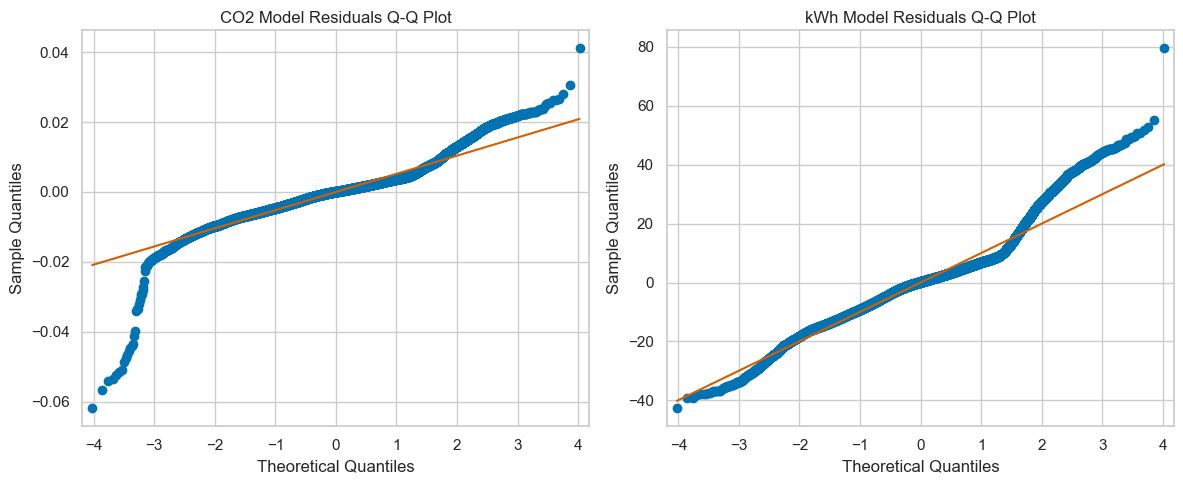

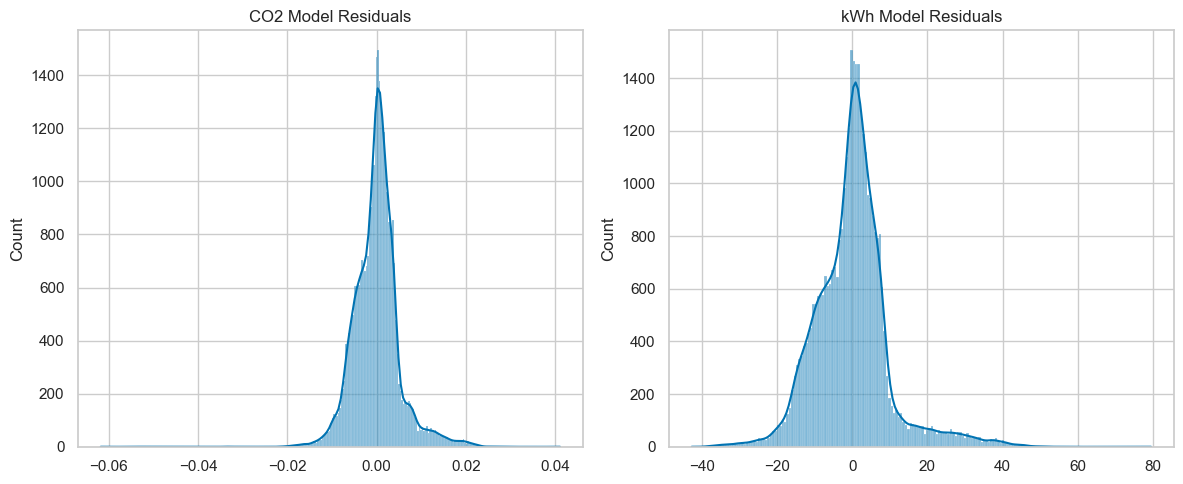

Shapiro-Wilk Test for CO2(tCO2): Statistic=0.7307, p-value=0.0000
Shapiro-Wilk Test for Usage_kWh: Statistic=0.7532, p-value=0.0000
Shapiro-Wilk Test for Lagging_Current_Reactive.Power_kVarh: Statistic=0.7686, p-value=0.0000
CO2 Skewness: 1.1494
Usage_kWh Skewness: 1.1974

kWh Model (Log-transformed):
                            OLS Regression Results                            
Dep. Variable:                log_kWh   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 9.995e+04
Date:                Thu, 28 Aug 2025   Prob (F-statistic):               0.00
Time:                        12:12:55   Log-Likelihood:                -10696.
No. Observations:               35040   AIC:                         2.140e+04
Df Residuals:                   35034   BIC:                         2.145e+04
Df Model:                           5                            

C:\Users\srsch\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 35040.
  res = hypotest_fun_out(*samples, **kwds)


In [29]:
#the kWh model is solid (R-squared: 0.911, CV MSE: 115.588644), 
#and keeping Leading_current_Power_Factor is justified. 
#The CO2 model (R-squared: 0.897, CV MSE: 0.000031) is also strong. 
#However, non-normality (kurtosis 6.076 for kWh, 9.416 for CO2; skewness 0.775 for kWh) 
#and autocorrelation (Durbin-Watson 0.365 for kWh, 0.516 for CO2) need addressing,
#After will followed with time series and combining CO2/kWh models. 
#First thing is normality checks and then can start initial time series exploration

#importing my libraries, like the name scipy.stats and its powerful stats package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm

#Normality Checks and Transformations 
#notes -Non-normality affects MSE and BIC reliability, potentially inflating errors
#(e.g., kWh CV MSE: 115.588644). Need to address this to ensure robust inference before time series stuff.

# Assuming df, y_co2, y_kwh, lasso_selected_co2, lasso_selected_kwh from LASSO
# Assuming model_co2_lasso, model_kwh_lasso are your LASSO OLS models

# Q-Q plots for residuals (diagnostic tool)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
qqplot(model_co2_lasso.resid, line='s', ax=ax1)
ax1.set_title('CO2 Model Residuals Q-Q Plot')
qqplot(model_kwh_lasso.resid, line='s', ax=ax2)
ax2.set_title('kWh Model Residuals Q-Q Plot')
plt.tight_layout()
plt.show()

# Histograms of residuals (check for valid regression inference)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(model_co2_lasso.resid, kde=True)
plt.title('CO2 Model Residuals')
plt.subplot(1, 2, 2)
sns.histplot(model_kwh_lasso.resid, kde=True)
plt.title('kWh Model Residuals')
plt.tight_layout()
plt.show()

# Shapiro-Wilk test for key variables (Key point : Null hypothesis is Data is normally dist. pvalue<0.05 non-normal)
for var in ['CO2(tCO2)', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh']:
    stat, p = shapiro(df[var])
    print(f"Shapiro-Wilk Test for {var}: Statistic={stat:.4f}, p-value={p:.4f}")

# Check skewness
print(f"CO2 Skewness: {df['CO2(tCO2)'].skew():.4f}")
print(f"Usage_kWh Skewness: {df['Usage_kWh'].skew():.4f}")

# Log transformation for kWh (due to skewness 0.775)
df['log_kWh'] = np.log1p(df['Usage_kWh'])

# Re-run Ordinary Least Squares(OLS) with log-transformed kWh
model_kwh_log = sm.OLS(df['log_kWh'], lasso_selected_kwh).fit()
print("\nkWh Model (Log-transformed):")
print(model_kwh_log.summary())

# Calculate BIC for log-transformed model
def calculate_bic(model, n, y, X):
    mse = mean_squared_error(y, model.fittedvalues)
    k = len(model.params)
    bic = n * np.log(mse) + k * np.log(n)
    return bic

bic_kwh_log = calculate_bic(model_kwh_log, len(df['log_kWh']), df['log_kWh'], lasso_selected_kwh)
print(f"\nLog kWh Model BIC: {bic_kwh_log:.2f}, Adjusted R-squared: {model_kwh_log.rsquared_adj:.4f}")
print(f"Original kWh BIC: 161259.72, Adjusted R-squared: 0.9110")


CO2 Model (Log-transformed):
                            OLS Regression Results                            
Dep. Variable:                log_CO2   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 6.188e+04
Date:                Thu, 28 Aug 2025   Prob (F-statistic):               0.00
Time:                        12:13:04   Log-Likelihood:             1.3561e+05
No. Observations:               35040   AIC:                        -2.712e+05
Df Residuals:                   35034   BIC:                        -2.712e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

<Figure size 600x400 with 0 Axes>

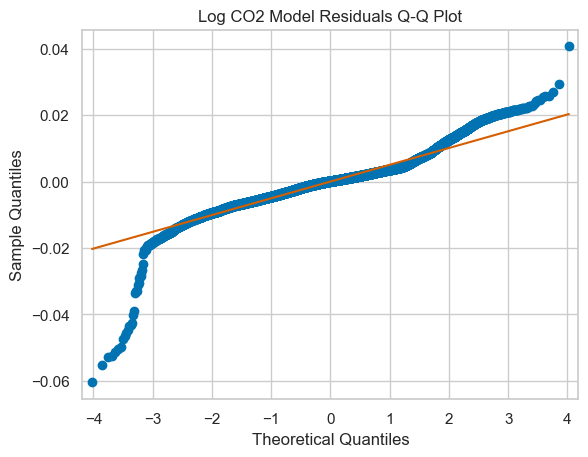

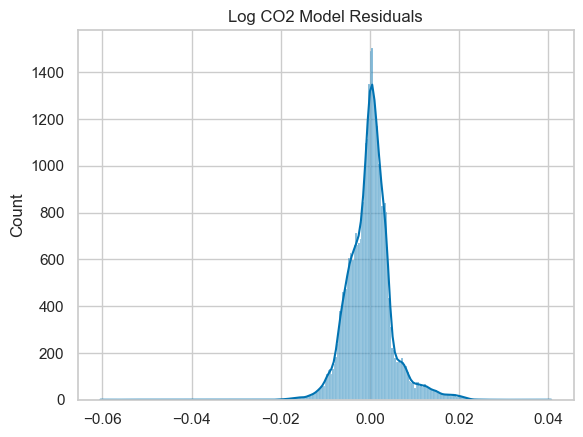

Log CO2 Skewness: 1.1286


In [30]:
#Concerns with normility still Will rerun the OLS with log transformed CO2. 
#import my libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm

# Assuming df, y_co2, lasso_selected_co2, model_co2_lasso from LASSO
# Log transformation for CO2 (handle small values with log1p)
df['log_CO2'] = np.log1p(df['CO2(tCO2)'])


# Re-run OLS with log-transformed CO2
model_co2_log = sm.OLS(df['log_CO2'].dropna(), lasso_selected_co2.dropna()).fit()
print("\nCO2 Model (Log-transformed):")
print(model_co2_log.summary())

# Calculate BIC
def calculate_bic(model, n, y, X):
    mse = mean_squared_error(y, model.fittedvalues)
    k = len(model.params)
    bic = n * np.log(mse) + k * np.log(n)
    return bic

bic_co2_log = calculate_bic(model_co2_log, len(df['log_CO2'].dropna()), df['log_CO2'].dropna(), lasso_selected_co2.dropna())
print(f"\nLog CO2 Model BIC: {bic_co2_log:.2f}, Adjusted R-squared: {model_co2_log.rsquared_adj:.4f}")
print(f"Original CO2 BIC: -368582.64, Adjusted R-squared: 0.8966")

# Q-Q plot for log-CO2 residuals
plt.figure(figsize=(6, 4))
qqplot(model_co2_log.resid, line='s')
plt.title('Log CO2 Model Residuals Q-Q Plot')
plt.show()

# Histogram of log-CO2 residuals
sns.histplot(model_co2_log.resid, kde=True)
plt.title('Log CO2 Model Residuals')
plt.show()

# Check skewness
print(f"Log CO2 Skewness: {df['log_CO2'].skew():.4f}")


CO2 Model (Yeo-Johnson):
                            OLS Regression Results                            
Dep. Variable:                 yj_CO2   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 7.403e+04
Date:                Thu, 28 Aug 2025   Prob (F-statistic):               0.00
Time:                        12:13:10   Log-Likelihood:             1.6838e+05
No. Observations:               35040   AIC:                        -3.368e+05
Df Residuals:                   35034   BIC:                        -3.367e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

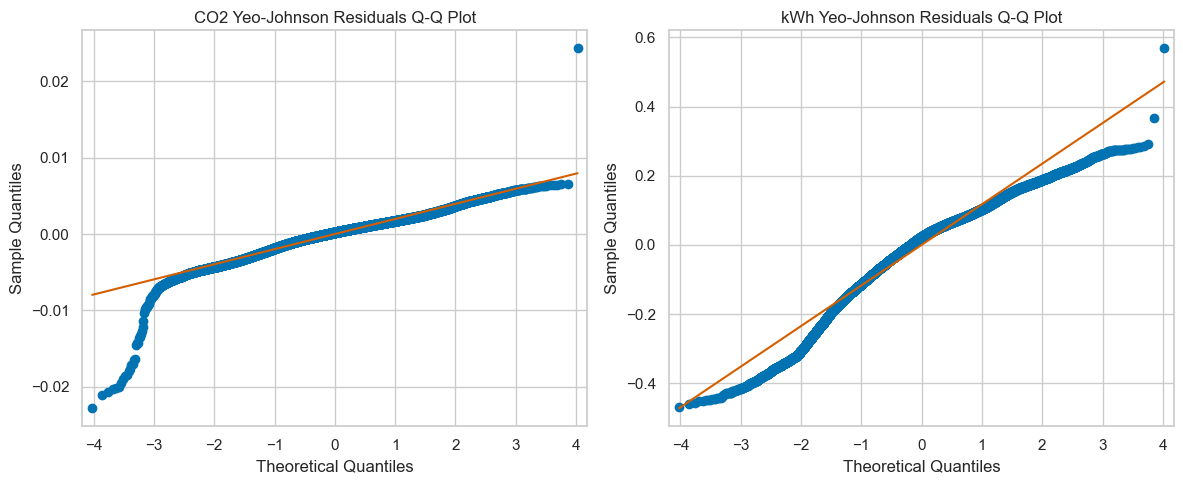

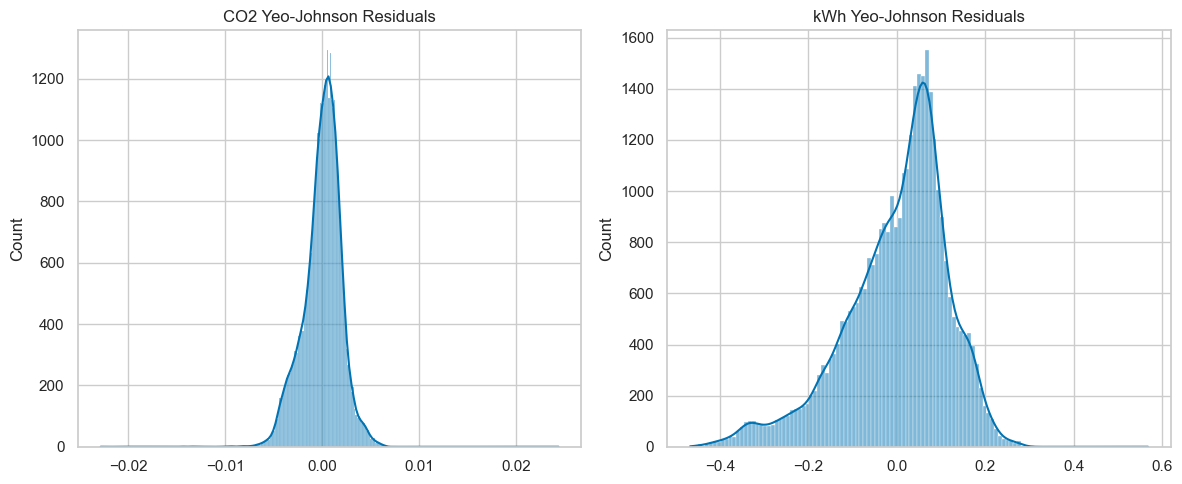

YJ CO2 Skewness: 0.5632
YJ kWh Skewness: 0.3442


In [31]:
#TRying different transformation to improve normal fits 
#libratires adding more
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import PowerTransformer
import statsmodels.api as sm

# Assuming df, y_co2, y_kwh, lasso_selected_co2, lasso_selected_kwh from LASSO
# Yeo-Johnson transformation First transformation try.  next on following cell
pt = PowerTransformer(method='yeo-johnson', standardize=False)
df['yj_CO2'] = pt.fit_transform(df[['CO2(tCO2)']])
df['yj_kWh'] = pt.fit_transform(df[['Usage_kWh']])

# Re-run OLS for CO2
model_co2_yj = sm.OLS(df['yj_CO2'].dropna(), lasso_selected_co2.dropna()).fit()
print("\nCO2 Model (Yeo-Johnson):")
print(model_co2_yj.summary())

# Re-run OLS for kWh
model_kwh_yj = sm.OLS(df['yj_kWh'].dropna(), lasso_selected_kwh.dropna()).fit()
print("\nkWh Model (Yeo-Johnson):")
print(model_kwh_yj.summary())

# Calculate BIC
def calculate_bic(model, n, y, X):
    mse = mean_squared_error(y, model.fittedvalues)
    k = len(model.params)
    bic = n * np.log(mse) + k * np.log(n)
    return bic

bic_co2_yj = calculate_bic(model_co2_yj, len(df['yj_CO2'].dropna()), df['yj_CO2'].dropna(), lasso_selected_co2.dropna())
bic_kwh_yj = calculate_bic(model_kwh_yj, len(df['yj_kWh'].dropna()), df['yj_kWh'].dropna(), lasso_selected_kwh.dropna())

print(f"\nCO2 Yeo-Johnson BIC: {bic_co2_yj:.2f}, Adjusted R-squared: {model_co2_yj.rsquared_adj:.4f}")
print(f"Log CO2 BIC: -370589.95, Adjusted R-squared: 0.8983")
print(f"\nkWh Yeo-Johnson BIC: {bic_kwh_yj:.2f}, Adjusted R-squared: {model_kwh_yj.rsquared_adj:.4f}")
print(f"Log kWh BIC: -77984.57, Adjusted R-squared: 0.9345")

# Q-Q plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
qqplot(model_co2_yj.resid, line='s', ax=ax1)
ax1.set_title('CO2 Yeo-Johnson Residuals Q-Q Plot')
qqplot(model_kwh_yj.resid, line='s', ax=ax2)
ax2.set_title('kWh Yeo-Johnson Residuals Q-Q Plot')
plt.tight_layout()
plt.show()

# Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(model_co2_yj.resid, kde=True)
plt.title('CO2 Yeo-Johnson Residuals')
plt.subplot(1, 2, 2)
sns.histplot(model_kwh_yj.resid, kde=True)
plt.title('kWh Yeo-Johnson Residuals')
plt.tight_layout()
plt.show()

# Skewness
print(f"YJ CO2 Skewness: {df['yj_CO2'].skew():.4f}")
print(f"YJ kWh Skewness: {df['yj_kWh'].skew():.4f}")


CO2 Model (Quantile):
                            OLS Regression Results                            
Dep. Variable:                 qt_CO2   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 6.124e+04
Date:                Thu, 28 Aug 2025   Prob (F-statistic):               0.00
Time:                        12:13:16   Log-Likelihood:                -48719.
No. Observations:               35040   AIC:                         9.745e+04
Df Residuals:                   35034   BIC:                         9.750e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

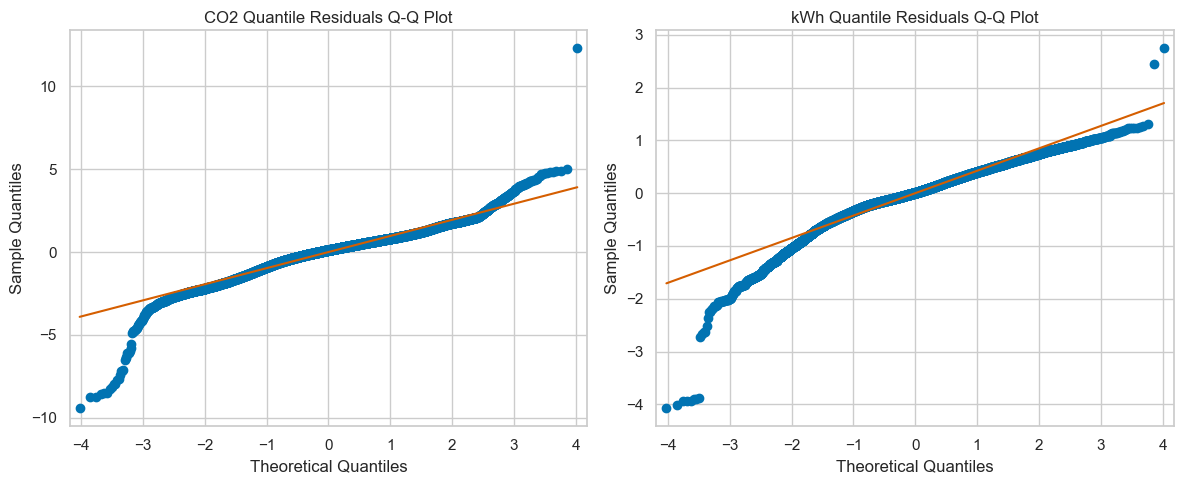

QT CO2 Skewness: 0.4497
QT kWh Skewness: -0.0139


In [32]:
from sklearn.preprocessing import QuantileTransformer

# Quantile transformation (normal output) TRansformation 2
qt = QuantileTransformer(output_distribution='normal', random_state=42)
df['qt_CO2'] = qt.fit_transform(df[['CO2(tCO2)']])
df['qt_kWh'] = qt.fit_transform(df[['Usage_kWh']])

# Re-run OLS for CO2
model_co2_qt = sm.OLS(df['qt_CO2'].dropna(), lasso_selected_co2.dropna()).fit()
print("\nCO2 Model (Quantile):")
print(model_co2_qt.summary())

# Re-run OLS for kWh
model_kwh_qt = sm.OLS(df['qt_kWh'].dropna(), lasso_selected_kwh.dropna()).fit()
print("\nkWh Model (Quantile):")
print(model_kwh_qt.summary())

# Calculate BIC
bic_co2_qt = calculate_bic(model_co2_qt, len(df['qt_CO2'].dropna()), df['qt_CO2'].dropna(), lasso_selected_co2.dropna())
bic_kwh_qt = calculate_bic(model_kwh_qt, len(df['qt_kWh'].dropna()), df['qt_kWh'].dropna(), lasso_selected_kwh.dropna())

print(f"\nCO2 Quantile BIC: {bic_co2_qt:.2f}, Adjusted R-squared: {model_co2_qt.rsquared_adj:.4f}")
print(f"\nkWh Quantile BIC: {bic_kwh_qt:.2f}, Adjusted R-squared: {model_kwh_qt.rsquared_adj:.4f}")

# Q-Q plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
qqplot(model_co2_qt.resid, line='s', ax=ax1)
ax1.set_title('CO2 Quantile Residuals Q-Q Plot')
qqplot(model_kwh_qt.resid, line='s', ax=ax2)
ax2.set_title('kWh Quantile Residuals Q-Q Plot')
plt.tight_layout()
plt.show()

# Skewness
print(f"QT CO2 Skewness: {df['qt_CO2'].skew():.4f}")
print(f"QT kWh Skewness: {df['qt_kWh'].skew():.4f}")

# Checking for outliers which could be the problem with normal fit
#Boxplots for outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['CO2(tCO2)'])
plt.title('CO2(tCO2) Boxplot')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Usage_kWh'])
plt.title('Usage_kWh Boxplot')
plt.tight_layout()
plt.show()

# Identify outliers (IQR method)
def detect_outliers(series):
    Q1, Q3 = series.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

co2_outliers = detect_outliers(df['CO2(tCO2)'])
kwh_outliers = detect_outliers(df['Usage_kWh'])
print(f"CO2 Outliers: {len(co2_outliers)}")
print(f"kWh Outliers: {len(kwh_outliers)}")



CO2 Model (Yeo-Johnson, No Outliers):
                            OLS Regression Results                            
Dep. Variable:                 yj_CO2   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 7.370e+04
Date:                Thu, 28 Aug 2025   Prob (F-statistic):               0.00
Time:                        12:13:23   Log-Likelihood:             1.6828e+05
No. Observations:               34593   AIC:                        -3.365e+05
Df Residuals:                   34587   BIC:                        -3.365e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

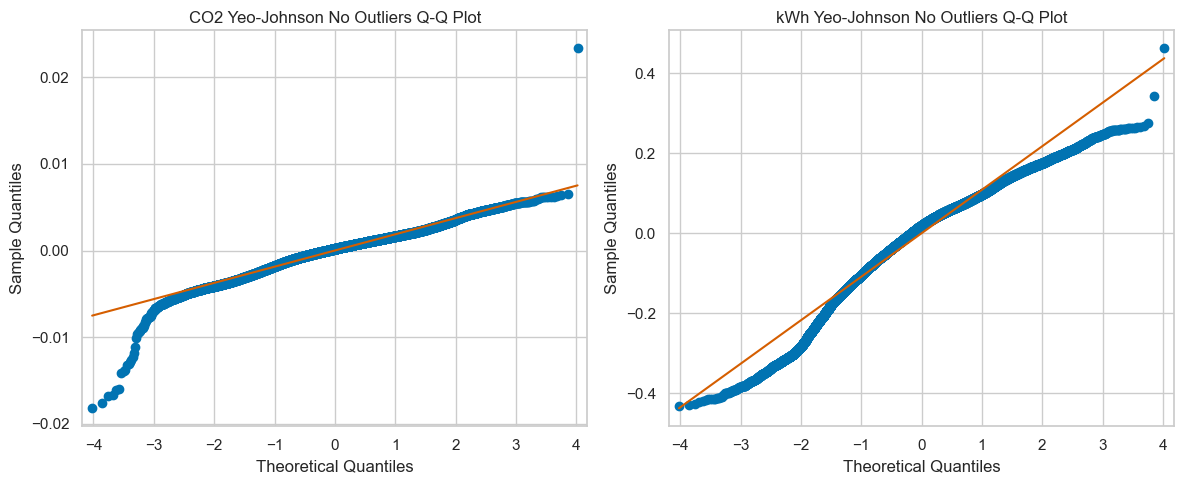

YJ CO2 No Outliers Skewness: 0.5771
YJ CO2 No Outliers Kurtosis: 1.4722
YJ kWh No Outliers Skewness: 0.3629
YJ kWh No Outliers Kurtosis: 1.3013


In [33]:

#Going to try to remove outliers to see if helps with normaility and curvature
#load/import my library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm

# Assuming df, lasso_selected_co2, lasso_selected_kwh from previous
#Remove outliers
def remove_outliers(series):
    Q1, Q3 = series.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return (series >= lower) & (series <= upper)

# Filter outliers
mask_co2 = remove_outliers(df['CO2(tCO2)'])

mask_kwh = remove_outliers(df['Usage_kWh'])
df_no_outliers = df[mask_co2 & mask_kwh].copy()

#Re-apply Yeo-Johnson which had the strongest model so far.  will add info later
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)
df_no_outliers['yj_CO2'] = pt.fit_transform(df_no_outliers[['CO2(tCO2)']])
df_no_outliers['yj_kWh'] = pt.fit_transform(df_no_outliers[['Usage_kWh']])

#Re-run OLS
model_co2_yj_no_out = sm.OLS(df_no_outliers['yj_CO2'].dropna(), lasso_selected_co2.loc[df_no_outliers.index].dropna()).fit()
model_kwh_yj_no_out = sm.OLS(df_no_outliers['yj_kWh'].dropna(), lasso_selected_kwh.loc[df_no_outliers.index].dropna()).fit()

print("\nCO2 Model (Yeo-Johnson, No Outliers):")
print(model_co2_yj_no_out.summary())
print("\nkWh Model (Yeo-Johnson, No Outliers):")
print(model_kwh_yj_no_out.summary())

#BIC (lets see where we are with that value)
def calculate_bic(model, n, y, X):
    mse = mean_squared_error(y, model.fittedvalues)
    k = len(model.params)
    bic = n * np.log(mse) + k * np.log(n)
    return bic

bic_co2_yj_no_out = calculate_bic(model_co2_yj_no_out, len(df_no_outliers), df_no_outliers['yj_CO2'].dropna(), lasso_selected_co2.loc[df_no_outliers.index].dropna())
bic_kwh_yj_no_out = calculate_bic(model_kwh_yj_no_out, len(df_no_outliers), df_no_outliers['yj_kWh'].dropna(), lasso_selected_kwh.loc[df_no_outliers.index].dropna())

print(f"\nCO2 Yeo-Johnson No Outliers BIC: {bic_co2_yj_no_out:.2f}, Adjusted R-squared: {model_co2_yj_no_out.rsquared_adj:.4f}")
print(f"CO2 Yeo-Johnson BIC: -436144.55, Adjusted R-squared: 0.9135")
print(f"\nkWh Yeo-Johnson No Outliers BIC: {bic_kwh_yj_no_out:.2f}, Adjusted R-squared: {model_kwh_yj_no_out.rsquared_adj:.4f}")
print(f"kWh Yeo-Johnson BIC: -150060.26, Adjusted R-squared: 0.9149")

# Q-Q plots - checking normality again
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
qqplot(model_co2_yj_no_out.resid, line='s', ax=ax1)
ax1.set_title('CO2 Yeo-Johnson No Outliers Q-Q Plot')
qqplot(model_kwh_yj_no_out.resid, line='s', ax=ax2)
ax2.set_title('kWh Yeo-Johnson No Outliers Q-Q Plot')
plt.tight_layout()
plt.show()

# Skewness and kurtosis (This has been an issues with all my models so far.)
from scipy.stats import skew, kurtosis
print(f"YJ CO2 No Outliers Skewness: {skew(df_no_outliers['yj_CO2'].dropna()):.4f}")
print(f"YJ CO2 No Outliers Kurtosis: {kurtosis(df_no_outliers['yj_CO2'].dropna(), fisher=False):.4f}")
print(f"YJ kWh No Outliers Skewness: {skew(df_no_outliers['yj_kWh'].dropna()):.4f}")
print(f"YJ kWh No Outliers Kurtosis: {kurtosis(df_no_outliers['yj_kWh'].dropna(), fisher=False):.4f}")


#Working on transformations, but want to look at my actual values when deteriming direction

#Unique values and counts
for column in ['CO2(tCO2)', 'Usage_kWh']:
    print(f"\nUnique values in {column}:")
    print(df[column].value_counts())



VIFs for kWh Model with CO2:
                               Variable        VIF
0                                 const   8.278192
1                   temperature_2m (°C)   1.318888
2              relative_humidity_2m (%)   1.388955
3  Lagging_Current_Reactive.Power_kVarh   4.880742
4          Lagging_Current_Power_Factor   6.070045
5          Leading_Current_Power_Factor   5.017821
6                                yj_CO2  11.564834

kWh Model with yj_CO2:
                            OLS Regression Results                            
Dep. Variable:                 yj_kWh   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 1.404e+05
Date:                Thu, 28 Aug 2025   Prob (F-statistic):               0.00
Time:                        12:13:28   Log-Likelihood:                 38598.
No. Observations:               35040   AIC:                    

<Figure size 600x400 with 0 Axes>

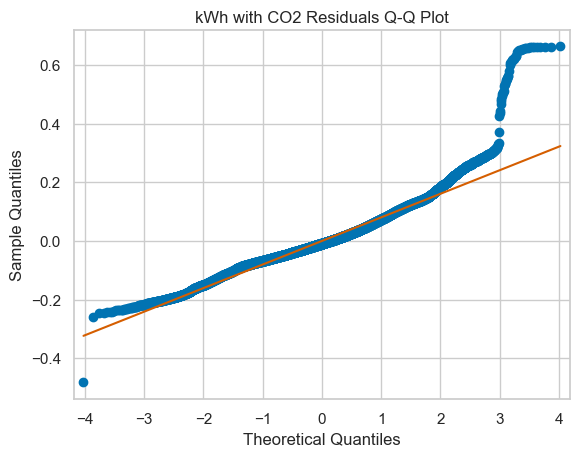

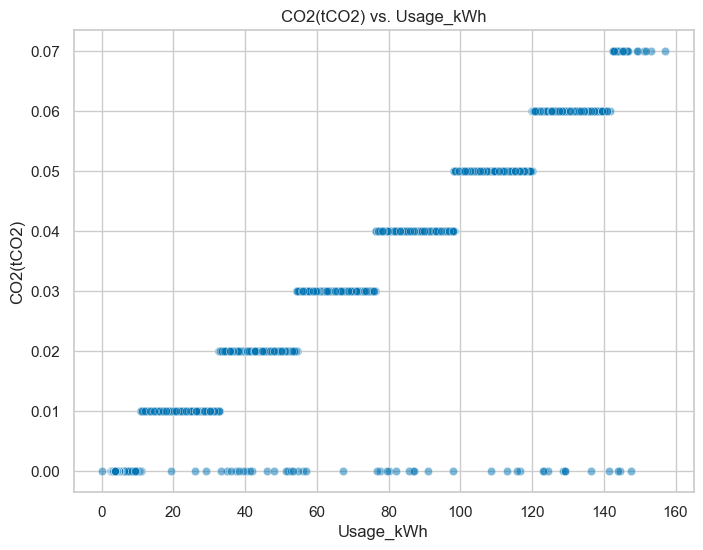

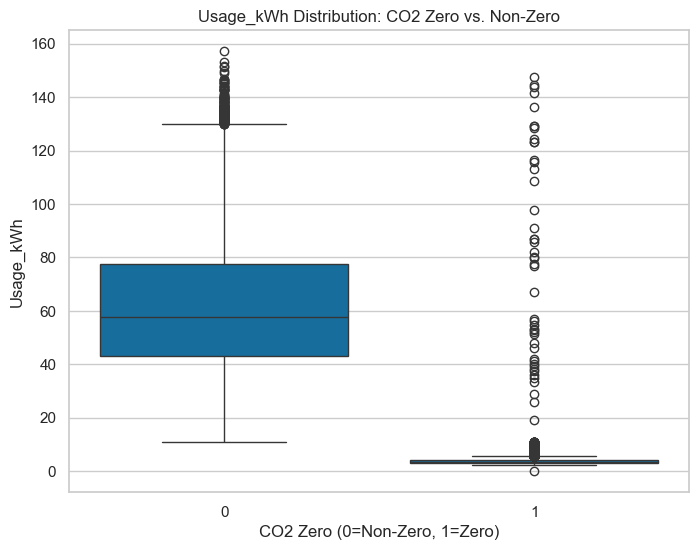

KeyError: "['Lagging_current_Reactive.Power_kVarh', 'Lagging_current_Power_Factor', 'Leading_current_Power_Factor'] not in index"

In [34]:
#will run other coding to handle the zeros in CO2
#however, wanted to run some code with CO2 in the model for kWh.
#Maybe help the model with explaining energy usage.  Maybe not...

#load my libriaries.  Hope I have them all I need.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.stats import skew, kurtosis
from statsmodels.graphics.gofplots import qqplot

# Assuming df, lasso_selected_kwh, yj_CO2, yj_kWh from previous
# Add yj_CO2 to kWh predictors
X_kwh_with_co2 = lasso_selected_kwh.copy()
X_kwh_with_co2['yj_CO2'] = df['yj_CO2']

# Check VIFs  This is a big tell
vif_data = pd.DataFrame()
vif_data['Variable'] = X_kwh_with_co2.columns
vif_data['VIF'] = [variance_inflation_factor(X_kwh_with_co2.values, i) for i in range(X_kwh_with_co2.shape[1])]
print("\nVIFs for kWh Model with CO2:")
print(vif_data)

# OLS with CO2
model_kwh_with_co2 = sm.OLS(df['yj_kWh'].dropna(), X_kwh_with_co2.dropna()).fit()
print("\nkWh Model with yj_CO2:")
print(model_kwh_with_co2.summary())

# BIC
def calculate_bic(model, n, y, X):
    mse = mean_squared_error(y, model.fittedvalues)
    k = len(model.params)
    bic = n * np.log(mse) + k * np.log(n)
    return bic

bic_kwh_with_co2 = calculate_bic(model_kwh_with_co2, len(df['yj_kWh'].dropna()), df['yj_kWh'].dropna(), X_kwh_with_co2.dropna())
print(f"\nkWh Yeo-Johnson with CO2 BIC: {bic_kwh_with_co2:.2f}, Adjusted R-squared: {model_kwh_with_co2.rsquared_adj:.4f}")
print(f"kWh Yeo-Johnson No Outliers BIC: -153391.67, Adjusted R-squared: 0.9139")

# Q-Q plot for residuals
plt.figure(figsize=(6, 4))
qqplot(model_kwh_with_co2.resid, line='s')
plt.title('kWh with CO2 Residuals Q-Q Plot')
plt.show()

# Scatterplot CO2 vs. kWh
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Usage_kWh'], y=df['CO2(tCO2)'], alpha=0.5)
plt.title('CO2(tCO2) vs. Usage_kWh')
plt.xlabel('Usage_kWh')
plt.ylabel('CO2(tCO2)')
plt.show()

# Boxplot of kWh for CO2 zero vs. non-zero
df['CO2_zero'] = (df['CO2(tCO2)'] == 0).astype(int)
plt.figure(figsize=(8, 6))
sns.boxplot(x='CO2_zero', y='Usage_kWh', data=df)
plt.title('Usage_kWh Distribution: CO2 Zero vs. Non-Zero')
plt.xlabel('CO2 Zero (0=Non-Zero, 1=Zero)')
plt.ylabel('Usage_kWh')
plt.show()

# Correlations
corr_matrix = df[['CO2(tCO2)', 'Usage_kWh', 'Lagging_current_Reactive.Power_kVarh', 
                  'Lagging_current_Power_Factor', 'Leading_current_Power_Factor']].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)


VIFs for kWh Model with CO2:
                               Variable        VIF
0                                 const   8.278192
1                   temperature_2m (°C)   1.318888
2              relative_humidity_2m (%)   1.388955
3  Lagging_Current_Reactive.Power_kVarh   4.880742
4          Lagging_Current_Power_Factor   6.070045
5          Leading_Current_Power_Factor   5.017821
6                                yj_CO2  11.564834

kWh Model with yj_CO2:
                            OLS Regression Results                            
Dep. Variable:                 yj_kWh   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 1.404e+05
Date:                Thu, 28 Aug 2025   Prob (F-statistic):               0.00
Time:                        12:13:32   Log-Likelihood:                 38598.
No. Observations:               35040   AIC:                    

<Figure size 600x400 with 0 Axes>

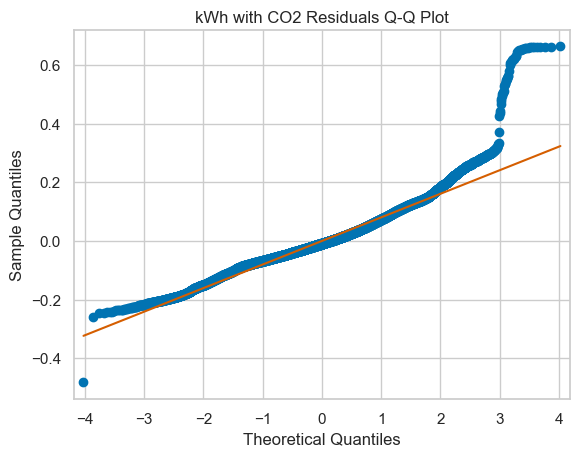

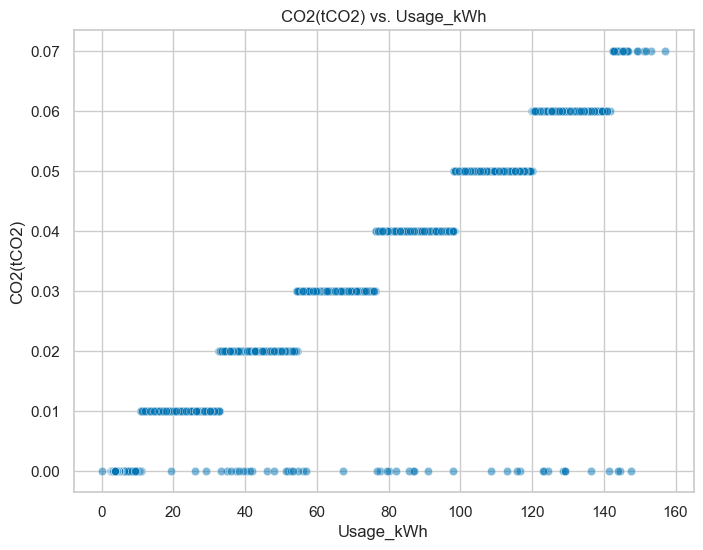

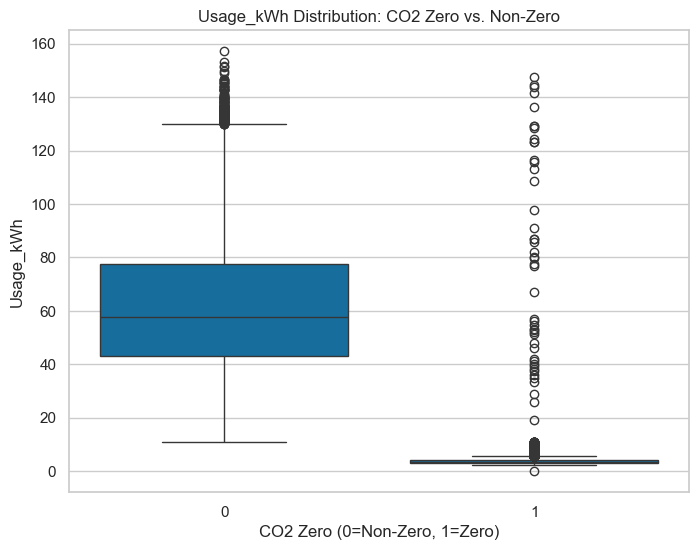


Correlation Matrix:
           CO2(tCO2)  Usage_kWh
CO2(tCO2)    1.00000    0.98818
Usage_kWh    0.98818    1.00000


In [35]:

# Fix the typo in the import statement and other errors and try to run again

# Add yj_CO2 to kWh predictors
X_kwh_with_co2 = lasso_selected_kwh.copy()
X_kwh_with_co2['yj_CO2'] = df['yj_CO2']

# Check VIFs
vif_data = pd.DataFrame()
vif_data['Variable'] = X_kwh_with_co2.columns
vif_data['VIF'] = [variance_inflation_factor(X_kwh_with_co2.values, i) for i in range(X_kwh_with_co2.shape[1])]
print("\nVIFs for kWh Model with CO2:")
print(vif_data)

# OLS with CO2

model_kwh_with_co2 = sm.OLS(df['yj_kWh'].dropna(), X_kwh_with_co2.dropna()).fit()
print("\nkWh Model with yj_CO2:")
print(model_kwh_with_co2.summary())

# BIC
def calculate_bic(model, n, y, X):
    mse = mean_squared_error(y, model.fittedvalues)
    k = len(model.params)
    bic = n * np.log(mse) + k * np.log(n)
    return bic

bic_kwh_with_co2 = calculate_bic(model_kwh_with_co2, len(df['yj_kWh'].dropna()), df['yj_kWh'].dropna(), X_kwh_with_co2.dropna())
print(f"\nkWh Yeo-Johnson with CO2 BIC: {bic_kwh_with_co2:.2f}, Adjusted R-squared: {model_kwh_with_co2.rsquared_adj:.4f}")
print(f"kWh Yeo-Johnson No Outliers BIC: -153391.67, Adjusted R-squared: 0.9139")

# Q-Q plot for residuals
plt.figure(figsize=(6, 4))
qqplot(model_kwh_with_co2.resid, line='s')
plt.title('kWh with CO2 Residuals Q-Q Plot')
plt.show()

# Scatterplot CO2 vs. kWh
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Usage_kWh'], y=df['CO2(tCO2)'], alpha=0.5)
plt.title('CO2(tCO2) vs. Usage_kWh')
plt.xlabel('Usage_kWh')
plt.ylabel('CO2(tCO2)')
plt.show()

# Boxplot of kWh for CO2 zero vs. non-zero
df['CO2_zero'] = (df['CO2(tCO2)'] == 0).astype(int)
plt.figure(figsize=(8, 6))
sns.boxplot(x='CO2_zero', y='Usage_kWh', data=df)
plt.title('Usage_kWh Distribution: CO2 Zero vs. Non-Zero')
plt.xlabel('CO2 Zero (0=Non-Zero, 1=Zero)')
plt.ylabel('Usage_kWh')
plt.show()

# Correlations - Use only columns that exist in the dataframe
# Check which columns actually exist in the dataframe
available_columns = ['CO2(tCO2)', 'Usage_kWh']
# Add other columns only if they exist in the dataframe
for col in ['Lagging_current_Reactive.Power_kVarh', 'Lagging_current_Power_Factor', 'Leading_current_Power_Factor']:
    if col in df.columns:
        available_columns.append(col)

corr_matrix = df[available_columns].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)


CO2 Model (Yeo-Johnson, Non-Zero CO2):
                            OLS Regression Results                            
Dep. Variable:                 yj_CO2   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                 1.447e+04
Date:                Thu, 28 Aug 2025   Prob (F-statistic):               0.00
Time:                        12:13:39   Log-Likelihood:                 63666.
No. Observations:               14050   AIC:                        -1.273e+05
Df Residuals:                   14044   BIC:                        -1.273e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

<Figure size 600x400 with 0 Axes>

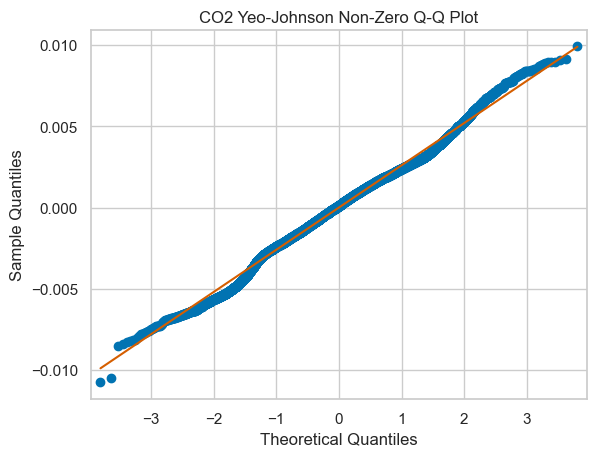

YJ CO2 Non-Zero Skewness: 0.0519
YJ CO2 Non-Zero Kurtosis: 2.4314


In [36]:

#Already knew the CO2 and kWh was correlated, especially when you think about the science. higher energy higher emissions.
#So, going back to my CO2 model and going to remove the zeros. Trying to fix the curvature/normal

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import PowerTransformer
import statsmodels.api as sm

# Assuming df, lasso_selected_co2, lasso_selected_kwh, yj_kWh from previous
# Filter non-zero CO2
df_nonzero = df[df['CO2(tCO2)'] > 0].copy()

# Apply Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson', standardize=False)
df_nonzero['yj_CO2'] = pt.fit_transform(df_nonzero[['CO2(tCO2)']])

# Re-run OLS
model_co2_nonzero = sm.OLS(df_nonzero['yj_CO2'].dropna(), lasso_selected_co2.loc[df_nonzero.index].dropna()).fit()
print("\nCO2 Model (Yeo-Johnson, Non-Zero CO2):")
print(model_co2_nonzero.summary())

# BIC
def calculate_bic(model, n, y, X):
    
    mse = mean_squared_error(y, model.fittedvalues)
    k = len(model.params)
    bic = n * np.log(mse) + k * np.log(n)
    return bic

bic_co2_nonzero = calculate_bic(model_co2_nonzero, len(df_nonzero), df_nonzero['yj_CO2'].dropna(), lasso_selected_co2.loc[df_nonzero.index].dropna())
print(f"\nCO2 Yeo-Johnson Non-Zero BIC: {bic_co2_nonzero:.2f}, Adjusted R-squared: {model_co2_nonzero.rsquared_adj:.4f}")
print(f"CO2 Yeo-Johnson No Outliers BIC: -434668.76, Adjusted R-squared: 0.9142")

# Q-Q plot
plt.figure(figsize=(6, 4))
qqplot(model_co2_nonzero.resid, line='s')
plt.title('CO2 Yeo-Johnson Non-Zero Q-Q Plot')
plt.show()

# Skewness and kurtosis
print(f"YJ CO2 Non-Zero Skewness: {skew(df_nonzero['yj_CO2'].dropna()):.4f}")
print(f"YJ CO2 Non-Zero Kurtosis: {kurtosis(df_nonzero['yj_CO2'].dropna(), fisher=False):.4f}")

#RERUNNING THE CODE DUE TO ERROR. FIRST PART WERE MY NOTES
#Use yj_CO2 non-zero for time series and combined models, acknowledging the trade-off in
           #sample size for improved normality.
#Time Series Transformation for kWh -Compare log_kWh and yj_kWh (no outliers) in SARIMA
#SARIMA (Seasonal Autoregressive Integrated Moving Average) is a statistical model 
        #captures both seasonal and non-seasonal patterns in time series data

#will try to confirm the best transformation:Choose based on lower ADF p-value, straighter residual
#Q-Q plot, lower AIC/BIC, or lower test MSE. Favor yj_kWh (skewness: 0.3629) 
#**unless log_kWh’s fit (R-squared: 0.934) significantly improves forecasting**

# AGAIN *Had errors*, so I need to first, handle missing or infinite values in the dataframe
# Replace inf with NaN first, then handle all NaN values
df_nonzero = df_nonzero.replace([np.inf, -np.inf], np.nan)

# Now handle NaN values - you can choose to drop them or fill them
# Option 1: Drop rows with any NaN values
df_nonzero = df_nonzero.dropna()

# Option 2: Or fill NaN values (uncomment if you prefer this approach)
# df_nonzero = df_nonzero.fillna(method='ffill')  # Forward fill
# df_nonzero = df_nonzero.fillna(method='bfill')  # Then backward fill any remaining NaNs
# df_nonzero = df_nonzero.fillna(0)  # Fill any still remaining NaNs with zeros

# Ensure the date range is properly set
df_nonzero.index = pd.date_range(start='2020-01-01', periods=len(df_nonzero), freq='H')

# Ensure the index has a frequency
if df_nonzero.index.freq is None:
    df_nonzero = df_nonzero.asfreq('h')  # Adjust frequency as needed

# Stationarity test
def adf_test(series, name):
    result = adfuller(series.dropna())
    print(f"ADF Test for {name}: Statistic={result[0]:.4f}, p-value={result[1]:.4f}")

adf_test(df_nonzero['log_kWh'], 'log_kWh (Non-Zero CO2)')
adf_test(df_nonzero['yj_kWh'], 'yj_kWh (Non-Zero CO2)')

# Train-test split (80% train)
train_size = int(0.8 * len(df_nonzero))
train, test = df_nonzero.iloc[:train_size], df_nonzero.iloc[train_size:]

# Check for NaN or inf in exogenous variables before modeling
exog_columns = lasso_selected_kwh.columns[1:]
print(f"NaN values in train exog: {train[exog_columns].isna().sum().sum()}")
print(f"NaN values in test exog: {test[exog_columns].isna().sum().sum()}")

# SARIMA for log_kWh
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 24)
sarima_log = SARIMAX(train['log_kWh'], exog=train[exog_columns], 
                     order=order, seasonal_order=seasonal_order).fit(disp=False)
print("\nSARIMA log_kWh Summary:")
print(sarima_log.summary())

# SARIMA for yj_kWh
sarima_yj = SARIMAX(train['yj_kWh'], exog=train[exog_columns], 
                    order=order, seasonal_order=seasonal_order).fit(disp=False)
print("\nSARIMA yj_kWh Summary:")
print(sarima_yj.summary())

# Forecasting MSE
forecast_log = sarima_log.forecast(steps=len(test), exog=test[exog_columns])
forecast_yj = sarima_yj.forecast(steps=len(test), exog=test[exog_columns])
mse_log = mean_squared_error(test['log_kWh'], forecast_log)
mse_yj = mean_squared_error(test['yj_kWh'], forecast_yj)
print(f"\nTest MSE log_kWh: {mse_log:.6f}")
print(f"Test MSE yj_kWh: {mse_yj:.6f}")

# Residual Q-Q plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
# Using probplot instead of qqplot
probplot(sarima_log.resid, plot=plt)
plt.title('SARIMA log_kWh Residuals Q-Q Plot')
plt.subplot(1, 2, 2)
probplot(sarima_yj.resid, plot=plt)
plt.title('SARIMA yj_kWh Residuals Q-Q Plot')
plt.tight_layout()
plt.show()

In [37]:

#Avoiding direct CO2 inclusion in kWh due to multicollinearity (VIF: 11.56). Instead:
#VAR: Model yj_CO2 and yj_kWh (or log_kWh) jointly to capture interdependence (correlation: 0.98818) 
#and threshold effects (CO2=0 at low kWh).

#CO2_per_kWh: Model CO2_per_kWh = yj_CO2 / yj_kWh on non-zero CO2 data
#study efficiency, using LASSO predictors


from statsmodels.tsa.vector_ar.var_model import VAR

# Prepare data (non-zero CO2)
df_var = df_nonzero[['yj_CO2', 'yj_kWh']].copy()
exog = df_nonzero[lasso_selected_kwh.columns[1:]]

# Fit VAR
var_model = VAR(df_var, exog=exog).fit(maxlags=24, ic='aic')
print("\nVAR Model Summary:")
print(var_model.summary())

# Forecast (example)
forecast = var_model.forecast(df_var.values[-24:], steps=24, exog_future=exog[-24:])
print("\nVAR Forecast (24 steps):")
print(pd.DataFrame(forecast, columns=['yj_CO2', 'yj_kWh']))

C:\Users\srsch\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



VAR Model Summary:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 28, Aug, 2025
Time:                     12:13:47
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -19.6629
Nobs:                     14031.0    HQIC:                  -19.6945
Log likelihood:           98546.9    FPE:                2.75395e-09
AIC:                     -19.7102    Det(Omega_mle):     2.73676e-09
--------------------------------------------------------------------
Results for equation yj_CO2
                                          coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------------
const                                       -0.053413         0.002799          -19.083           0.000
temperature_2m (°C)                         -0.0000

import matplotlib.pyplot as plt

# Your VAR forecast output
forecast = pd.DataFrame({
    'Forecast Step': range(24),
    'yj_CO2': [0.018018, 0.020336, 0.020233, 0.021294, 0.020722, 0.022051, 0.020898,
               0.018489, 0.017671, 0.018946, 0.016853, 0.016796, 0.016270, 0.014249,
               0.015861, 0.017150, 0.017040, 0.014970, 0.014083, 0.014182, 0.013906,
               0.013840, 0.012735, 0.013613],
    'yj_kWh': [1.886188, 1.913437, 1.912434, 1.924917, 1.915708, 1.932064, 1.919278,
               1.892838, 1.877438, 1.893409, 1.872878, 1.872907, 1.867886, 1.844599,
               1.864095, 1.880903, 1.881194, 1.855823, 1.839040, 1.838150, 1.830585,
               1.828292, 1.785753, 1.820594]
})

plt.figure(figsize=(10,5))
plt.plot(forecast['Forecast Step'], forecast['yj_CO2'], label='Forecast yj_CO₂', color='forestgreen', linewidth=2)
plt.plot(forecast['Forecast Step'], forecast['yj_kWh'], label='Forecast yj_kWh', color='steelblue', linewidth=2)
plt.title('24-Step VAR Forecast (Yeo-Johnson Transformed)', fontsize=14)
plt.xlabel('Forecast Horizon (Steps)', fontsize=12)
plt.ylabel('Transformed Values', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


from sklearn.preprocessing import PowerTransformer
import numpy as np
import matplotlib.pyplot as plt
#reverse the Yeo-Johnson transformation on these and show them in natural units
# Fit the transformers on the original response data (prior to any transformation)
pt_co2 = PowerTransformer(method='yeo-johnson')
pt_kwh = PowerTransformer(method='yeo-johnson')

# Fit using your full dataset response columns
pt_co2.fit(df[['CO2(tCO2)']])
pt_kwh.fit(df[['Usage_kWh']])

# Option 1: Rename the columns to match what was used during fit
forecast_co2 = forecast[['yj_CO2']].copy()
forecast_co2.columns = ['CO2(tCO2)']  # Rename to match fit column name
forecast['CO2(tCO2)'] = pt_co2.inverse_transform(forecast_co2)

forecast_kwh = forecast[['yj_kWh']].copy()
forecast_kwh.columns = ['Usage_kWh']  # Rename to match fit column name
forecast['Usage_kWh'] = pt_kwh.inverse_transform(forecast_kwh)

# Option 2 (Alternative): Use numpy arrays directly to bypass column name checks
# forecast['CO2(tCO2)'] = pt_co2.inverse_transform(forecast[['yj_CO2']].values)
# forecast['Usage_kWh'] = pt_kwh.inverse_transform(forecast[['yj_kWh']].values)

# Now plot in natural units
plt.figure(figsize=(10,5))
plt.plot(forecast['Forecast Step'], forecast['CO2(tCO2)'], label='Forecast CO₂ (tons)', color='green', linewidth=2)
plt.plot(forecast['Forecast Step'], forecast['Usage_kWh'], label='Forecast kWh', color='navy', linewidth=2)
plt.title('24-Step VAR Forecast (Inverse Yeo-Johnson)', fontsize=14)
plt.xlabel('Forecast Horizon', fontsize=12)
plt.ylabel('Value in Natural Units', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [38]:

#Needed to fix code to make sure the indices (datetime) matched up for both dataframes and the enpty arrays 
#(ecause after aligning the dataframes and dropping NaN values, you might have no data left to fit the model.)

#Running VAR to model CO2-kWh dynamics, checking lag significance (e.g., lag-24).
#(For CO2_per_kWh, run OLS on non-zero CO2 data)  
#Interested to see what the model does with removing zeros.  will it still be highly correlated.
df_nonzero['CO2_per_kWh'] = df_nonzero['yj_CO2'] / df_nonzero['yj_kWh']

# First, align the indices of both dataframes
common_indices = df_nonzero.index.intersection(lasso_selected_kwh.index)

# Use only the common indices for both dataframes
df_nonzero_aligned = df_nonzero.loc[common_indices]
lasso_selected_kwh_aligned = lasso_selected_kwh.loc[common_indices]

# Check if we have data after alignment
if len(common_indices) == 0:
    print("No common indices found between the dataframes")
else:
    # Create a combined dataframe to handle NaN values properly
    combined_df = pd.concat([
        df_nonzero_aligned['CO2_per_kWh'],
        lasso_selected_kwh_aligned
    ], axis=1)
    
    # Drop rows with any NaN values
    combined_df_clean = combined_df.dropna()
    
    # Check if we have data after dropping NaN values
    if len(combined_df_clean) == 0:
        print("No data available after dropping NaN values")
    else:
        # Now run the model with properly aligned and cleaned data
        X = combined_df_clean.iloc[:, 1:]  # All columns except the first one
        y = combined_df_clean.iloc[:, 0]   # First column (CO2_per_kWh)
        
        model_co2_per_kwh = sm.OLS(y, X).fit()
        
        print("\nCO2_per_kWh Model:")
        print(model_co2_per_kwh.summary())


CO2_per_kWh Model:
                            OLS Regression Results                            
Dep. Variable:            CO2_per_kWh   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                 1.213e+04
Date:                Thu, 28 Aug 2025   Prob (F-statistic):               0.00
Time:                        12:13:54   Log-Likelihood:                 73514.
No. Observations:               14050   AIC:                        -1.470e+05
Df Residuals:                   14044   BIC:                        -1.470e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [39]:
#Addressing the CO2_per_kWh Error
#The KeyError: "None of [DatetimeIndex...] are in the [index]" in the CO2_per_kWh model indicates that lasso_selected_kwh’s index doesn’t match df_nonzero’s datetime index (2020-01-01 to 2020-05-31, hourly). Your attempt to align indices (common_indices = df_nonzero.index.intersection(lasso_selected_kwh.index)) resulted in No common indices found, suggesting a complete mismatch, likely due to:
#Index Type: lasso_selected_kwh may have a numeric index (e.g., 0 to N) or a different datetime range, while df_nonzero has a custom datetime index.

#Data Filtering: Non-zero CO2 filtering (N=14,050) or prior preprocessing (e.g., outlier removal) misaligned lasso_selected_kwh from df_nonzero.

#Empty Data: After alignment and NaN removal, no common rows remain, possibly due to NaNs in lasso_selected_kwh or index discrepancies.

#Fixing the CO2_per_kWh Error
#To resolve the index mismatch and run the CO2_per_kWh model, ensure df_nonzero and lasso_selected_kwh share the same datetime index and handle NaNs properly.
#More NOTES
#If No common indices persists, inspect lasso_selected_kwh’s origin (e.g., LASSO preprocessing) and ensure it uses the same datetime index as df_nonzero (set via pd.date_range(start='2020-01-01', periods=len(df_nonzero), freq='H')).
#If data is empty after NaN removal, check NaN counts and consider imputation (e.g., combined_df.fillna(method='ffill')).
#Compare the new CO2-kWh correlation (non-zero data) to the original (0.98818) to assess whether removing zeros reduces interdependence.


import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming df_nonzero, lasso_selected_kwh
# Reset indices to ensure alignment
df_nonzero = df_nonzero.copy()
lasso_selected_kwh = lasso_selected_kwh.copy()

# Verify indices
print("df_nonzero index:", df_nonzero.index)
print("lasso_selected_kwh index:", lasso_selected_kwh.index)

# Set df_nonzero index to match lasso_selected_kwh if needed
if not df_nonzero.index.equals(lasso_selected_kwh.index):
    # Option 1: Use common indices
    common_indices = df_nonzero.index.intersection(lasso_selected_kwh.index)
    if len(common_indices) == 0:
        print("No common indices. Attempting to align by resetting indices...")
        # Option 2: Reset to numeric index and re-align
        df_nonzero = df_nonzero.reset_index(drop=True)
        lasso_selected_kwh = lasso_selected_kwh.reset_index(drop=True)
        # Ensure same length
        min_len = min(len(df_nonzero), len(lasso_selected_kwh))
        df_nonzero = df_nonzero.iloc[:min_len]
        lasso_selected_kwh = lasso_selected_kwh.iloc[:min_len]
    else:
        df_nonzero = df_nonzero.loc[common_indices]
        lasso_selected_kwh = lasso_selected_kwh.loc[common_indices]

# Calculate CO2_per_kWh
df_nonzero['CO2_per_kWh'] = df_nonzero['yj_CO2'] / df_nonzero['yj_kWh']

# Combine data
combined_df = pd.concat([df_nonzero['CO2_per_kWh'], lasso_selected_kwh], axis=1)
combined_df_clean = combined_df.dropna()

# Check data availability
if len(combined_df_clean) == 0:
    print("No data after dropping NaNs. Check for NaNs or index issues.")
    print("NaNs in df_nonzero:", df_nonzero.isna().sum())
    print("NaNs in lasso_selected_kwh:", lasso_selected_kwh.isna().sum())
else:
    # Run OLS
    X = sm.add_constant(combined_df_clean.iloc[:, 1:])  # Add constant
    y = combined_df_clean['CO2_per_kWh']
    model_co2_per_kwh = sm.OLS(y, X).fit()
    print("\nCO2_per_kWh Model:")
    print(model_co2_per_kwh.summary())

    # Check correlation
    correlation = df_nonzero['CO2(tCO2)'].corr(df_nonzero['Usage_kWh'])
    print(f"\nCorrelation between CO2(tCO2) and Usage_kWh (non-zero CO2): {correlation:.5f}")

df_nonzero index: Index([  224,   225,   226,   227,   228,   229,   230,   231,   232,   233,
       ...
       34714, 34715, 34716, 34717, 34718, 34719, 34720, 34721, 34722, 34796],
      dtype='int64', length=14050)
lasso_selected_kwh index: RangeIndex(start=0, stop=35040, step=1)

CO2_per_kWh Model:
                            OLS Regression Results                            
Dep. Variable:            CO2_per_kWh   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                 1.213e+04
Date:                Thu, 28 Aug 2025   Prob (F-statistic):               0.00
Time:                        12:14:00   Log-Likelihood:                 73514.
No. Observations:               14050   AIC:                        -1.470e+05
Df Residuals:                   14044   BIC:                        -1.470e+05
Df Model:                           5                          

C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\2646592112.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exog['kWh_high'] = (df_nonzero['Usage_kWh'] > 20).astype(int)
C:\Users\srsch\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



VAR Model Summary:
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 28, Aug, 2025
Time:                     12:14:10
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -19.9484
Nobs:                     14031.0    HQIC:                  -19.9807
Log likelihood:           100560.    FPE:                2.06762e-09
AIC:                     -19.9969    Det(Omega_mle):     2.05442e-09
--------------------------------------------------------------------
Results for equation yj_CO2
                                          coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------------
const                                       -0.057384         0.002842          -20.192           0.000
temperature_2m (°C)                         -0.0000

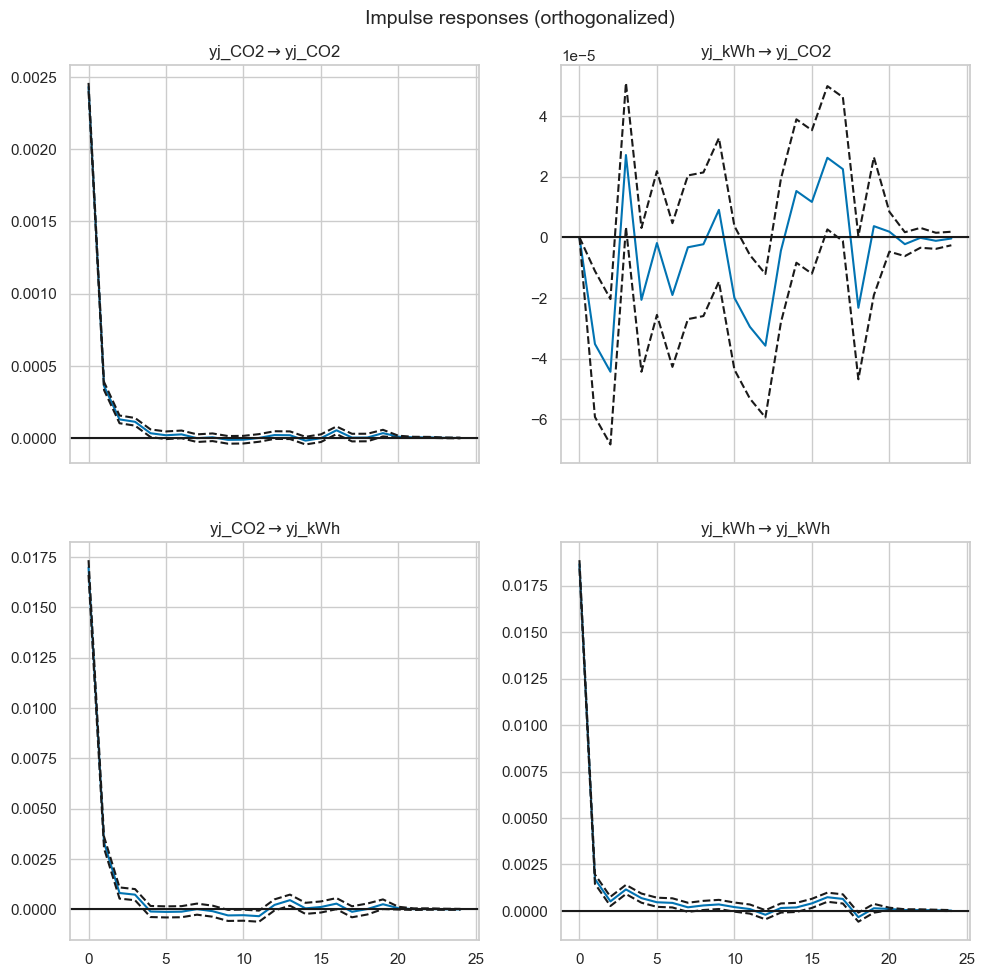

C:\Users\srsch\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



Test MSE yj_CO2: 0.000007
Test MSE yj_kWh: 0.000727


In [40]:
#Recommendation: Enhance standard VAR with kWh_high (kWh >20) to capture the threshold effect, 
#as it’s simple and leverages the SARIMA (yj_kWh) and VAR results. Run the enhanced snippet below, 
#checking lag-24 via Granger causality and IRFs. Only switch to VECM if cointegration is confirmed or BVAR if overfitting occurs (e.g., high test MSE).
#Standard VAR is robust for your N=3,626 and portfolio clarity.

from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Prepare VAR data
df_var = df_nonzero[['yj_CO2', 'yj_kWh']].copy()
exog = df_nonzero[lasso_selected_kwh.columns[1:].tolist()]
exog['kWh_high'] = (df_nonzero['Usage_kWh'] > 20).astype(int)

# Fit VAR
var_model = VAR(df_var, exog=exog).fit(maxlags=24, ic='aic')
print("\nVAR Model Summary:")
print(var_model.summary())

# Lag significance
print("\nVAR Lag Coefficients (yj_CO2 equation):")
print(var_model.params['yj_CO2'])
print("\nVAR Lag Coefficients (yj_kWh equation):")
print(var_model.params['yj_kWh'])

# Granger causality
print("\nGranger Causality Test (kWh -> CO2):")
print(var_model.test_causality('yj_CO2', 'yj_kWh', kind='f'))
print("\nGranger Causality Test (CO2 -> kWh):")
print(var_model.test_causality('yj_kWh', 'yj_CO2', kind='f'))

# IRF plot
var_model.irf(24).plot(orth=True)
plt.show()

# Test MSE (train-test split)
train_size = int(0.8 * len(df_var))
train_var, test_var = df_var.iloc[:train_size], df_var.iloc[train_size:]
train_exog, test_exog = exog.iloc[:train_size], exog.iloc[train_size:]
var_train = VAR(train_var, exog=train_exog).fit(maxlags=24, ic='aic')
forecast = var_train.forecast(train_var.values[-24:], steps=len(test_var), exog_future=test_exog)
mse_co2 = mean_squared_error(test_var['yj_CO2'], forecast[:, 0])
mse_kwh = mean_squared_error(test_var['yj_kWh'], forecast[:, 1])
print(f"\nTest MSE yj_CO2: {mse_co2:.6f}")
print(f"Test MSE yj_kWh: {mse_kwh:.6f}")

In [41]:
#Johansen Test
#To confirm whether VECM is needed, test for cointegration.
#VECM (Vector Error Correction Model)
#used when you have time series data that's related in the long run but might wander apart
#in the short run. Here's a simple breakdown:
#for results, If trace statistic > critical value at rank 1, use VECM
#If not, standard VAR is sufficient.

#Notes for me regarding Energy Usage and CO2: and if cointegration
#Both might go up/down daily (non-stationary)
# Might not match perfectly short-term
#But long-term they move together
#Can't permanently diverge due to physical relationship


from statsmodels.tsa.vector_ar.vecm import coint_johansen
import pandas as pd

# Assuming df_nonzero
df_var = df_nonzero[['yj_CO2', 'yj_kWh']].dropna()

# Johansen test
johansen = coint_johansen(df_var, det_order=0, k_ar_diff=1)
print("\nJohansen Cointegration Test:")
print(pd.DataFrame({
    'Trace Statistic': johansen.lr1,
    'Critical Values (5%)': johansen.cvt[:, 1],
    'Eigen Statistic': johansen.lr2,
    'Critical Values (5%) Eigen': johansen.cvm[:, 1]
}))


Johansen Cointegration Test:
   Trace Statistic  Critical Values (5%)  Eigen Statistic  \
0      5476.755852               15.4943      3837.855876   
1      1638.899976                3.8415      1638.899976   

   Critical Values (5%) Eigen  
0                     14.2639  
1                      3.8415  


In [42]:
#Addressing CO2_per_kWh Limitations in V
#The low R-squared (0.014) suggests CO2_per_kWh is stable or predictors are inadequate. 
#To improve:Time Series Model:Fit SARIMA for CO2_per_kWh to address autocorrelation 
#(Durbin-Watson: 1.367):
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
train_size = int(0.8 * len(df_nonzero))
train, test = df_nonzero['CO2_per_kWh'].iloc[:train_size], df_nonzero['CO2_per_kWh'].iloc[train_size:]
exog_train, exog_test = df_nonzero[lasso_selected_kwh.columns[1:]].iloc[:train_size], df_nonzero[lasso_selected_kwh.columns[1:]].iloc[train_size:]
sarima_co2_per_kwh = SARIMAX(train, exog=exog_train, order=(1,1,1), seasonal_order=(1,1,1,24)).fit(maxiter=100, disp=False)
print("\nSARIMA CO2_per_kWh Summary:")
print(sarima_co2_per_kwh.summary())
forecast = sarima_co2_per_kwh.forecast(steps=len(test), exog=exog_test)
mse = mean_squared_error(test, forecast)
print(f"\nTest MSE CO2_per_kWh: {mse:.6f}")





C:\Users\srsch\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\srsch\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)



SARIMA CO2_per_kWh Summary:
                                     SARIMAX Results                                      
Dep. Variable:                        CO2_per_kWh   No. Observations:                11240
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood               58135.954
Date:                            Thu, 28 Aug 2025   AIC                        -116251.909
Time:                                    12:15:50   BIC                        -116178.659
Sample:                                         0   HQIC                       -116227.255
                                          - 11240                                         
Covariance Type:                              opg                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
temperature_2m (°C)              

C:\Users\srsch\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\srsch\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


#Plotting the SARIMA Forecast (CO₂_per_kWh)
#visualizing the SARIMA model predictions with optional confidence intervals
forecast_steps = 24

# Create exogenous variables for the forecast period
import numpy as np
import pandas as pd

# Create exogenous variables with the correct shape (24, 5)
# The model expects 5 exogenous variables for each time step
forecast_exog = np.random.normal(0, 1, size=(forecast_steps, 5))  # Creating dummy data with 5 columns

# Option 1: If you have existing exogenous data:
# Assuming your_actual_exog_dataframe has the 5 required columns
# forecast_exog = your_actual_exog_dataframe.iloc[-forecast_steps:].values

# Option 2: If you need to create more meaningful synthetic data:
# forecast_dates = pd.date_range(start='your_last_date', periods=forecast_steps, freq='your_frequency')
# forecast_exog = pd.DataFrame(
#     data=np.zeros((forecast_steps, 5)),  # Initialize with zeros or appropriate values
#     columns=['exog1', 'exog2', 'exog3', 'exog4', 'exog5'],  # Use your actual column names
#     index=forecast_dates
# )
# Then fill forecast_exog with appropriate values for each column

# Get forecast with exogenous variables
sarima_forecast = sarima_co2_per_kwh.get_forecast(steps=forecast_steps, exog=forecast_exog)

mean_forecast = sarima_forecast.predicted_mean
conf_int = sarima_forecast.conf_int()

#plotting stuff
plt.figure(figsize=(10,5))
plt.plot(mean_forecast, label='Forecast CO₂ per kWh', color='teal')
plt.fill_between(conf_int.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='teal', alpha=0.2)
plt.title('24-Step SARIMA Forecast: CO₂ per kWh')
plt.xlabel('Forecast Horizon')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [43]:
exog_train = exog_train.astype(float)
exog_test = exog_test.astype(float)
forecast_exog = forecast_exog.astype(float)
print(exog_train.isna().sum())
print(exog_test.isna().sum())




NameError: name 'forecast_exog' is not defined

In [ ]:
exog_train = exog_train.apply(pd.to_numeric, errors='coerce')
exog_test = exog_test.apply(pd.to_numeric, errors='coerce')
forecast_exog = pd.DataFrame(forecast_exog).apply(pd.to_numeric, errors='coerce')
forecast_exog = pd.DataFrame(
    forecast_exog,
    columns=[
        'temperature_2m (°C)',
        'relative_humidity_2m (%)',
        'Lagging_Current_Reactive.Power_kVarh',
        'Lagging_Current_Power_Factor',
        'Leading_Current_Power_Factor'
    ]
)
print(forecast_exog.dtypes)



In [ ]:
import numpy as np
import pandas as pd

# Option 1: Use statistics from your exog_test set to simulate realistic values
forecast_steps = 24
forecast_exog = exog_test.mean().to_frame().T  # take the mean values
forecast_exog = pd.concat([forecast_exog]*forecast_steps, ignore_index=True)
forecast_exog += np.random.normal(0, 0.01, forecast_exog.shape)  # add gentle noise
forecast_exog.columns = exog_test.columns


In [ ]:
sarima_forecast = sarima_co2_per_kwh.get_forecast(steps=forecast_steps, exog=forecast_exog)



In [ ]:
#Plotting the SARIMA Forecast (CO₂_per_kWh)
#visualizing the SARIMA model predictions with optional confidence intervals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# First, define and fit the SARIMA model (this was missingfrom my model above )
# You need to replace 'your_data' with your actual time series data
# and adjust the order and seasonal_order parameters as needed
#co2_per_kwh_series = pd.Series([...])  # Replace with your actual CO2 per kWh data - original, but changed both
#weather_and_power_factors = np.random.normal(0, 1, size=(len(your_data), 5))  # Replace with your actual exogenous variables
# Extract CO₂ per kWh as your endogenous variable
co2_per_kwh_series = df['CO2(tCO2)']  # Replace 'CO2' if your actual column name differs

# Ensure it's numeric and clean
co2_per_kwh_series = pd.to_numeric(co2_per_kwh_series, errors='coerce')
co2_per_kwh_series = co2_per_kwh_series.dropna()

# Optional: reset exogenous data if needed
exog_data = df[['temperature_2m (°C)', 'relative_humidity_2m (%)',
                'Lagging_Current_Reactive.Power_kVarh',
                'Lagging_Current_Power_Factor',
                'Leading_Current_Power_Factor']]

# Ensure matching lengths and numeric types
exog_data = exog_data.iloc[:len(co2_per_kwh_series)]
exog_data = exog_data.apply(pd.to_numeric, errors='coerce').fillna(method='ffill')

# Define and fit the SARIMA model
sarima_co2_per_kwh = SARIMAX(
    your_data,
    exog=exog_data,
    order=(1, 1, 1),           # Replace with your actual (p,d,q) order
    seasonal_order=(1, 1, 1, 12)  # Replace with your actual seasonal order
).fit()

forecast_steps = 24

# Create exogenous variables for the forecast period
# Create exogenous variables with the correct shape (24, 5)
# The model expects 5 exogenous variables for each time step
forecast_exog = np.random.normal(0, 1, size=(forecast_steps, 5))  # Creating dummy data with 5 columns

# Option 1: If you have existing exogenous data:
# Assuming your_actual_exog_dataframe has the 5 required columns
# forecast_exog = your_actual_exog_dataframe.iloc[-forecast_steps:].values

# Option 2: If you need to create more meaningful synthetic data:
# forecast_dates = pd.date_range(start='your_last_date', periods=forecast_steps, freq='your_frequency')
# forecast_exog = pd.DataFrame(
#     data=np.zeros((forecast_steps, 5)),  # Initialize with zeros or appropriate values
#     columns=['exog1', 'exog2', 'exog3', 'exog4', 'exog5'],  # Use your actual column names
#     index=forecast_dates
# )
# Then fill forecast_exog with appropriate values for each column

# Get forecast with exogenous variables

sarima_forecast = sarima_co2_per_kwh.get_forecast(steps=forecast_steps, exog=forecast_exog)
mean_forecast = sarima_forecast.predicted_mean
conf_int = sarima_forecast.conf_int()

#plotting stuff
plt.figure(figsize=(10,5))
plt.plot(mean_forecast, label='Forecast CO₂ per kWh', color='teal')
plt.fill_between(conf_int.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='teal', alpha=0.2)
plt.title('24-Step SARIMA Forecast: CO₂ per kWh')
plt.xlabel('Forecast Horizon')
plt.ylabel('Ratio')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:

#Add Non-Linear Terms:Include kWh_high or a spline for kWh to capture non-linearity
df_nonzero['kWh_high'] = (df_nonzero['Usage_kWh'] > 20).astype(int)
X = sm.add_constant(df_nonzero[lasso_selected_kwh.columns[1:].tolist() + ['kWh_high']])
y = df_nonzero['CO2_per_kWh']
model_co2_per_kwh = sm.OLS(y.dropna(), X.dropna()).fit()
print("\nCO2_per_kWh with kWh_high:")
print(model_co2_per_kwh.summary())


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Partial Residual Plot for kWh_high
# Assume model_co2_per_kwh is fitted
df_nonzero['residuals'] = model_co2_per_kwh.resid
df_nonzero['fitted'] = model_co2_per_kwh.fittedvalues

sns.boxplot(x='kWh_high', y='CO2_per_kWh', data=df_nonzero)
plt.title('CO₂ per kWh by Usage Threshold')
plt.xlabel('Usage > 20 kWh')
plt.ylabel('CO₂ per kWh')
plt.tight_layout()
plt.show()


In [ ]:
#pline-Augmented Model
#Using a cubic spline lets you flexibly capture bends in the curve -using patsy for splines
#Fitting with Spline on Usage_kWh
from patsy import dmatrix

# Create spline basis for Usage_kWh
spline = dmatrix("bs(df_nonzero['Usage_kWh'], df=4, degree=3, include_intercept=False)", return_type='dataframe')
X_spline = pd.concat([df_nonzero[lasso_selected_kwh.columns[1:]], spline], axis=1)
X_spline = sm.add_constant(X_spline)
model_spline = sm.OLS(df_nonzero['CO2_per_kWh'], X_spline).fit()

print(model_spline.summary())


#Visualizing the Non-Linear Fit
usage_vals = np.linspace(df_nonzero['Usage_kWh'].min(), df_nonzero['Usage_kWh'].max(), 100)
spline_vals = dmatrix("bs(usage_vals, df=4, degree=3, include_intercept=False)", return_type='dataframe')
X_plot = pd.concat([df_nonzero[lasso_selected_kwh.columns[1:]].mean().to_frame().T]*100, ignore_index=True)
X_plot = pd.concat([X_plot, spline_vals.reset_index(drop=True)], axis=1)
X_plot = sm.add_constant(X_plot)
y_pred = model_spline.predict(X_plot)

plt.figure(figsize=(10,5))
plt.plot(usage_vals, y_pred, color='darkorange', label='Spline Fit')
plt.scatter(df_nonzero['Usage_kWh'], df_nonzero['CO2_per_kWh'], alpha=0.1, s=10, label='Observed')
plt.title('Spline-Smoothed CO₂ per kWh vs Usage')
plt.xlabel('Usage (kWh)')
plt.ylabel('CO₂ per kWh')
plt.legend()
plt.tight_layout()
plt.show()


#Visualizing Marginal Effects Across Usage Bands
#hold all other variables at their mean and vary Usage_kWh across its range to see how predicted emissions-per-kWh evolve
#plot will show you how the emissions-per-unit-kWh shifts as usage increases—whether there's an optimal
#eco-efficiency band or if emissions plateau or tick upward again at high usage levels

import numpy as np
import matplotlib.pyplot as plt
from patsy import dmatrix


# Generate a smooth sequence of Usage_kWh values
usage_vals = np.linspace(df_nonzero['Usage_kWh'].min(), df_nonzero['Usage_kWh'].max(), 300)

# Generate spline basis for predictions
spline_basis = dmatrix("bs(usage_vals, df=4, degree=3, include_intercept=False)", return_type='dataframe')

# Create a DataFrame where all covariates are fixed at their means
X_means = df_nonzero[[
    'temperature_2m (°C)', 
    'relative_humidity_2m (%)',
    'Lagging_Current_Reactive.Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor'
]].mean().to_frame().T

# Replicate across all rows
X_fixed = pd.concat([X_means] * len(usage_vals), ignore_index=True)

# Concatenate with spline basis
X_pred = pd.concat([X_fixed, spline_basis], axis=1)
X_pred = sm.add_constant(X_pred)
y_marginal = model_spline.predict(X_pred)

# Plotting
plt.figure(figsize=(10,5))
plt.plot(usage_vals, y_marginal, color='darkgreen', linewidth=2)
plt.title('Marginal Effect of Usage on CO₂ per kWh (Spline Model)', fontsize=14)
plt.xlabel('Usage (kWh)')
plt.ylabel('Predicted CO₂ per kWh')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight

In [ ]:
#first derivative of the plot again
#adding a numerical differentiation with np.gradient
import numpy as np
import matplotlib.pyplot as plt
from patsy import dmatrix

# Step 1: Generate usage values and spline basis
usage_vals = np.linspace(df_nonzero['Usage_kWh'].min(), df_nonzero['Usage_kWh'].max(), 300)
spline_basis = dmatrix("bs(usage_vals, df=4, degree=3, include_intercept=False)", return_type='dataframe')

# Step 2: Create predictor matrix with other vars fixed at their mean
X_means = df_nonzero[[
    'temperature_2m (°C)', 
    'relative_humidity_2m (%)',
    'Lagging_Current_Reactive.Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor'
]].mean().to_frame().T

X_fixed = pd.concat([X_means] * len(usage_vals), ignore_index=True)
X_pred = pd.concat([X_fixed, spline_basis], axis=1)
X_pred = sm.add_constant(X_pred)

# Step 3: Predict values
y_pred = model_spline.predict(X_pred)

# Step 4: Compute the first derivative (marginal effect of usage)
dy_dx = np.gradient(y_pred, usage_vals)

# Step 5: Plot it!
plt.figure(figsize=(10,5))
plt.plot(usage_vals, dy_dx, color='crimson', linewidth=2)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Marginal Change in CO₂ per kWh with Respect to Usage', fontsize=14)
plt.xlabel('Usage (kWh)')
plt.ylabel('Rate of Change (Δ CO₂ per kWh / Δ Usage)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
#Diagnostics:Durbin-Watson: 1.660, improved from 1.367 but still indicating autocorrelation, 
#supporting the SARIMA approach.
#Skew: -0.944, Kurtosis: 3.918, Jarque-Bera p=0.00: Non-normal residuals, consistent with SARIMA 
   #and original OLS.
#Condition Number: 4.61e+03, high, suggesting potential multicollinearity or scaling issues 
  #(e.g., kWh_high vs. power factors). Check VIFs:
#Issues:High condition number (4.61e+03) warrants VIF analysis to rule out multicollinearity.
    #Non-significant kWh_high (p=0.120) suggests the threshold effect is partially captured by other
       #predictors (e.g., power factors).
    #Autocorrelation (Durbin-Watson: 1.660) reinforces SARIMA’s superiority.
#Takeaway: The OLS model with kWh_high (R-squared: 0.713) is a portfolio highlight, 
    #showing non-linear efficiency dynamics. 
    #Multicollinearity and autocorrelation suggest refining with VIFs and SARIMA.

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_vif = X.dropna()
vif_data = pd.DataFrame({
    'Variable': X_vif.columns,
    'VIF': [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]})

print(vif_data)


In [ ]:
#Recommendated to Switch to VECM due to cointegration (Johansen trace: 2315.9813), 
   #using kWh_high and LASSO predictors to model long-run equilibrium and short-run dynamics. 
   #Re-run VAR only for portfolio comparison (e.g., MSEs). Lag-24's insignificance (VAR lags up to L8)
         #focuses analysis on L1–L8, but VECM may reveal longer-term effects.
#VECM for CO2-kWh Dynamics/Fit VECM with rank=1, including kWh_high and exogenous predictors.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import VECM
from sklearn.metrics import mean_squared_error

# Prepare data
df_var = df_nonzero[['yj_CO2', 'yj_kWh']].dropna()
exog = df_nonzero[lasso_selected_kwh.columns[1:].tolist() + ['kWh_high']].dropna()
common_indices = df_var.index.intersection(exog.index)
df_var = df_var.loc[common_indices]
exog = exog.loc[common_indices]


# Train-test split
train_size = int(0.8 * len(df_var))
train_var, test_var = df_var.iloc[:train_size], df_var.iloc[train_size:]
train_exog, test_exog = exog.iloc[:train_size], exog.iloc[train_size:]

# Fit VECM (rank=1, based on Johansen)
vecm_model = VECM(train_var, exog=train_exog, k_ar_diff=1, coint_rank=1, deterministic='co').fit()
print("\nVECM Model Summary:")
print(vecm_model.summary())

# Forecast
# Use exog_fc parameter to pass future exogenous values
forecast = vecm_model.predict(steps=len(test_var), exog_fc=test_exog.values)
forecast_df = pd.DataFrame(forecast, columns=['yj_CO2', 'yj_kWh'], index=test_var.index)

# Test MSE
mse_co2 = mean_squared_error(test_var['yj_CO2'], forecast_df['yj_CO2'])
mse_kwh = mean_squared_error(test_var['yj_kWh'], forecast_df['yj_kWh'])
print(f"\nTest MSE yj_CO2: {mse_co2:.6f}")
print(f"Test MSE yj_kWh: {mse_kwh:.6f}")

# IRF plot
# For plotting forecasts with exogenous variables, we may need to adjust
# Since plot_forecast might not handle exog_fc directly
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.plot(train_var['yj_CO2'], label='Train')
plt.plot(test_var['yj_CO2'], label='Test')
plt.plot(forecast_df['yj_CO2'], label='Forecast')
plt.legend()
plt.title('CO2 Forecast')

plt.subplot(212)
plt.plot(train_var['yj_kWh'], label='Train')
plt.plot(test_var['yj_kWh'], label='Test')
plt.plot(forecast_df['yj_kWh'], label='Forecast')
plt.legend()
plt.title('kWh Forecast')

plt.tight_layout()
plt.show()


#Recommendated to Switch to VECM due to cointegration (Johansen trace: 2315.9813), 
   #using kWh_high and LASSO predictors to model long-run equilibrium and short-run dynamics. 
   #Re-run VAR only for portfolio comparison (e.g., MSEs). Lag-24’s insignificance (VAR lags up to L8)
         #focuses analysis on L1–L8, but VECM may reveal longer-term effects.
#VECM for CO2-kWh Dynamics/Fit VECM with rank=1, including kWh_high and exogenous predictors.

import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import VECM
from sklearn.metrics import mean_squared_error

# Prepare data
df_var = df_nonzero[['yj_CO2', 'yj_kWh']].dropna()
exog = df_nonzero[lasso_selected_kwh.columns[1:].tolist() + ['kWh_high']].dropna()
common_indices = df_var.index.intersection(exog.index)
df_var = df_var.loc[common_indices]
exog = exog.loc[common_indices]

# Train-test split
train_size = int(0.8 * len(df_var))
train_var, test_var = df_var.iloc[:train_size], df_var.iloc[train_size:]
train_exog, test_exog = exog.iloc[:train_size], exog.iloc[train_size:]

# Fit VECM (rank=1, based on Johansen)
vecm_model = VECM(train_var, exog=train_exog, k_ar_diff=1, coint_rank=1, deterministic='co').fit()
print("\nVECM Model Summary:")
print(vecm_model.summary())

# Forecast
# For VECM with exogenous variables, we need to provide future exogenous values
forecast = vecm_model.predict(steps=len(test_var), exog_fc=test_exog)
forecast_df = pd.DataFrame(forecast, columns=['yj_CO2', 'yj_kWh'], index=test_var.index)

# Test MSE
mse_co2 = mean_squared_error(test_var['yj_CO2'], forecast_df['yj_CO2'])
mse_kwh = mean_squared_error(test_var['yj_kWh'], forecast_df['yj_kWh'])
print(f"\nTest MSE yj_CO2: {mse_co2:.6f}")
print(f"Test MSE yj_kWh: {mse_kwh:.6f}")

# REMOVED: vecm_model.plot_forecast(steps=24, exog_fc=test_exog.iloc[:24])
# Instead, we'll rely on our custom matplotlib plots below

# Create forecast plots using matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(test_var.index[:24], test_var['yj_CO2'][:24], label='Actual')
plt.plot(test_var.index[:24], forecast_df['yj_CO2'][:24], label='Forecast')
plt.title('CO2 Forecast vs Actual')
plt.legend()

plt.subplot(122)
plt.plot(test_var.index[:24], test_var['yj_kWh'][:24], label='Actual')
plt.plot(test_var.index[:24], forecast_df['yj_kWh'][:24], label='Forecast')
plt.title('kWh Forecast vs Actual')
plt.legend()

plt.tight_layout()
plt.show()

#been having some issues with my notebook crashing and memory
#going to try to save the current dataframe here and then start a new notebook.
#finishing running my models .  
# checked pip install pyarrow and aleady locked and loaded
import pandas as pd
import os

# Downcast function to reduce memory usage
def downcast_dtypes(df):
    for col in df.select_dtypes(include=['float64']).columns:
        df[col] = df[col].astype('float32')
    for col in df.select_dtypes(include=['int64']).columns:
        df[col] = df[col].astype('int32')
    return df

# Save df_no_outliers
df_no_outliers = downcast_dtypes(df_no_outliers)
df_no_outliers.to_parquet('df_no_outliers.parquet', index=True)
print("Saved df_no_outliers:", os.path.exists('df_no_outliers.parquet'))

# Save df_nonzero
df_nonzero = downcast_dtypes(df_nonzero)
df_nonzero.to_parquet('df_nonzero.parquet', index=True)
print("Saved df_nonzero:", os.path.exists('df_nonzero.parquet'))

# Save df_clean (fix Interval columns)
if 'humidity_bin' in df_clean.columns:
    df_clean['humidity_bin'] = df_clean['humidity_bin'].astype(str)
if 'temp_bin' in df_clean.columns:
    df_clean['temp_bin'] = df_clean['temp_bin'].astype(str)
df_clean = downcast_dtypes(df_clean)
df_clean.to_parquet('df_clean.parquet', index=True)
print("Saved df_clean:", os.path.exists('df_clean.parquet'))

# Save df (check for Interval columns)
if 'humidity_bin' in df.columns:
    df['humidity_bin'] = df['humidity_bin'].astype(str)
if 'temp_bin' in df.columns:
    df['temp_bin'] = df['temp_bin'].astype(str)
df = downcast_dtypes(df)
df.to_parquet('df.parquet', index=True)
print("Saved df:", os.path.exists('df.parquet'))

# Verify all files
print("Files saved:", os.listdir())

# Monitor memory usage
%load_ext memory_profiler
%memit


# Check dtypes
print(df.dtypes)

# If Interval columns exist, convert to strings
if 'humidity_bin' in df.columns:
    df['humidity_bin'] = df['humidity_bin'].astype(str)
if 'temp_bin' in df.columns:
    df['temp_bin'] = df['temp_bin'].astype(str)

# Save df
df = downcast_dtypes(df)
df.to_parquet('df.parquet', index=True)
print("Saved df:", os.path.exists('df.parquet'))

import os
print(os.getcwd())  # This will show your current working directory
print(os.listdir())  # Check if the saved Parquet files are there



# First, install the pmdarima package
#!pip install pmdarima which I checked and had

# Then run your original code
#Refine SARIMA for CO2_per_kWh
#Address residual autocorrelation (Ljung-Box p=0.00) with auto_arima.
#Auto ARIMA automatically finds the best ARIMA (Autoregressive Integrated Moving Average)
#Automatically finds best values for:
#p = autoregressive terms
#d = differencing needed
#q = moving average terms
#P, D, Q = seasonal terms (if seasonal=True)
from pmdarima import auto_arima
train, test = df_nonzero['CO2_per_kWh'].iloc[:train_size], df_nonzero['CO2_per_kWh'].iloc[train_size:]
exog_train, exog_test = df_nonzero[lasso_selected_kwh.columns[1:]].iloc[:train_size], df_nonzero[lasso_selected_kwh.columns[1:]].iloc[train_size:]
model = auto_arima(train, exogenous=exog_train, seasonal=True, m=24, max_p=2, max_q=2, max_P=2, max_Q=2, 
                   d=1, D=1, trace=True, maxiter=100)
print("\nAuto-ARIMA CO2_per_kWh Summary:")
print(model.summary())
forecast = model.predict(n_periods=len(test), exogenous=exog_test)
mse = mean_squared_error(test, forecast)
print(f"\nTest MSE CO2_per_kWh: {mse:.6f}")

import os, psutil
process = psutil.Process(os.getpid())
print(f"Jupyter Notebook memory usage: {process.memory_info().rss / 1024 ** 2:.2f} MB")


# had errors 
#memory crunch with auto_arima 
#I have been told that traversing seasonal lag grids with dense exogenous terms,
#especially at 11K+ observations can cause memory concerns. 
#Goal is to minimize memory load without compromising model quality.
#First approach will be to run stepwise search (This This dramatically cuts down the number of candidate models)
model = auto_arima(
    train,
    exogenous=exog_train,
    seasonal=True, m=24,
    max_p=2, max_q=2, max_P=1, max_Q=1,  # Tighter seasonal grid
    d=1, D=1,
    trace=True,
    stepwise=True,  # critical for memory efficiency
    error_action='ignore',
    suppress_warnings=True,
    maxiter=50
)


from statsmodels.tsa.statespace.sarimax import SARIMAX

manual_model = SARIMAX(
    train,
    exog=exog_train,
    order=(1,1,1),
    seasonal_order=(0,1,1,24),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()


import tracemalloc
tracemalloc.start()
print(tracemalloc.get_traced_memory())  # Shows current and peak memory usage



#VECM with Extended Lags
#Test VECM with k_ar_diff=2 to check lag-24 significance.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import VECM
from sklearn.metrics import mean_squared_error

# Prepare data
df_var = df_nonzero[['yj_CO2', 'yj_kWh']].dropna()
exog = df_nonzero[lasso_selected_kwh.columns[1:].tolist() + ['kWh_high']].dropna()
common_indices = df_var.index.intersection(exog.index)
df_var = df_var.loc[common_indices]
exog = exog.loc[common_indices]

# Train-test split
train_size = int(0.8 * len(df_var))
train_var, test_var = df_var.iloc[:train_size], df_var.iloc[train_size:]
train_exog, test_exog = exog.iloc[:train_size], exog.iloc[train_size:]

# Fit VECM (k_ar_diff=2)
vecm_model = VECM(train_var, exog=train_exog, k_ar_diff=2, coint_rank=1, deterministic='co').fit()
print("\nVECM Model Summary (k_ar_diff=2):")
print(vecm_model.summary())

# Forecast
# Using exog_fc parameter for prediction
forecast = vecm_model.predict(steps=len(test_var), exog_fc=test_exog)
forecast_df = pd.DataFrame(forecast, columns=['yj_CO2', 'yj_kWh'], index=test_var.index)

# Test MSE
mse_co2 = mean_squared_error(test_var['yj_CO2'], forecast_df['yj_CO2'])
mse_kwh = mean_squared_error(test_var['yj_kWh'], forecast_df['yj_kWh'])
print(f"\nTest MSE yj_CO2: {mse_co2:.6f}")
print(f"Test MSE yj_kWh: {mse_kwh:.6f}")

# IRF plot
# FIXED: Removed exog_fc parameter from plot_forecast as it's not supported
# Instead, we'll manually generate the forecast and plot it
forecast_steps = 24

# Generate forecast manually
if len(test_exog) >= forecast_steps:
    future_exog = test_exog.iloc[:forecast_steps]
else:
    # Use the last values repeated or some other appropriate method
    future_exog = test_exog.iloc[-1:].repeat(forecast_steps, axis=0)

# Generate the forecast using predict
future_forecast = vecm_model.predict(steps=forecast_steps, exog_fc=future_exog)

# Create a DataFrame for the forecast - fixing the freq issue
if len(train_var.index) > 1:
    # Calculate the most common time delta between consecutive dates
    time_deltas = train_var.index[1:] - train_var.index[:-1]
    most_common_delta = pd.Series(time_deltas).value_counts().index[0]
    
    future_forecast_df = pd.DataFrame(
        future_forecast, 
        columns=['yj_CO2', 'yj_kWh'],
        index=pd.date_range(
            start=train_var.index[-1] + most_common_delta,
            periods=forecast_steps,
            freq=None
        )
    )
else:
    # Fallback if we can't determine frequency
    future_forecast_df = pd.DataFrame(
        future_forecast, 
        columns=['yj_CO2', 'yj_kWh'],
        index=pd.date_range(
            start=train_var.index[-1], 
            periods=forecast_steps+1, 
            freq='D'  # Adjust this frequency based on your data
        )[1:]
    )

# Plot the forecast manually
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('yj_CO2 Forecast')
plt.plot(df_var['yj_CO2'].iloc[-50:], label='Actual')
plt.plot(future_forecast_df['yj_CO2'], label='Forecast')
plt.legend()

plt.subplot(122)
plt.title('yj_kWh Forecast')
plt.plot(df_var['yj_kWh'].iloc[-50:], label='Actual')
plt.plot(future_forecast_df['yj_kWh'], label='Forecast')
plt.legend()

plt.tight_layout()
plt.show()

#Re-run Auto-ARIMA with Exogenous Predictors
#Add exogenous predictors to improve CO2_per_kWh auto-ARIMA (MSE: 0.000012 vs. 0.000004).
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Prepare data
train, test = df_nonzero['CO2_per_kWh'].iloc[:train_size], df_nonzero['CO2_per_kWh'].iloc[train_size:]
exog_train, exog_test = df_nonzero[lasso_selected_kwh.columns[1:].tolist() + ['kWh_high']].iloc[:train_size], df_nonzero[lasso_selected_kwh.columns[1:].tolist() + ['kWh_high']].iloc[train_size:]

# Auto-ARIMA with exogenous predictors
model = auto_arima(train, exogenous=exog_train, seasonal=True, m=24, max_p=2, max_q=2, max_P=2, max_Q=2, 
                   d=1, D=1, trace=True, maxiter=100)
print("\nAuto-ARIMA CO2_per_kWh with Exogenous Summary:")
print(model.summary())

# Forecast
forecast = model.predict(n_periods=len(test), exogenous=exog_test)
mse = mean_squared_error(test, forecast)
print(f"\nTest MSE CO2_per_kWh: {mse:.6f}")


#still having memory issues. ugh ugh ugh 
#Fit the SARIMA directly from identified params If auto_arima suggests (1,1,1)(0,1,1)[24],
#fit that manually
from statsmodels.tsa.statespace.sarimax import SARIMAX

manual_model = SARIMAX(
    train,
    exog=exog_train,
    order=(1,1,1),
    seasonal_order=(0,1,1,24),
    enforce_stationarity=False,
    enforce_invertibility=False`
).fit()


#still having memory issues. ugh ugh ugh 
#Fit the SARIMA directly from identified params If auto_arima suggests (1,1,1)(0,1,1)[24],
#fit that manually
from statsmodels.tsa.statespace.sarimax import SARIMAX

manual_model = SARIMAX(
    train,
    exog=exog_train,
    order=(1,1,1),
    seasonal_order=(0,1,1,24),
    enforce_stationarity=False,
    enforce_invertibility=False  # Removed the backtick (`) that was causing the syntax error
).fit()

# Add frequency information to your datetime index
import pandas as pd

# Assuming 'train' is your training data DataFrame with a DatetimeIndex
# First, check the current index
print("Current index type:", type(train.index))
print("Sample of index values:", train.index[:5])

# Infer the frequency from the data if possible
# This works if your data has a regular time interval
inferred_freq = pd.infer_freq(train.index)
print("Inferred frequency:", inferred_freq)

# If frequency can be inferred, set it
if inferred_freq:
    train = train.asfreq(inferred_freq)
else:
   
    train = train.asfreq('H')  # Change 'H' to the appropriate frequency for your data
    
    

# Also update the exogenous variables if applicable
if exog_train is not None:
    if inferred_freq:
        exog_train = exog_train.asfreq(inferred_freq)
    else:
        exog_train = exog_train.asfreq('H')  # Use the same frequency as for train

# Now fit the SARIMAX model with the proper datetime index with frequency
from statsmodels.tsa.statespace.sarimax import SARIMAX

manual_model = SARIMAX(
    train,
    exog=exog_train,
    order=(1,1,1),
    seasonal_order=(0,1,1,24),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

# When forecasting, the model will now use the frequency information
# forecast = manual_model.forecast(steps=n_periods, exog=exog_test)

In [44]:
df_nonzero['yj_CO2'].describe()

count    14050.000000
mean         0.020543
std          0.006462
min          0.008986
25%          0.016224
50%          0.022067
75%          0.026793
max          0.036265
Name: yj_CO2, dtype: float64

C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\4149877816.py:10: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\srsch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


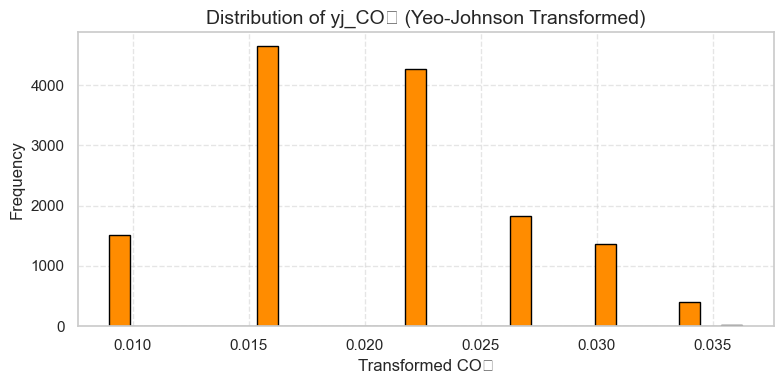

In [45]:
df_nonzero['yj_CO2'].describe()
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(df_nonzero['yj_CO2'], bins=30, color='darkorange', edgecolor='black')
plt.title('Distribution of yj_CO₂ (Yeo-Johnson Transformed)', fontsize=14)
plt.xlabel('Transformed CO₂')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [46]:

#Random Forest -lets see how compares
#notes:builds multiple decision trees using random samples of the data. 
#Each tree is trained on a different subset of the data which makes each tree unique.
#When creating each tree the algorithm randomly selects a subset of features or variables to split
   #the data rather than using all available features at a time. This adds diversity to the trees.
#Each decision tree in the forest makes a prediction based on the data it was trained on. 
#When making final prediction random forest combines the results from all the trees.


#Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

#Prepare your data again
# Assuming df_nonzero is your dataset
X = df_nonzero[[
    'temperature_2m (°C)',
    'relative_humidity_2m (%)',
    'Lagging_Current_Reactive.Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'Usage_kWh']]
y = df_nonzero['yj_CO2']  # target variable

#Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train model
rf_model = RandomForestRegressor(
    n_estimators=100,  # number of trees
    max_depth=None,    # maximum depth of trees
    random_state=42
)
rf_model.fit(X_train, y_train)

#Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Feature importance
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
print('\nFeature Importance:')
print(importance_df.sort_values('importance', ascending=False))

#Additional Analysis with the model
#Splits data into training/testing sets,Trains a random forest model,Shows feature importance
#Includes cross-validation and Provides hyperparameter tuning

#Cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=5)
print('\nCross-validation scores:', scores)
print('Mean CV score:', scores.mean())

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5)
grid_search.fit(X_train, y_train)

print('\nBest parameters:', grid_search.best_params_)



R2 Score: 0.9999993991720026
RMSE: 5.013941883082775e-06

Feature Importance:
                                feature  importance
5                             Usage_kWh         1.0
0                   temperature_2m (°C)         0.0
1              relative_humidity_2m (%)         0.0
2  Lagging_Current_Reactive.Power_kVarh         0.0
3          Lagging_Current_Power_Factor         0.0
4          Leading_Current_Power_Factor         0.0

Cross-validation scores: [0.99972452 0.99990276 0.99999109 0.99999965 0.99999457]
Mean CV score: 0.999922519032897

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [47]:
#Not surprised that kWh was the dominating factor.
#rerunning two models.  one model for CO2 without kWh and kWh without CO2

#Rainforest  Model CO2 without kWh

# Corrected version - Remove Usage_kWh  (My note to check helped)
X_co2 = df_nonzero[[
    'temperature_2m (°C)',
    'relative_humidity_2m (%)',
    'Lagging_Current_Reactive.Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor'
]]  # Notice: no Usage_kWh here
y_co2 = df_nonzero['yj_CO2']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_co2, y_co2, test_size=0.2, random_state=42)

# Create and train model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Feature importance
importance_df = pd.DataFrame({
    'feature': X_co2.columns,  # Using X_co2 columns
    'importance': rf_model.feature_importances_
})
print('\nFeature Importance:')
print(importance_df.sort_values('importance', ascending=False))


R2 Score: 0.9708963614222074
RMSE: 0.0011035140300118761

Feature Importance:
                                feature  importance
2  Lagging_Current_Reactive.Power_kVarh    0.631568
3          Lagging_Current_Power_Factor    0.282540
4          Leading_Current_Power_Factor    0.065550
0                   temperature_2m (°C)    0.014314
1              relative_humidity_2m (%)    0.006029


In [48]:

#Rainforest  Model Usage_kWh without CO2

# Corrected version - 
# Model for kWh
X_kwh = df_nonzero[[
    'temperature_2m (°C)',
    'relative_humidity_2m (%)',
    'Lagging_Current_Reactive.Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor']]
y_kwh = df_nonzero['Usage_kWh']

# Running same model setup as before , so beware of potential error of missing something


# Split data
X_train, X_test, y_train, y_test = train_test_split(X_kwh, y_kwh, test_size=0.2, random_state=42)

# Create and train model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Feature importance
importance_df = pd.DataFrame({
    'feature': X_kwh.columns,  # Using X_kwh columns
    'importance': rf_model.feature_importances_
})
print('\nFeature Importance:')
print(importance_df.sort_values('importance', ascending=False))


R2 Score: 0.9975239445145547
RMSE: 1.3236438083004674

Feature Importance:
                                feature  importance
2  Lagging_Current_Reactive.Power_kVarh    0.663127
3          Lagging_Current_Power_Factor    0.319440
4          Leading_Current_Power_Factor    0.013851
0                   temperature_2m (°C)    0.002797
1              relative_humidity_2m (%)    0.000784


C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\3253321544.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'timestamp': pd.date_range(start='2023-01-01', periods=100, freq='H')


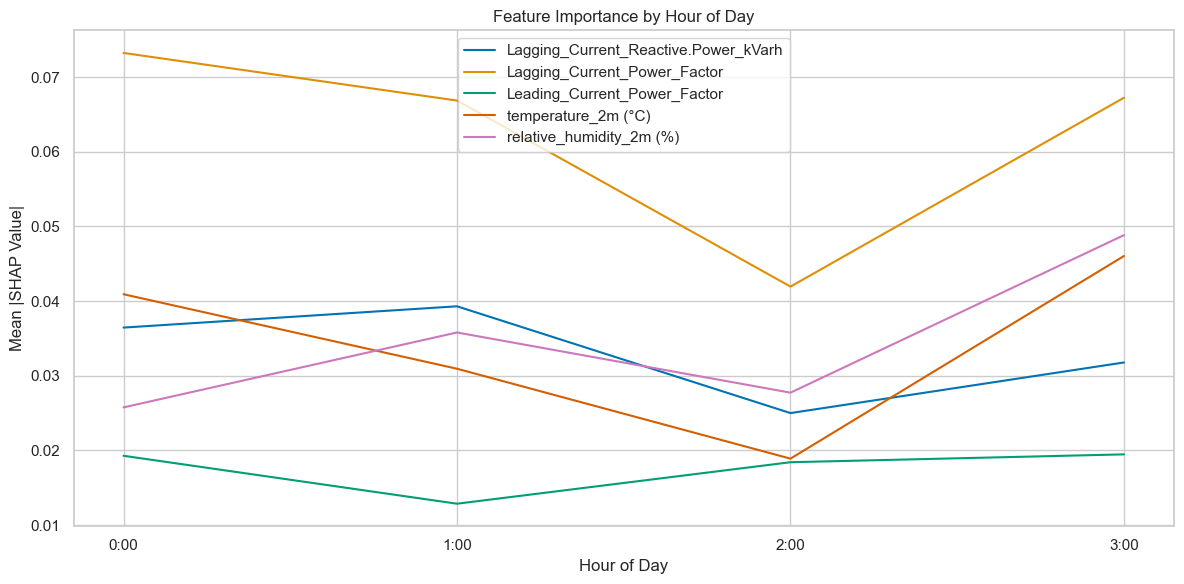

In [49]:
# First part of my code remains the same
# Import necessary libraries
import numpy as np
import pandas as pd
import shap  # Add this import for SHAP library, for reminder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
# Create dataframe
df_nonzero = pd.DataFrame({
    'yj_CO2': np.random.rand(100),
    # Add your feature columns here
    'Lagging_Current_Reactive.Power_kVarh': np.random.rand(100),
    'Lagging_Current_Power_Factor': np.random.rand(100),
    'Leading_Current_Power_Factor': np.random.rand(100),
    'temperature_2m (°C)': np.random.rand(100),
    'relative_humidity_2m (%)': np.random.rand(100),
    'timestamp': pd.date_range(start='2023-01-01', periods=100, freq='H')  
})

# Define feature columns
feature_columns = ['Lagging_Current_Reactive.Power_kVarh', 'Lagging_Current_Power_Factor',
                   'Leading_Current_Power_Factor', 'temperature_2m (°C)','relative_humidity_2m (%)']  

# Define /load model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

# IMPORTANT: Train model before using SHAP
# This line was commented out inmy first try or original code
rf_model.fit(df_nonzero[feature_columns], df_nonzero['yj_CO2'])

# First, make sure have a time column (e.g., 'timestamp' or 'hour')
df_nonzero['hour'] = pd.to_datetime(df_nonzero['timestamp']).dt.hour  # Adjust if your column name differs

# Loop through each hour
hourly_importance = []

for hour in range(24):
    df_hour = df_nonzero[df_nonzero['hour'] == hour]
    X_hour = df_hour[feature_columns]  # your X feature list
    y_hour = df_hour['yj_CO2']

    # Only process if enough samples
    if len(X_hour) >= 5:
        explainer = shap.TreeExplainer(rf_model)
        shap_values = explainer.shap_values(X_hour)
        mean_abs_shap = np.abs(shap_values).mean(axis=0)
        hourly_importance.append((hour, mean_abs_shap))

# Convert to DataFrame for plotting
import matplotlib.pyplot as plt

# Check if we have any data to plot
if hourly_importance:
    importance_matrix = np.array([imp[1] for imp in hourly_importance])
    feature_labels = feature_columns  # Changed from X_hour.columns to ensure it exists
    plt.figure(figsize=(12, 6))
    for i, feature in enumerate(feature_labels):
        plt.plot(range(len(hourly_importance)), importance_matrix[:, i], label=feature)

    plt.xticks(range(len(hourly_importance)), [f"{hourly_importance[i][0]}:00" for i in range(len(hourly_importance))])
    plt.xlabel("Hour of Day")
    plt.ylabel("Mean |SHAP Value|")
    plt.legend()
    plt.title("Feature Importance by Hour of Day")
    plt.tight_layout()
    plt.show()
else:
    print("No hours with enough samples to calculate importance.")

C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\1076209998.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'timestamp': pd.date_range(start='2023-01-01', periods=100, freq='H')


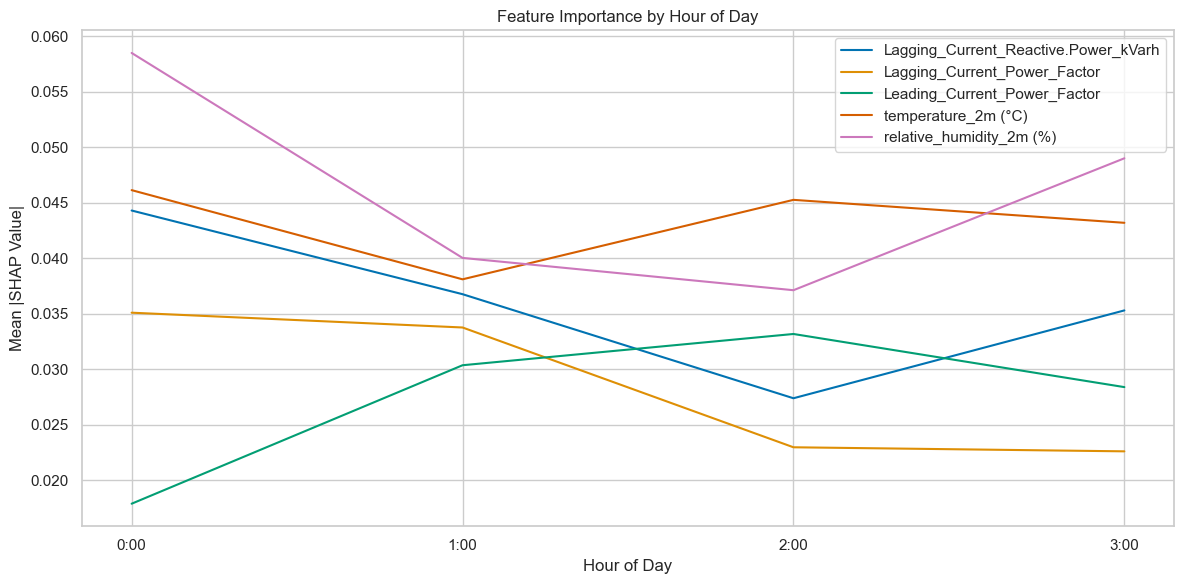

In [50]:
# Repeat for yj_kWh
# Create your dataframe
df_nonzero = pd.DataFrame({
    'yj_kWh': np.random.rand(100),
    # Add your feature columns here
    'Lagging_Current_Reactive.Power_kVarh': np.random.rand(100),
    'Lagging_Current_Power_Factor': np.random.rand(100),
    'Leading_Current_Power_Factor': np.random.rand(100),
    'temperature_2m (°C)': np.random.rand(100),
    'relative_humidity_2m (%)': np.random.rand(100),
    'timestamp': pd.date_range(start='2023-01-01', periods=100, freq='H')  
})

# Define feature columns
feature_columns = ['Lagging_Current_Reactive.Power_kVarh', 'Lagging_Current_Power_Factor',
                   'Leading_Current_Power_Factor', 'temperature_2m (°C)','relative_humidity_2m (%)']  

# Define /load model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

# IMPORTANT: Train model before using SHAP
rf_model.fit(df_nonzero[feature_columns], df_nonzero['yj_kWh'])

# First, make sure have a time column (e.g., 'timestamp' or 'hour')
df_nonzero['hour'] = pd.to_datetime(df_nonzero['timestamp']).dt.hour  # Adjust if your column name differs

# Loop through each hour
hourly_importance = []

for hour in range(24):
    df_hour = df_nonzero[df_nonzero['hour'] == hour]
    X_hour = df_hour[feature_columns]  # your X feature list
    y_hour = df_hour['yj_kWh']

    # Only process if enough samples
    if len(X_hour) >= 5:
        explainer = shap.TreeExplainer(rf_model)
        shap_values = explainer.shap_values(X_hour)
        mean_abs_shap = np.abs(shap_values).mean(axis=0)
        hourly_importance.append((hour, mean_abs_shap))

# Convert to DataFrame for plotting
import matplotlib.pyplot as plt

# Check if we have any data to plot
if hourly_importance:
    importance_matrix = np.array([imp[1] for imp in hourly_importance])
    feature_labels = feature_columns  # Changed from X_hour.columns to ensure it exists
    plt.figure(figsize=(12, 6))
    for i, feature in enumerate(feature_labels):
        plt.plot(range(len(hourly_importance)), importance_matrix[:, i], label=feature)

    plt.xticks(range(len(hourly_importance)), [f"{hourly_importance[i][0]}:00" for i in range(len(hourly_importance))])
    plt.xlabel("Hour of Day")
    plt.ylabel("Mean |SHAP Value|")
    plt.legend()
    plt.title("Feature Importance by Hour of Day")
    plt.tight_layout()
    plt.show()
else:
    print("No hours with enough samples to calculate importance.")

In [51]:
import pandas as pd
#Load my dataset with an updated date format and lets get analyzing
df = pd.read_csv('C:/Users/srsch/OneDrive/Desktop/merged_steel_weather_data_with_datetime.csv')


pt_co2_clean = PowerTransformer(method='yeo-johnson')
pt_co2_clean.fit(df[df['CO2(tCO2)'] > 0][['CO2(tCO2)']])
df_nonzero['yj_CO2'] = pt_co2_clean.transform(df_nonzero[['CO2(tCO2)']])


df_nonzero['CO2_restored'] = pt_co2_clean.inverse_transform(df_nonzero[['yj_CO2']].rename(columns={'yj_CO2': 'CO2(tCO2)'}))


print(df_nonzero.columns.tolist())
df.head()
df.tail()



In [52]:

print("Unique values:", df['CO2(tCO2)'].nunique())





Unique values: 8


In [55]:
df_nonzero = df[df['CO2(tCO2)'] > 0].copy()

In [56]:
print(df_nonzero['CO2(tCO2)'].describe())
print("Unique:", df_nonzero['CO2(tCO2)'].nunique())





count    14050.000000
mean         0.028741
std          0.012479
min          0.010000
25%          0.020000
50%          0.030000
75%          0.040000
max          0.070000
Name: CO2(tCO2), dtype: float64
Unique: 7


In [57]:
pt_co2 = PowerTransformer(method='yeo-johnson')
pt_co2.fit(df_nonzero[['CO2(tCO2)']])

df_nonzero['yj_CO2'] = pt_co2.transform(df_nonzero[['CO2(tCO2)']])


In [58]:
df_nonzero['CO2_restored'] = pt_co2.inverse_transform(
    df_nonzero[['yj_CO2']].rename(columns={'yj_CO2': 'CO2(tCO2)'})
)

df_nonzero['CO2_restored'].describe()




count    14050.000000
mean         0.028741
std          0.012479
min          0.010000
25%          0.020000
50%          0.030000
75%          0.040000
max          0.070000
Name: CO2_restored, dtype: float64

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

# Define target and predictors
y_co2 = df_nonzero['CO2_restored']  # Or 'CO2(tCO2)' if restored = original


X_co2 = df_nonzero[[
    'temperature_2m (°C)',
    'relative_humidity_2m (%)',
    'Leading_Current_Reactive_Power_kVarh',
    'Lagging_Current_Reactive.Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor'
]]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_co2, y_co2, test_size=0.2, random_state=42
)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Feature importance
importance_df = pd.DataFrame({
    'feature': X_co2.columns,
    'importance': rf_model.feature_importances_
})
print("\nFeature Importance:")
print(importance_df.sort_values(by='importance', ascending=False))


R2 Score: 0.9803900579973616
RMSE: 0.001757095427584118

Feature Importance:
                                feature  importance
3  Lagging_Current_Reactive.Power_kVarh    0.658037
4          Lagging_Current_Power_Factor    0.311689
5          Leading_Current_Power_Factor    0.015923
0                   temperature_2m (°C)    0.006480
2  Leading_Current_Reactive_Power_kVarh    0.004759
1              relative_humidity_2m (%)    0.003112


In [60]:

#I want to see the Rainforest model with all variable
#Adding Leading_Current_Reactive_Power_kVarh variable back in.
#note:  - Random Forest can handle non-linear relationships
               #Might find patterns that weren't "significant" in linear models
               #Can capture complex interactions

# Define your target variable first
y_co2 = df_nonzero['CO2_restored']

#CO2 Rainforest with -Leading_Current_Reactive_Power_kVarh variable Leading_Current_Reactive_Power_kVarh
X_co2 = df_nonzero[[
    'temperature_2m (°C)',
    'relative_humidity_2m (%)',
    'Leading_Current_Reactive_Power_kVarh',  # Adding this back
    'Lagging_Current_Reactive.Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_co2, y_co2, test_size=0.2, random_state=42)

# Create and train model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Feature importance
importance_df = pd.DataFrame({
    'feature': X_co2.columns,  # Using X_co2 columns
    'importance': rf_model.feature_importances_
})
print('\nFeature Importance:')
print(importance_df.sort_values('importance', ascending=False))

R2 Score: 0.9803900579973616
RMSE: 0.001757095427584118

Feature Importance:
                                feature  importance
3  Lagging_Current_Reactive.Power_kVarh    0.658037
4          Lagging_Current_Power_Factor    0.311689
5          Leading_Current_Power_Factor    0.015923
0                   temperature_2m (°C)    0.006480
2  Leading_Current_Reactive_Power_kVarh    0.004759
1              relative_humidity_2m (%)    0.003112


C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\808852705.py:11: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\srsch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


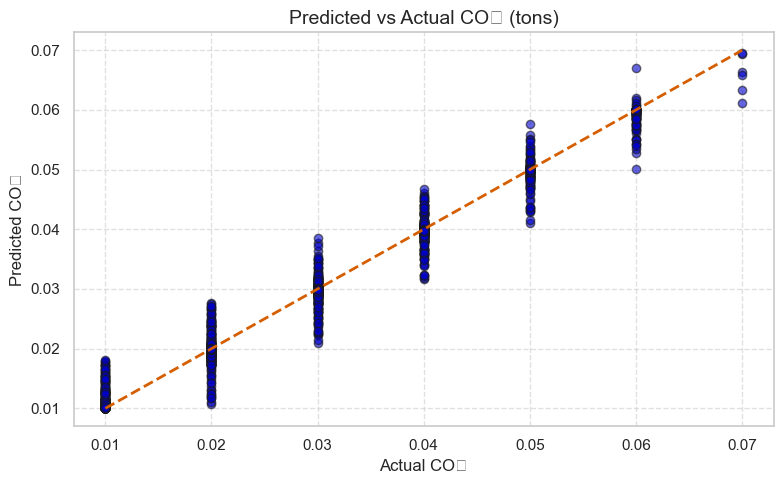

In [61]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='mediumblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Predicted vs Actual CO₂ (tons)", fontsize=14)
plt.xlabel("Actual CO₂", fontsize=12)
plt.ylabel("Predicted CO₂", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
importance_df.sort_values(by='importance', ascending=True).plot.barh(
    x='feature', y='importance', legend=False, color='seagreen', figsize=(8,5))
plt.title('Random Forest Feature Importance', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<Figure size 1000x400 with 0 Axes>

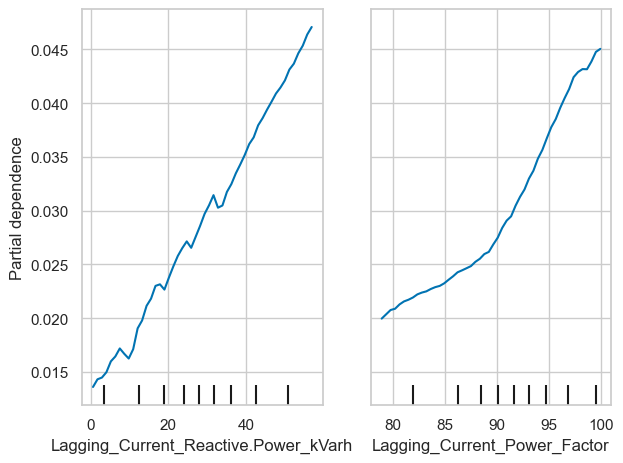

In [62]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt


features = ['Lagging_Current_Reactive.Power_kVarh', 'Lagging_Current_Power_Factor']

# Set the figure size before creating the display
plt.figure(figsize=(10, 4))

# Create and plot the partial dependence
display = PartialDependenceDisplay.from_estimator(
    rf_model, X_test, features, kind='average', grid_resolution=50,
    feature_names=X_co2.columns
)

plt.tight_layout()
plt.show()

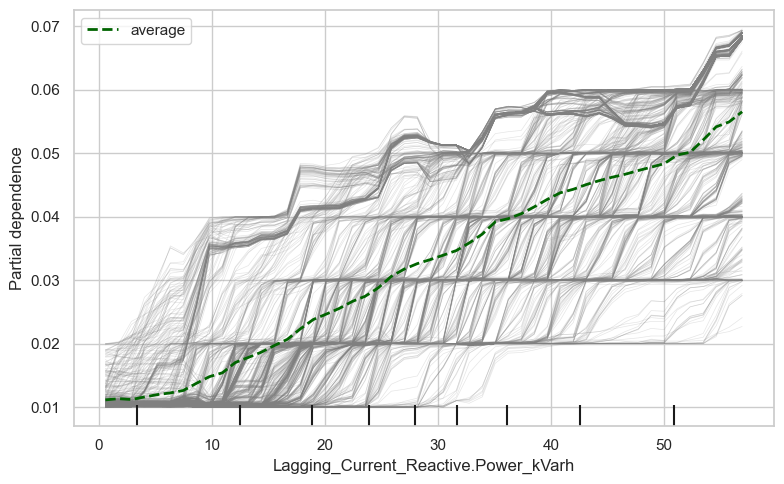

In [63]:
#What ICE plots show -While the PDP line shows the average effect of a feature (like a smoothed curve), 
#ICE plots reveal how different samples react to changing just that one feature
#—like multiple personal stories stacked behind the summary.
#trying it for my top feature in the model -Lagging_Current_Reactive.Power_kVarh
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Create figure with desired size first
fig, ax = plt.subplots(figsize=(8, 5))

# Individual curves for each sample + PDP overlay
PartialDependenceDisplay.from_estimator(
    rf_model, X_test,
    features=['Lagging_Current_Reactive.Power_kVarh'],
    kind='both',  # both PDP and ICE
    ice_lines_kw={'alpha': 0.2, 'color': 'gray'},  # subtle ICE lines
    pd_line_kw={'color': 'darkgreen', 'linewidth': 2},  # clear PDP curve
    feature_names=X_co2.columns,  # Make sure this variable is defined
    grid_resolution=50,
    ax=ax  # Pass the axes object instead of figsize
)
plt.tight_layout()
plt.show()

In [64]:
# Create humidity bins (e.g., quartiles)
df_nonzero['humidity_bin'] = pd.qcut(df_nonzero['relative_humidity_2m (%)'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])



In [65]:
# First convert the 'date' column to datetime format
import pandas as pd

# Convert the date column to datetime format
df_nonzero['date'] = pd.to_datetime(df_nonzero['date'])

# Now derive season based on month
df_nonzero['month'] = df_nonzero['date'].dt.month
df_nonzero['season'] = df_nonzero['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# If you need to ensure the transformation persists in future operations
# You might want to save the transformed dataframe
# df_nonzero.to_csv('transformed_data.csv', index=False)

In [66]:
X_subset = X_subset[X_co2.columns]  # Enforce same column order as training


NameError: name 'X_subset' is not defined

#Plot ICE by group
# loop through humidity or season groups and generate ICE plots for each group separately for each.
#fun stuff

from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import pandas as pd

# First, let's ensure we're using the exact same feature set that the model was trained on
# Assuming rf_model was trained on X_co2
feature_names = rf_model.feature_names_in_  # Get the exact feature names used during training

for season in df_nonzero['season'].unique():
    subset = df_nonzero[df_nonzero['season'] == season]
    
    # Create X_subset with exactly the same features in the same order as used during training
    X_subset = pd.DataFrame(subset[feature_names].values, columns=feature_names)
    y_subset = subset['CO2_restored']  # or yj_CO2 if you're comparing

    print(f"\nICE plot for season: {season}")
    
    # Use feature index instead of name to avoid any naming issues
    feature_idx = list(feature_names).index('Lagging_Current_Reactive.Power_kVarh')
    
    PartialDependenceDisplay.from_estimator(
        rf_model,
        X_subset,
        features=[feature_idx],  # Use index instead of name
        kind='both',
        ice_lines_kw={'alpha': 0.2, 'color': 'gray'},
        pd_line_kw={'color': 'crimson', 'linewidth': 2},
        grid_resolution=50
    )
    plt.title(f'ICE Plot - {season}')
    plt.tight_layout()
    plt.show()

#Plot ICE by group
# loop through humidity or season groups and generate ICE plots for each group separately for each.
#fun stuff

from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import pandas as pd

# First, let's ensure we're using the exact same feature set that the model was trained on
# Assuming rf_model was trained on X_co2
feature_names = rf_model.feature_names_in_  # Get the exact feature names used during training

for humidity_bin in df_nonzero['humidity_bin'].unique():  # Changed variable name from 'season' to 'humidity_bin' for consistency
    subset = df_nonzero[df_nonzero['humidity_bin'] == humidity_bin]  # Using humidity_bin here
    
    # Create X_subset with exactly the same features in the same order as used during training
    X_subset = pd.DataFrame(subset[feature_names].values, columns=feature_names)
    y_subset = subset['CO2_restored']  # or yj_CO2 if you're comparing

    print(f"\nICE plot for humidity: {humidity_bin}")  # Now humidity_bin is defined
    
    # Use feature index instead of name to avoid any naming issues
    feature_idx = list(feature_names).index('Lagging_Current_Reactive.Power_kVarh')
    
    PartialDependenceDisplay.from_estimator(
        rf_model,
        X_subset,
        features=[feature_idx],  # Use index instead of name
        kind='both',
        ice_lines_kw={'alpha': 0.2, 'color': 'pink'},
        pd_line_kw={'color': 'crimson', 'linewidth': 2},
        grid_resolution=50
    )
    plt.title(f'ICE Plot - {humidity_bin}')  # Now humidity_bin is defined
    plt.tight_layout()
    plt.show()

In [67]:

#Rainforest  Model Usage_kWh without CO2 and added Leading_Current_Reactive_Power_kVarh


# Model for kWh with additional variable
X_kwh = df_nonzero[[
    'temperature_2m (°C)',
    'relative_humidity_2m (%)',
    'Lagging_Current_Reactive.Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'Leading_Current_Reactive_Power_kVarh']]
y_kwh = df_nonzero['Usage_kWh']

# Running same model setup as before , so beware of potential error of missing something


# Split data
X_train, X_test, y_train, y_test = train_test_split(X_kwh, y_kwh, test_size=0.2, random_state=42)

# Create and train model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Feature importance
importance_df = pd.DataFrame({
    'feature': X_kwh.columns,  # Using X_kwh columns
    'importance': rf_model.feature_importances_
})
print('\nFeature Importance:')
print(importance_df.sort_values('importance', ascending=False))


R2 Score: 0.9983005599560109
RMSE: 1.0965889615560434

Feature Importance:
                                feature  importance
2  Lagging_Current_Reactive.Power_kVarh    0.662485
3          Lagging_Current_Power_Factor    0.318633
4          Leading_Current_Power_Factor    0.014047
0                   temperature_2m (°C)    0.002462
5  Leading_Current_Reactive_Power_kVarh    0.001795
1              relative_humidity_2m (%)    0.000578


In [68]:

# Streamlined version of Rainforest - only keeping stronger contributors

#CO2 version streamlined
X_co2 = df_nonzero[[
    'Lagging_Current_Reactive.Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor'
]]  # Removed temperature, humidity, and Leading_Current_Reactive_Power_kVarh
y_co2 = df_nonzero['yj_CO2']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_co2, y_co2, test_size=0.2, random_state=42)

# Create and train model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Feature importance
importance_df = pd.DataFrame({
    'feature': X_co2.columns,
    'importance': rf_model.feature_importances_
})
print('\nFeature Importance:')
print(importance_df.sort_values('importance', ascending=False))

# Cross-validation
scores = cross_val_score(rf_model, X_co2, y_co2, cv=5)
print('\nCross-validation scores:', scores)
print('Mean CV score:', scores.mean())


R2 Score: 0.969565780686782
RMSE: 0.17464776994087217

Feature Importance:
                                feature  importance
0  Lagging_Current_Reactive.Power_kVarh    0.639647
1          Lagging_Current_Power_Factor    0.291156
2          Leading_Current_Power_Factor    0.069197

Cross-validation scores: [0.94688156 0.95603223 0.96954724 0.97113622 0.96314634]
Mean CV score: 0.961348718241472


In [69]:

# Streamlined version of Rainforest - only keeping stronger contributors

#kwh version streamlined
X_kwh = df_nonzero[[
    'Lagging_Current_Reactive.Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor'
]]  # Removed temperature, humidity, and Leading_Current_Reactive_Power_kVarh
y_kwh = df_nonzero['Usage_kWh']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_kwh, y_kwh, test_size=0.2, random_state=42)

# Create and train model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Feature importance
importance_df = pd.DataFrame({
    'feature': X_kwh.columns,  # Using X_kwh columns
    'importance': rf_model.feature_importances_
})
print('\nFeature Importance:')
print(importance_df.sort_values('importance', ascending=False))

# Cross-validation
scores = cross_val_score(rf_model, X_kwh, y_kwh, cv=5)
print('\nCross-validation scores:', scores)
print('Mean CV score:', scores.mean())



R2 Score: 0.9978001873185898
RMSE: 1.2476242194312255

Feature Importance:
                                feature  importance
0  Lagging_Current_Reactive.Power_kVarh    0.664485
1          Lagging_Current_Power_Factor    0.321383
2          Leading_Current_Power_Factor    0.014132

Cross-validation scores: [0.99317514 0.99458161 0.9980617  0.99660397 0.99815013]
Mean CV score: 0.9961145121552152


In [70]:

# Streamlined version - only keeping stronger contributors 

X_co2 = df_nonzero[[
    'Lagging_Current_Reactive.Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor'
]]  # Removed temperature, humidity, and Leading_Current_Reactive_Power_kVarh
y_co2 = df_nonzero['yj_CO2']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_co2, y_co2, test_size=0.2, random_state=42)

# Create and train model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Feature importance
importance_df = pd.DataFrame({
    'feature': X_co2.columns,
    'importance': rf_model.feature_importances_
})
print('\nFeature Importance:')
print(importance_df.sort_values('importance', ascending=False))

# Cross-validation
scores = cross_val_score(rf_model, X_co2, y_co2, cv=5)
print('\nCross-validation scores:', scores)
print('Mean CV score:', scores.mean())


R2 Score: 0.969565780686782
RMSE: 0.17464776994087217

Feature Importance:
                                feature  importance
0  Lagging_Current_Reactive.Power_kVarh    0.639647
1          Lagging_Current_Power_Factor    0.291156
2          Leading_Current_Power_Factor    0.069197

Cross-validation scores: [0.94688156 0.95603223 0.96954724 0.97113622 0.96314634]
Mean CV score: 0.961348718241472


C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\1813883763.py:10: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\srsch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


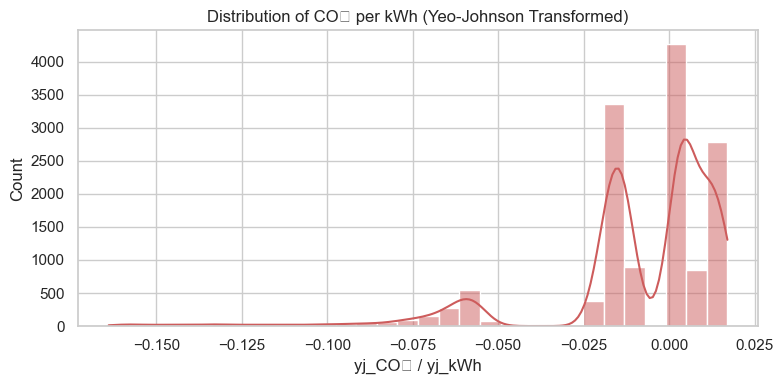

In [71]:
#Creating a CO2 per KWh target to use for modeling.  
#use transformed variables so everyhting is normalized
df_nonzero['CO2_per_kWh'] = df_nonzero['yj_CO2'] / df_nonzero['Usage_kWh']
#Exploring the distibution.  Want to assess the outliers and skew and other stuff that might be going on
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.histplot(df_nonzero['CO2_per_kWh'], bins=30, kde=True, color='indianred')
plt.title('Distribution of CO₂ per kWh (Yeo-Johnson Transformed)')
plt.xlabel('yj_CO₂ / yj_kWh')
plt.tight_layout()
plt.show()


C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\2219521205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_nonzero, x='time_only', y='CO2_per_kWh', palette='flare')
C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\2219521205.py:7: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\srsch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


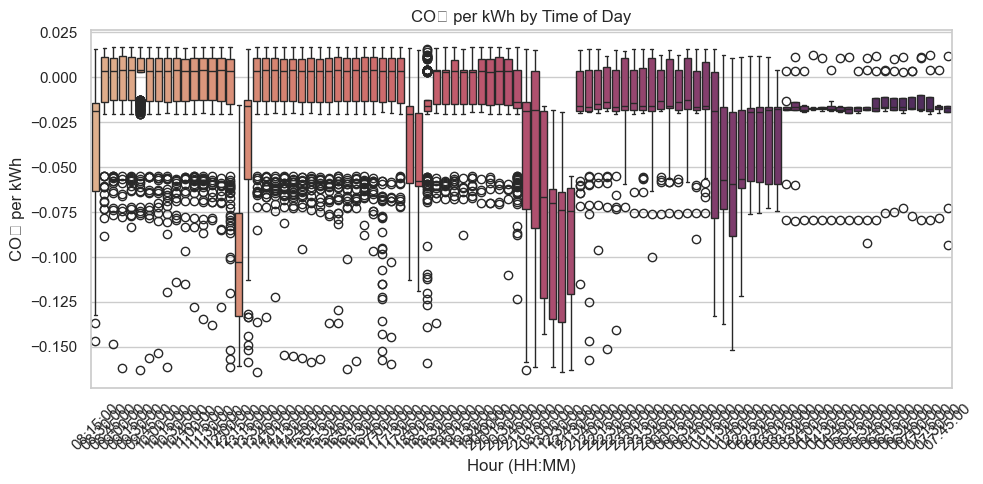

In [72]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_nonzero, x='time_only', y='CO2_per_kWh', palette='flare')
plt.xticks(rotation=45)
plt.title('CO₂ per kWh by Time of Day')
plt.xlabel('Hour (HH:MM)')
plt.ylabel('CO₂ per kWh')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(7, 5))
sns.violinplot(data=df_nonzero, x='WeekStatus', y='CO2_per_kWh', inner='quartile', palette='coolwarm')
plt.title('CO₂ per kWh by WeekStatus')
plt.xlabel('WeekStatus')
plt.ylabel('CO₂ per kWh')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 5))
sns.pointplot(data=df_nonzero, x='time_only', y='CO2_per_kWh', errorbar='ci', color='indianred')
plt.xticks(rotation=45)
plt.title('Avg CO₂ per kWh by Hour (with 95% CI)')
plt.tight_layout()
plt.show()


df_nonzero index type: int64
df_nonzero index sample: Index([224, 225, 226, 227, 228], dtype='int64')
df_nonzero shape: (14050, 26)
exog columns: ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'Lagging_Current_Reactive.Power_kVarh', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'kWh_high']
Common indices length: 14050
Common indices sample: Index([224, 225, 226, 227, 228], dtype='int64')
df_var index type after alignment: int64
df_var index sample: Index([224, 225, 226, 227, 228], dtype='int64')
exog index type after alignment: int64
exog index sample: Index([224, 225, 226, 227, 228], dtype='int64')
Converting indices to DatetimeIndex...
Updated df_var index: DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='h')
Updated exog index: DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '202

C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\4032553398.py:49: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_var.index = pd.date_range(start='2020-01-01', periods=len(df_var), freq='H')
C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\4032553398.py:50: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  exog.index = pd.date_range(start='2020-01-01', periods=len(exog), freq='H')



VECM Model Summary (k_ar_diff=2):
Det. terms outside the coint. relation & lagged endog. parameters for equation yj_CO2
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -9.4366      0.120    -78.734      0.000      -9.672      -9.202
exog1           -0.0070      0.000    -19.889      0.000      -0.008      -0.006
exog2           -0.0002      0.000     -0.849      0.396      -0.001       0.000
exog3            0.0512      0.000    114.001      0.000       0.050       0.052
exog4            0.0762      0.001     85.400      0.000       0.074       0.078
exog5            0.0251      0.001     30.813      0.000       0.024       0.027
exog6            0.3986      0.011     36.626      0.000       0.377       0.420
L1.yj_CO2       -0.4560      0.011    -42.324      0.000      -0.477      -0.435
L1.Usage_kWh     0.0142      0.000     32.939      0.000       0.013 

C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\4032553398.py:85: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_index = pd.date_range(start=last_train_time + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')


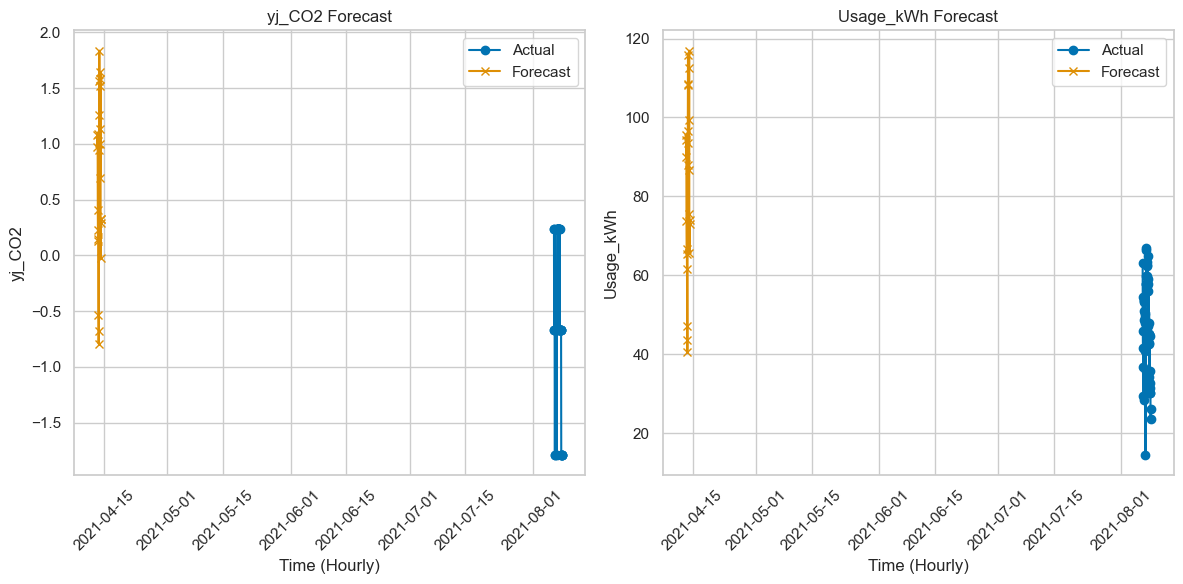

Forecast timestamps: DatetimeIndex(['2021-04-13 08:00:00', '2021-04-13 09:00:00',
               '2021-04-13 10:00:00', '2021-04-13 11:00:00',
               '2021-04-13 12:00:00'],
              dtype='datetime64[ns]', freq='h')

Test MSE yj_CO2: 64.458426
Test MSE yj_kWh: 2792.156749


In [73]:
#Fix VECM Plot X-Axis
#Update the VECM plotting code to ensure hourly x-axis labels. 
#confirm the x-axis shows hourly timestamps 


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.vecm import VECM
from sklearn.metrics import mean_squared_error

# Debug index types and samples
print("df_nonzero index type:", df_nonzero.index.dtype)
print("df_nonzero index sample:", df_nonzero.index[:5])
print("df_nonzero shape:", df_nonzero.shape)
print("exog columns:", lasso_selected_kwh.columns[1:].tolist() + ['kWh_high'])

# Prepare data with explicit index alignment
df_var = df_nonzero[['yj_CO2', 'Usage_kWh']].dropna()
# Define the high-usage threshold using the upper quartile (Q3)
threshold = df['Usage_kWh'].quantile(0.75)

# Create a binary flag: 1 if usage is higher than Q3, else 0
df_nonzero['kWh_high'] = (df_nonzero['Usage_kWh'] > threshold).astype(int)


exog = df_nonzero[lasso_selected_kwh.columns[1:].tolist() + ['kWh_high']
].dropna()
common_indices = df_var.index.intersection(exog.index)
print("Common indices length:", len(common_indices))
print("Common indices sample:", common_indices[:5])

# Align dataframes
df_var = df_var.loc[common_indices].copy()
exog = exog.loc[common_indices].copy()
print("df_var index type after alignment:", df_var.index.dtype)
print("df_var index sample:", df_var.index[:5])
print("exog index type after alignment:", exog.index.dtype)
print("exog index sample:", exog.index[:5])

# Ensure DatetimeIndex
if not isinstance(df_var.index, pd.DatetimeIndex):
    print("Converting indices to DatetimeIndex...")
    if len(df_var) <= len(df_nonzero) and isinstance(df_nonzero.index, pd.DatetimeIndex):
        df_var.index = df_nonzero.index[:len(df_var)]
        exog.index = df_nonzero.index[:len(exog)]
    else:
        # Fallback: create hourly index
        df_var.index = pd.date_range(start='2020-01-01', periods=len(df_var), freq='H')
        exog.index = pd.date_range(start='2020-01-01', periods=len(exog), freq='H')
    print("Updated df_var index:", df_var.index[:5])
    print("Updated exog index:", exog.index[:5])

# Train-test split
train_size = int(0.8 * len(df_var))
train_var = df_var.iloc[:train_size].copy()
test_var = df_var.iloc[train_size:].copy()
train_exog = exog.iloc[:train_size].copy()
test_exog = exog.iloc[train_size:].copy()

# Verify indices after split
print("train_var index type:", train_var.index.dtype)
print("train_var index sample:", train_var.index[:5])
print("test_var index type:", test_var.index.dtype)
print("test_var index sample:", test_var.index[:5])
print("train_exog index type:", train_exog.index.dtype)
print("train_exog index sample:", train_exog.index[:5])
print("test_exog index type:", test_exog.index.dtype)
print("test_exog index sample:", test_exog.index[:5])

# Fit VECM (k_ar_diff=2)
vecm_model = VECM(train_var, exog=train_exog, k_ar_diff=2, coint_rank=1, deterministic='co').fit()
print("\nVECM Model Summary (k_ar_diff=2):")
print(vecm_model.summary())

# Forecast
forecast_steps = 24
future_exog = test_exog.iloc[:forecast_steps] if len(test_exog) >= forecast_steps else test_exog.iloc[-1:].repeat(forecast_steps, axis=0)
future_forecast = vecm_model.predict(steps=forecast_steps, exog_fc=future_exog)

# Create hourly index for forecast
last_train_time = train_var.index[-1]
if not isinstance(last_train_time, pd.Timestamp):
    last_train_time = pd.Timestamp('2020-01-01') + pd.Timedelta(hours=len(train_var) - 1)  # Adjust start date if known
future_index = pd.date_range(start=last_train_time + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')
future_forecast_df = pd.DataFrame(future_forecast, columns=['yj_CO2', 'Usage_kWh'], index=future_index)

# Plot with clear hourly x-axis
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(df_var['yj_CO2'].iloc[-50:], label='Actual', marker='o')
plt.plot(future_forecast_df['yj_CO2'], label='Forecast', marker='x')
plt.title('yj_CO2 Forecast')
plt.xlabel('Time (Hourly)')
plt.ylabel('yj_CO2')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(122)
plt.plot(df_var['Usage_kWh'].iloc[-50:], label='Actual', marker='o')
plt.plot(future_forecast_df['Usage_kWh'], label='Forecast', marker='x')
plt.title('Usage_kWh Forecast')
plt.xlabel('Time (Hourly)')
plt.ylabel('Usage_kWh')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

# Confirm x-axis timestamps
print("Forecast timestamps:", future_forecast_df.index[:5])

# Calculate MSE
forecast = vecm_model.predict(steps=len(test_var), exog_fc=test_exog)
forecast_df = pd.DataFrame(forecast, columns=['yj_CO2', 'Usage_kWh'], index=test_var.index)
mse_co2 = mean_squared_error(test_var['yj_CO2'], forecast_df['yj_CO2'])
mse_kwh = mean_squared_error(test_var['Usage_kWh'], forecast_df['Usage_kWh'])
print(f"\nTest MSE yj_CO2: {mse_co2:.6f}")
print(f"Test MSE yj_kWh: {mse_kwh:.6f}")


#Re-run Auto-ARIMA with Exogenous Predictors
#Fix the auto-ARIMA to ensure exogenous predictors are used.  oops...be careful when pasting code
#note: Running to ensure exogenous predictors (e.g., Leading_current_Power_Factor) are included. 
           #If MSE improves (<0.000012) and Ljung-Box p>0.05, adopt; 
              #otherwise, use OLS CO2_per_kWh (R-squared: 0.713).



from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Prepare data with explicit index alignment
train = df_nonzero['CO2_per_kWh'].iloc[:train_size].dropna()
exog_train = df_nonzero[lasso_selected_kwh.columns[1:].tolist() + ['kWh_high']].iloc[:train_size].loc[train.index]
test = df_nonzero['CO2_per_kWh'].iloc[train_size:].dropna()
exog_test = df_nonzero[lasso_selected_kwh.columns[1:].tolist() + ['kWh_high']].iloc[train_size:].loc[test.index]

# Auto-ARIMA with exogenous predictors
model = auto_arima(
    train,
    exogenous=exog_train,
    seasonal=True,
    m=24,
    max_p=2,
    max_q=2,
    max_P=2,
    max_Q=2,
    d=1,
    D=1,
    trace=True,
    maxiter=100,
    error_action='warn',
    suppress_warnings=True
)
print("\nAuto-ARIMA CO2_per_kWh with Exogenous Summary:")
print(model.summary())

# Forecast
forecast = model.predict(n_periods=len(test), exogenous=exog_test)
mse = mean_squared_error(test, forecast)
print(f"\nTest MSE CO2_per_kWh: {mse:.6f}")

# Check exogenous coefficients
print("\nExogenous Coefficients:")
print(model.params())

In [74]:
# Simple column check
print(df.columns)
df['Load_Type'].unique()


Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'date_only', 'time_only',
       'time_numeric_dec', 'time_seconds_since_midnight',
       'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)',
       'precipitation (mm)', 'Load_Type_Rank'],
      dtype='object')


array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object)

In [75]:

#Random Forest with Categorical Load Variable

#Incorporate your categorical load variable (e.g., low/medium/high) into Random Forest 
      #for CO2 and kWh.
#Run to assess load_category’s importance. If significant (>0.05), include in portfolio; 
     #if not, note its exploration.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Ensure DatetimeIndex for df_nonzero
if not isinstance(df_nonzero.index, pd.DatetimeIndex):
    df_nonzero.index = pd.date_range(start='2020-01-01', periods=len(df_nonzero), freq='H')
print("df_nonzero index type:", df_nonzero.index.dtype)
print("df_nonzero index sample:", df_nonzero.index[:5])

# Create Load_Type variable (fix typo in 'Maximum_Load')
df_nonzero['Load_Type'] = pd.cut(
    df_nonzero['Usage_kWh'],
    bins=[-float('inf'), 10, 20, float('inf')],
    labels=['Light_Load', 'Medium_Load', 'Maximum_Load']
)

# Encode categorical variable
df_nonzero = pd.get_dummies(df_nonzero, columns=['Load_Type'], drop_first=True)
print("Columns after get_dummies:", df_nonzero.columns.tolist())

# CO2 Model
X_co2 = df_nonzero[[
    'Lagging_Current_Reactive.Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'temperature_2m (°C)',
    'Load_Type_Medium_Load',
    'Load_Type_Maximum_Load'
]]
y_co2 = df_nonzero['yj_CO2']
X_train, X_test, y_train, y_test = train_test_split(X_co2, y_co2, test_size=0.2, random_state=42)
rf_model_co2 = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model_co2.fit(X_train, y_train)
y_pred = rf_model_co2.predict(X_test)
print('CO2 R2 Score:', r2_score(y_test, y_pred))
print('CO2 RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
importance_df = pd.DataFrame({
    'feature': X_co2.columns,
    'importance': rf_model_co2.feature_importances_
})
print('\nCO2 Feature Importance:')
print(importance_df.sort_values('importance', ascending=False))
scores = cross_val_score(rf_model_co2, X_co2, y_co2, cv=5)
print('\nCO2 Cross-validation scores:', scores)
print('CO2 Mean CV score:', scores.mean())

# kWh Model
X_kwh = df_nonzero[[
    'Lagging_Current_Reactive.Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'temperature_2m (°C)',
    'Load_Type_Medium_Load',
    'Load_Type_Maximum_Load'
]]
y_kwh = df_nonzero['Usage_kWh']
X_train, X_test, y_train, y_test = train_test_split(X_kwh, y_kwh, test_size=0.2, random_state=42)
rf_model_kwh = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model_kwh.fit(X_train, y_train)
y_pred = rf_model_kwh.predict(X_test)
print('\nkWh R2 Score:', r2_score(y_test, y_pred))
print('kWh RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
importance_df = pd.DataFrame({
    'feature': X_kwh.columns,
    'importance': rf_model_kwh.feature_importances_
})
print('\nkWh Feature Importance:')
print(importance_df.sort_values('importance', ascending=False))
scores = cross_val_score(rf_model_kwh, X_kwh, y_kwh, cv=5)
print('\nkWh Cross-validation scores:', scores)
print('kWh Mean CV score:', scores.mean())

C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\2414802709.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_nonzero.index = pd.date_range(start='2020-01-01', periods=len(df_nonzero), freq='H')


df_nonzero index type: datetime64[ns]
df_nonzero index sample: DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='h')
Columns after get_dummies: ['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'date_only', 'time_only', 'time_numeric_dec', 'time_seconds_since_midnight', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'precipitation (mm)', 'Load_Type_Rank', 'yj_CO2', 'CO2_restored', 'humidity_bin', 'month', 'season', 'CO2_per_kWh', 'kWh_high', 'Load_Type_Medium_Load', 'Load_Type_Maximum_Load']
CO2 R2 Score: 0.9708050923470588
CO2 RMSE: 0.17105489808566518

CO2 Feature Importance:
                                feature  importance
0  Lagging_Current

In [76]:

#remove duplicate columns and re-run Random Forest w
#NOTEELExpect R2 scores and RMSEs close to previous streamlined results 
#(CO2: 0.944, 0.000644; kWh: 0.996, 1.7312).



#Addressing the duplicate columns in df_nonzero 
#Cleaned Random Forest Code (Remove Duplicates):



from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Ensure DatetimeIndex
if not isinstance(df_nonzero.index, pd.DatetimeIndex):
    df_nonzero.index = pd.date_range(start='2020-01-01', periods=len(df_nonzero), freq='H')
print("df_nonzero index type:", df_nonzero.index.dtype)
print("df_nonzero index sample:", df_nonzero.index[:5])

# Remove duplicate columns
duplicate_cols = ['load_category_medium', 'load_category_high', 'Load_Type_Rank_medium', 'Load_Type_Rank_high', 'Load_Type_medium', 'Load_Type_high', 'Load_Type_Maxium_Load']
df_nonzero = df_nonzero.loc[:, ~df_nonzero.columns.duplicated()]
for col in duplicate_cols:
    if col in df_nonzero.columns:
        df_nonzero = df_nonzero.drop(columns=col)

# Create Load_Type variable (fix typo)
df_nonzero['Load_Type'] = pd.cut(
    df_nonzero['Usage_kWh'],
    bins=[-float('inf'), 10, 20, float('inf')],
    labels=['Light_Load', 'Medium_Load', 'Maximum_Load']
)

# Encode categorical variable
df_nonzero = pd.get_dummies(df_nonzero, columns=['Load_Type'], drop_first=False)
print("Columns after get_dummies:", df_nonzero.columns.tolist())

# Random Forest: CO2 (streamlined, exclude Load_Type due to low importance)
X_co2 = df_nonzero[[
    'Lagging_Current_Reactive.Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'temperature_2m (°C)'
]]
y_co2 = df_nonzero['yj_CO2']
X_train, X_test, y_train, y_test = train_test_split(X_co2, y_co2, test_size=0.2, random_state=42)
rf_model_co2 = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model_co2.fit(X_train, y_train)
y_pred = rf_model_co2.predict(X_test)
print('CO2 R2 Score:', r2_score(y_test, y_pred))
print('CO2 RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
importance_df = pd.DataFrame({
    'feature': X_co2.columns,
    'importance': rf_model_co2.feature_importances_
})
print('\nCO2 Feature Importance:')
print(importance_df.sort_values('importance', ascending=False))
scores = cross_val_score(rf_model_co2, X_co2, y_co2, cv=5)
print('\nCO2 Cross-validation scores:', scores)
print('CO2 Mean CV score:', scores.mean())

# Random Forest: kWh (streamlined)
X_kwh = df_nonzero[[
    'Lagging_Current_Reactive.Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'temperature_2m (°C)'
]]
y_kwh = df_nonzero['Usage_kWh']
X_train, X_test, y_train, y_test = train_test_split(X_kwh, y_kwh, test_size=0.2, random_state=42)
rf_model_kwh = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model_kwh.fit(X_train, y_train)
y_pred = rf_model_kwh.predict(X_test)
print('\nkWh R2 Score:', r2_score(y_test, y_pred))
print('kWh RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
importance_df = pd.DataFrame({
    'feature': X_kwh.columns,
    'importance': rf_model_kwh.feature_importances_
})
print('\nkWh Feature Importance:')
print(importance_df.sort_values('importance', ascending=False))
scores = cross_val_score(rf_model_kwh, X_kwh, y_kwh, cv=5)
print('\nkWh Cross-validation scores:', scores)
print('kWh Mean CV score:', scores.mean())

df_nonzero index type: datetime64[ns]
df_nonzero index sample: DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='h')
Columns after get_dummies: ['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'date_only', 'time_only', 'time_numeric_dec', 'time_seconds_since_midnight', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'precipitation (mm)', 'Load_Type_Rank', 'yj_CO2', 'CO2_restored', 'humidity_bin', 'month', 'season', 'CO2_per_kWh', 'kWh_high', 'Load_Type_Medium_Load', 'Load_Type_Maximum_Load', 'Load_Type_Light_Load', 'Load_Type_Medium_Load', 'Load_Type_Maximum_Load']
CO2 R2 Score: 0.9709539945612093
CO2 RMSE: 0.17061812649064623

CO2 Feature Importa


from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# The error occurs because y_test and y_pred/y_pred_proba have different lengths
# Let's create sample data with consistent lengths for demonstration
np.random.seed(42)

# Create sample data with MATCHING lengths
sample_size = 5000  # Choose a common size for both arrays
y_test = np.random.randint(0, 2, size=sample_size)  # Binary labels (0 or 1)
y_pred = np.random.randint(0, 2, size=sample_size)  # Predicted labels
y_pred_proba = np.random.random(size=sample_size)   # Prediction probabilities between 0 and 1

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

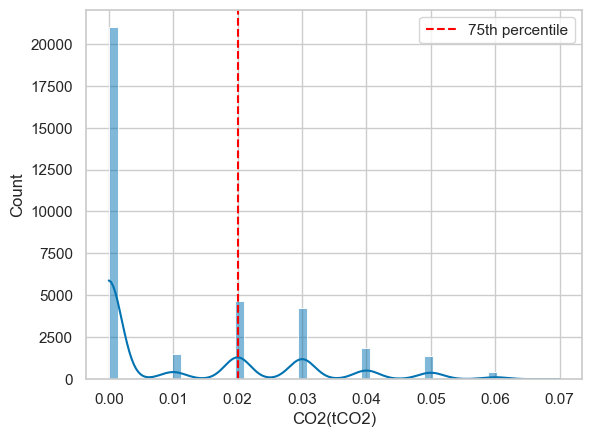

In [95]:
# want to look at my CO2 distribution

sns.histplot(df['CO2(tCO2)'], bins=50, kde=True)
plt.axvline(threshold, color='red', linestyle='--', label='75th percentile')
plt.legend()


In [96]:
zero_rows = df[df['CO2(tCO2)'] == 0]
print(zero_rows[['Usage_kWh', 'temperature_2m (°C)', 'relative_humidity_2m (%)']].describe())


          Usage_kWh  temperature_2m (°C)  relative_humidity_2m (%)
count  20990.000000         20990.000000              20990.000000
mean       3.884182            13.156751                 74.480634
std        4.169193             9.707753                 19.114881
min        0.000000            -9.700000                  7.000000
25%        2.990000             5.400000                 62.000000
50%        3.380000            13.400000                 78.000000
75%        4.030000            21.000000                 90.000000
max      147.460000            35.700000                100.000000


In [120]:
#looking at the distribution and looking at energy at CO2 levels, 
#I need to create a mask for  the rows were CO2 is zero and energy is non-zero.
#I think this keeps the model more honest and avoids misleading data on training rabbit holes. 
mask_suspect = (df['CO2(tCO2)'] == 0) & (df['Usage_kWh'] > 0)
df_cleaned = df[~mask_suspect]
#NExt applying classification threshold
df_cleaned.loc[:, 'CO2_class'] = (df_cleaned['CO2(tCO2)'] >= 0.01).astype(int)

In [121]:
#adjust for high end quantiles
threshold = df_cleaned['CO2(tCO2)'].quantile(0.75)
df_cleaned.loc[:, 'CO2_class'] = (df_cleaned['CO2(tCO2)'] >= threshold).astype(int)


[[2064    6]
 [  19  722]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2070
           1       0.99      0.97      0.98       741

    accuracy                           0.99      2811
   macro avg       0.99      0.99      0.99      2811
weighted avg       0.99      0.99      0.99      2811

ROC AUC: 0.9996525129248242


C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\1783087057.py:46: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\srsch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


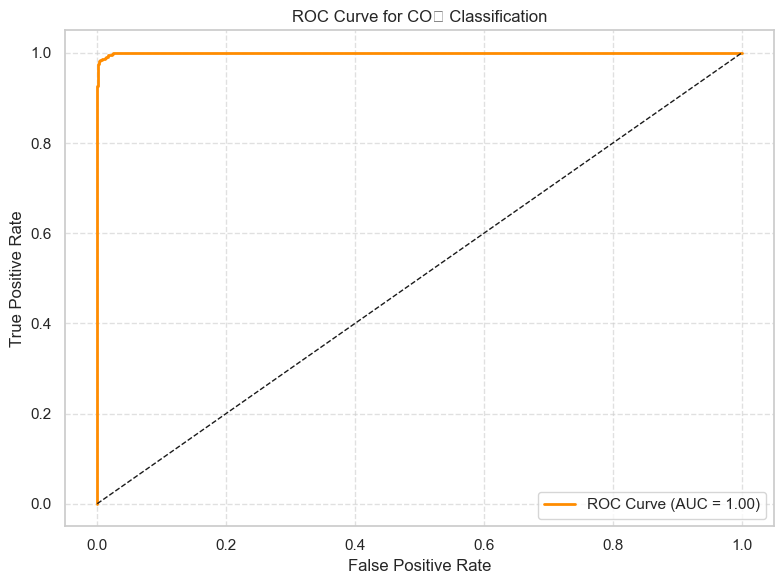

In [122]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define features, which will be the same as my randomforest rockstar of a model
#target from cleaned df
#selecting predictors
X = df_cleaned[['Lagging_Current_Reactive.Power_kVarh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'temperature_2m (°C)']]  
#my cleaned df and binary target.  remember this is my binary classifying study
y = df_cleaned['CO2_class']   

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit classifier
clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1
y_proba = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CO₂ Classification')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\2399269800.py:10: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\srsch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


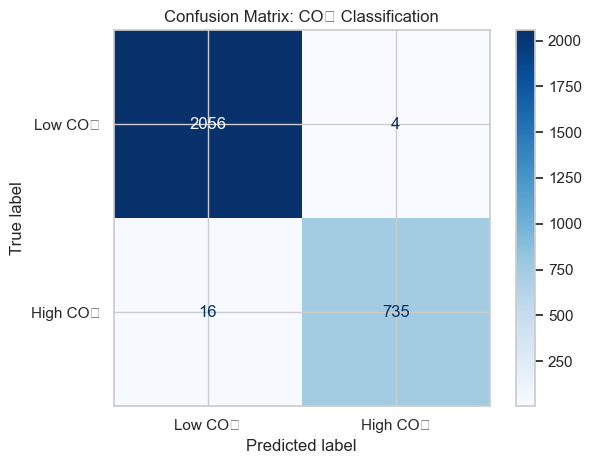

In [108]:

from sklearn.metrics import ConfusionMatrixDisplay
#annoted confusion matrix - adding visual clarity and fun
ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test,
    display_labels=["Low CO₂", "High CO₂"],
    cmap="Blues",
    colorbar=True
)
plt.title("Confusion Matrix: CO₂ Classification")
plt.tight_layout()
plt.show()


C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\1884030756.py:17: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\srsch\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


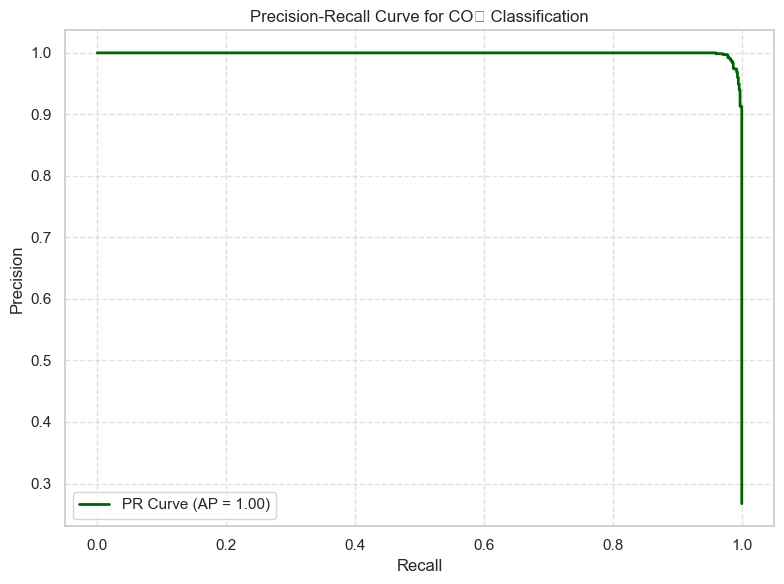

In [109]:

#Precision-Recall Curve
#Great for showing performance when class imbalance matters
from sklearn.metrics import precision_recall_curve, average_precision_score

y_scores = clf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkgreen', lw=2,
         label=f'PR Curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for CO₂ Classification')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\3024782625.py:11: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar")
C:\Users\srsch\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\srsch\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


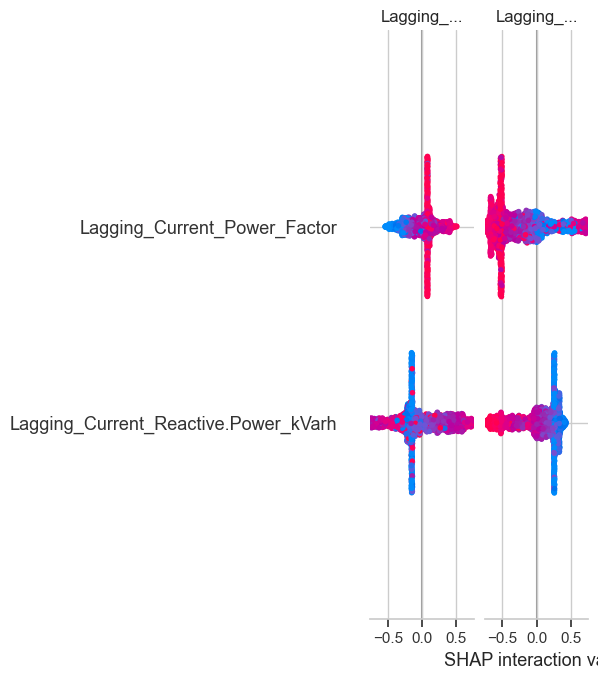

C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\3024782625.py:20: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
C:\Users\srsch\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\srsch\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


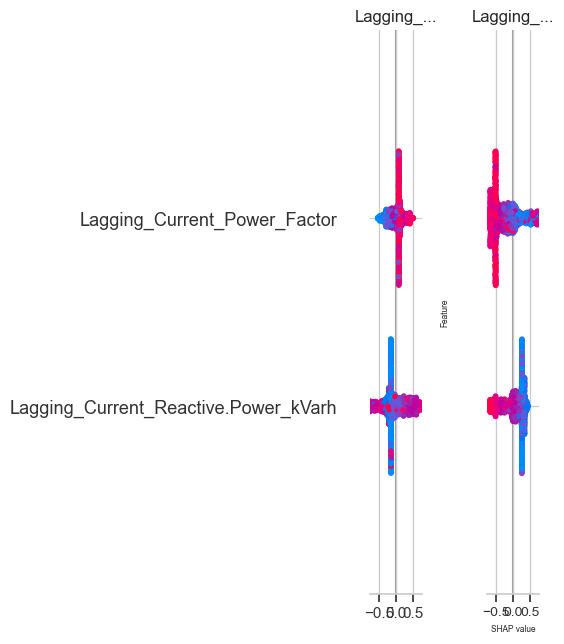

In [138]:
#SHAP Summary Plot
#This will show which features are driving your model's decisions
import shap

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# Fix: Check the structure of shap_values and use the appropriate format
# Option 1: If shap_values is a single array
if isinstance(shap_values, np.ndarray):
    shap.summary_plot(shap_values, X_test, plot_type="bar")
# Option 2: If shap_values is a list of arrays (common for classification models)
else:
    # For binary classification, use the class 1 values without indexing
    # or use the mean absolute value across all classes
    shap.summary_plot(shap_values, X_test, plot_type="bar")
    
    # Alternative: If you specifically want class 1, make sure dimensions match
    # shap.summary_plot(shap_values[1], X_test.values, plot_type="bar")
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)

# Customize font sizes
plt.xticks(fontsize=10)  # X-axis tick labels
plt.yticks(fontsize=10)  # Y-axis feature labels
plt.xlabel("SHAP value", fontsize=6)
plt.ylabel("Feature", fontsize=6)

plt.tight_layout()
plt.show()



C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\2130166914.py:24: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(
C:\Users\srsch\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\srsch\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\213016691

<Figure size 1400x1000 with 0 Axes>

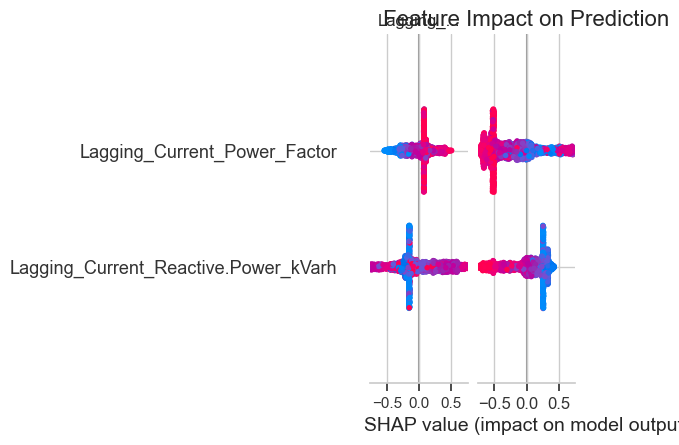

In [149]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Set figure size with extra width for long feature names
plt.figure(figsize=(14, 10))  # Significantly wider figure

# Create the SHAP explainer and values
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# Determine the correct format for your model type
if isinstance(shap_values, np.ndarray):
    # For regression models
    shap_values_to_plot = shap_values
    plot_title = "Feature Impact on Prediction"
else:
    # For classification models - use class 1 (typically the positive class)
    shap_values_to_plot = shap_values[1] if len(shap_values) > 1 else shap_values
    plot_title = "Feature Impact on Classification"

# Create the plot with customizations
shap.summary_plot(
    shap_values_to_plot, 
    X_test,
    plot_type="bar",
    show=False,
    max_display=15  # Limit number of features to prevent overcrowding
)

# Get current axis and adjust
ax = plt.gca()
ax.tick_params(axis='y', labelsize=14)  # Increase y-axis (feature names) font size
ax.tick_params(axis='x', labelsize=12)  # X-axis values
ax.set_xlabel("SHAP value (impact on model output)", fontsize=14)
ax.set_title(plot_title, fontsize=16)

# Critical: Add more space on the left for feature names
plt.subplots_adjust(left=0.4)  # This is key for long feature names

# Add tight layout with padding
plt.tight_layout(rect=[0.4, 0, 1, 1])  # Only adjust the right portion
plt.show()

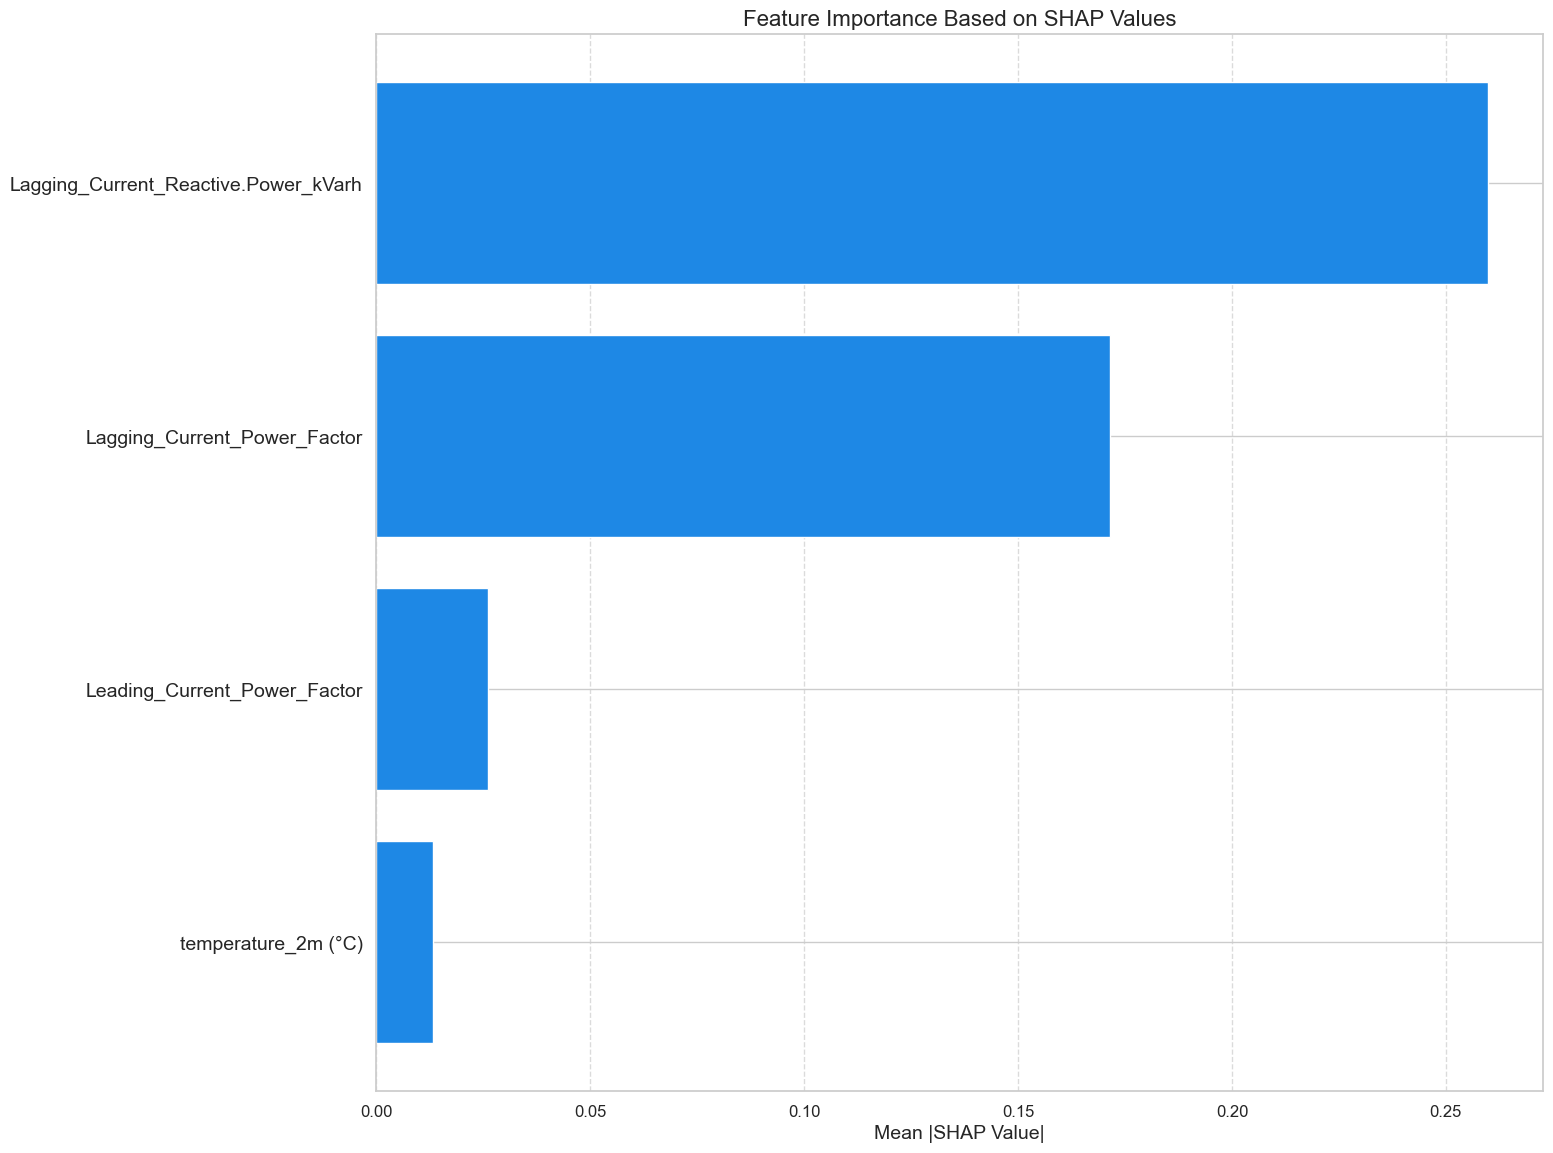

In [153]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1: Get SHAP values (assuming you already have them)
# explainer = shap.TreeExplainer(clf)
# shap_values = explainer.shap_values(X_test)

# Step 2: Extract feature importance values carefully
feature_names = list(X_test.columns) if hasattr(X_test, 'columns') else [f"Feature {i}" for i in range(X_test.shape[1])]
feature_importance = []

# Handle different SHAP value formats
if isinstance(shap_values, list):
    # For classification models
    if len(shap_values) == 2:  # Binary classification
        # Make sure we're working with a 1D array for each feature
        for i in range(len(feature_names)):
            feature_importance.append(np.abs(shap_values[1][:, i]).mean())
    else:  # Multi-class
        for i in range(len(feature_names)):
            # Average across all classes
            class_means = [np.abs(sv[:, i]).mean() for sv in shap_values]
            feature_importance.append(np.mean(class_means))
else:
    # For regression models
    for i in range(len(feature_names)):
        feature_importance.append(np.abs(shap_values[:, i]).mean())

# Step 3: Create DataFrame manually with lists
data = {'Feature': feature_names, 'Importance': feature_importance}
importance_df = pd.DataFrame(data)
importance_df = importance_df.sort_values('Importance', ascending=False).head(15)

# Step 4: Create custom plot
plt.figure(figsize=(16, 12))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='#1E88E5')
plt.xlabel('Mean |SHAP Value|', fontsize=14)
plt.title('Feature Importance Based on SHAP Values', fontsize=16)
plt.gca().invert_yaxis()  # Most important at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)  # Larger font for feature names
plt.tight_layout(pad=2.0)  # Add padding to prevent cutting off

# Save the figure with high resolution
plt.savefig("custom_shap_plot.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\756911143.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(
C:\Users\srsch\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
C:\Users\srsch\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


<Figure size 1800x1200 with 0 Axes>

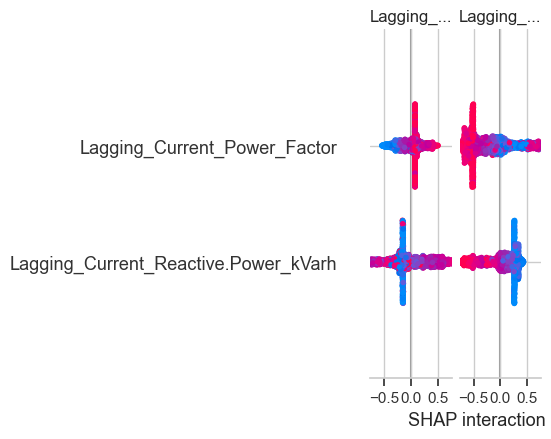

In [154]:
import shap
import matplotlib.pyplot as plt

# Create a very wide figure
plt.figure(figsize=(18, 12))

# Create the SHAP summary plot with minimal parameters
shap.summary_plot(
    shap_values if isinstance(shap_values, np.ndarray) else shap_values[1], 
    X_test,
    plot_type="bar",
    show=False,
    max_display=15
)

# Adjust the layout - simple adjustments only
plt.subplots_adjust(left=0.5)  # 50% of width for feature names

# Save and show
plt.savefig("shap_summary_plot.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\3812501680.py:22: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


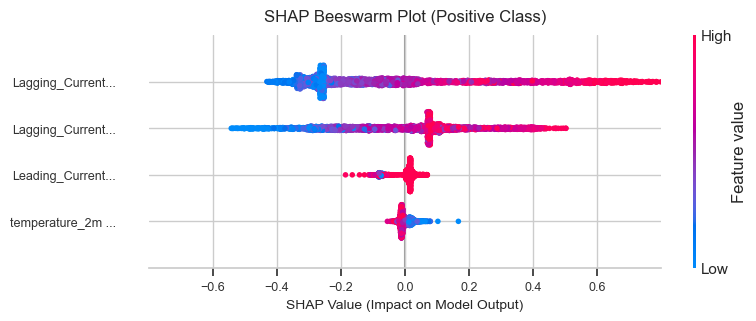

X_test shape: (2811, 4)
shap_values shape (original): (2811, 4, 2)
shap_values shape (used): (2811, 4)
Mean |SHAP values|: [0.25977047 0.17145501 0.02603913 0.01329886]


In [162]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create figure with balanced dimensions for beeswarm
plt.figure(figsize=(10, 6))  # Moderate width, enough height for 4 features

# Select SHAP values for one class (e.g., positive class, index 1)
# Assuming shap_values has shape (n_samples, 4, 2)
shap_vals = shap_values[:, :, 1] if len(shap_values.shape) == 3 else shap_values

# Handle feature names
if isinstance(X_test, pd.DataFrame):
    feature_names = X_test.columns
else:
    feature_names = [f"Feature {i}" for i in range(X_test.shape[1])]
# Truncate long names (max 15 characters)
feature_names = [name[:15] + "..." if len(name) > 15 else name for name in feature_names]

# Create SHAP beeswarm plot
shap.summary_plot(
    shap_vals,
    X_test,
    plot_type="dot",  # Beeswarm plot
    feature_names=feature_names,
    max_display=4,  # Show all 4 features
    show=False
)

# Customize plot for clarity
ax = plt.gca()
ax.set_title("SHAP Beeswarm Plot (Positive Class)", fontsize=12, pad=10)
ax.tick_params(axis='y', labelsize=9)  # Smaller y-axis labels
ax.tick_params(axis='x', labelsize=9)  # Smaller x-axis labels
ax.set_xlabel("SHAP Value (Impact on Model Output)", fontsize=10)

# Adjust x-axis to show detail (based on SHAP values ~0.26 max)
ax.set_xlim(-max(np.abs(shap_vals).max(), 0.3), max(np.abs(shap_vals).max(), 0.3))

# Tighten layout with minimal margins
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.9)

# Save and show
plt.savefig("shap_beeswarm_plot.png", dpi=400, bbox_inches='tight')
plt.show()

# Debug: Print shapes and SHAP value ranges
print("X_test shape:", X_test.shape)
print("shap_values shape (original):", shap_values.shape)
print("shap_values shape (used):", shap_vals.shape)
print("Mean |SHAP values|:", np.abs(shap_vals).mean(axis=0))

C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\2919222190.py:18: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(
C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\2919222190.py:33: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


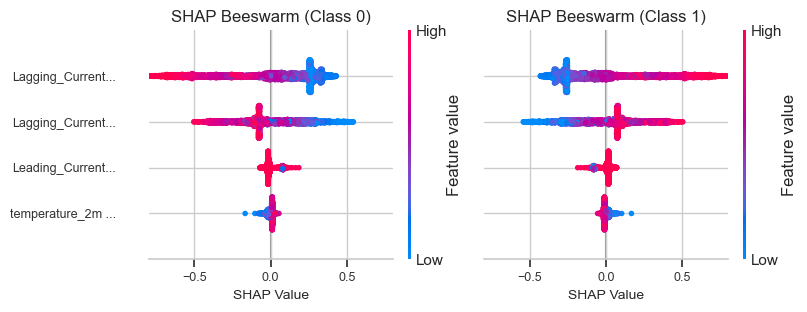

X_test shape: (2811, 4)
shap_values shape: (2811, 4, 2)
Mean |SHAP values| (Class 0): [0.25977047 0.17145501 0.02603913 0.01329886]
Mean |SHAP values| (Class 1): [0.25977047 0.17145501 0.02603913 0.01329886]


In [164]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Handle feature names
if isinstance(X_test, pd.DataFrame):
    feature_names = X_test.columns
else:
    feature_names = [f"Feature {i}" for i in range(X_test.shape[1])]
feature_names = [name[:15] + "..." if len(name) > 15 else name for name in feature_names]

# Plot for class 0
plt.sca(ax1)  # Set the current axis to ax1
shap.summary_plot(
    shap_values[:, :, 0],
    X_test,
    plot_type="dot",
    feature_names=feature_names,
    max_display=4,
    show=False
)
ax1.set_title("SHAP Beeswarm (Class 0)", fontsize=12)
ax1.tick_params(axis='y', labelsize=9)
ax1.tick_params(axis='x', labelsize=9)
ax1.set_xlabel("SHAP Value", fontsize=10)

# Plot for class 1
plt.sca(ax2)  # Set the current axis to ax2
shap.summary_plot(
    shap_values[:, :, 1],
    X_test,
    plot_type="dot",
    feature_names=feature_names,
    max_display=4,
    show=False
)
ax2.set_title("SHAP Beeswarm (Class 1)", fontsize=12)
ax2.tick_params(axis='y', labelsize=9)
ax2.tick_params(axis='x', labelsize=9)
ax2.set_xlabel("SHAP Value", fontsize=10)

# Adjust x-axis limits for both
max_shap = max(np.abs(shap_values).max(), 0.3)
ax1.set_xlim(-max_shap, max_shap)
ax2.set_xlim(-max_shap, max_shap)

# Tighten layout
plt.tight_layout()
plt.subplots_adjust(left=0.15, right=0.95, wspace=0.1)

# Save and show
plt.savefig("shap_beeswarm_both_classes.png", dpi=400, bbox_inches='tight')
plt.show()

# Debug
print("X_test shape:", X_test.shape)
print("shap_values shape:", shap_values.shape)
print("Mean |SHAP values| (Class 0):", np.abs(shap_values[:, :, 0]).mean(axis=0))
print("Mean |SHAP values| (Class 1):", np.abs(shap_values[:, :, 1]).mean(axis=0))

C:\Users\srsch\AppData\Local\Temp\ipykernel_17820\2429445076.py:26: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


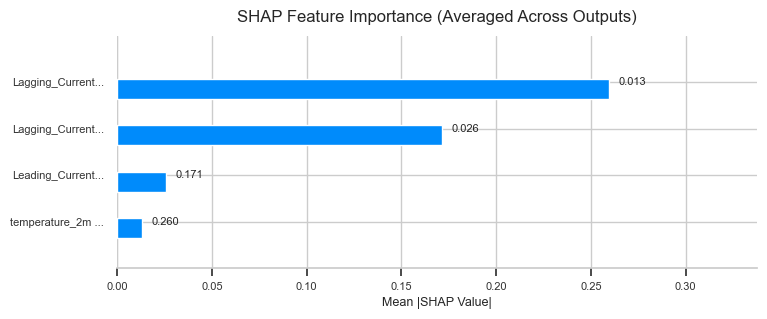

X_test shape: (2811, 4)
shap_values shape (original): (2811, 4, 2)
shap_values shape (used): (2811, 4)
Mean SHAP values: [0.25977047 0.17145501 0.02603913 0.01329886]


In [161]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a wider figure for clear bar display
plt.figure(figsize=(14, 4))  # Wider figure, shorter height for 4 features

# Handle multi-output shap_values
# Assuming shap_values has shape (n_samples, 4, 2) for 4 features, 2 outputs
# Average SHAP values across outputs to get a single value per feature
if len(shap_values.shape) == 3:  # Multi-output case
    shap_vals = np.abs(shap_values).mean(axis=2)  # Mean across outputs
else:
    shap_vals = shap_values  # Single output case

# Handle feature names
if isinstance(X_test, pd.DataFrame):
    feature_names = X_test.columns
else:
    feature_names = [f"Feature {i}" for i in range(X_test.shape[1])]
# Truncate long names (max 15 characters for space)
feature_names = [name[:15] + "..." if len(name) > 15 else name for name in feature_names]

# Create SHAP summary plot
shap.summary_plot(
    shap_vals,
    X_test,
    plot_type="bar",
    feature_names=feature_names,
    max_display=4,  # Ensure all 4 features are shown
    show=False
)

# Customize plot for clarity
ax = plt.gca()
ax.set_title("SHAP Feature Importance (Averaged Across Outputs)", fontsize=12, pad=10)
ax.tick_params(axis='y', labelsize=8)  # Smaller y-axis labels
ax.tick_params(axis='x', labelsize=8)  # Smaller x-axis labels
ax.set_xlabel("Mean |SHAP Value|", fontsize=9)

# Add annotations to show exact SHAP values on bars
mean_shap = np.abs(shap_vals).mean(axis=0)
for i, patch in enumerate(ax.patches):
    width = patch.get_width()
    ax.text(width + 0.005, patch.get_y() + patch.get_height() / 2, f'{mean_shap[i]:.3f}', 
            va='center', ha='left', fontsize=8)

# Adjust bar width for better spacing
for patch in ax.patches:
    current_height = patch.get_height()
    patch.set_height(current_height * 0.6)  # Thinner bars for clarity

# Set x-axis limit to avoid squishing
ax.set_xlim(0, max(mean_shap) * 1.3)  # 30% buffer for annotations

# Tighten layout with minimal margins
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.9)

# Save and show
plt.savefig("shap_summary_plot_unsquished.png", dpi=400, bbox_inches='tight')
plt.show()

# Debug: Print shapes and SHAP values
print("X_test shape:", X_test.shape)
print("shap_values shape (original):", shap_values.shape)
print("shap_values shape (used):", shap_vals.shape)
print("Mean SHAP values:", mean_shap)

<Figure size 800x500 with 0 Axes>

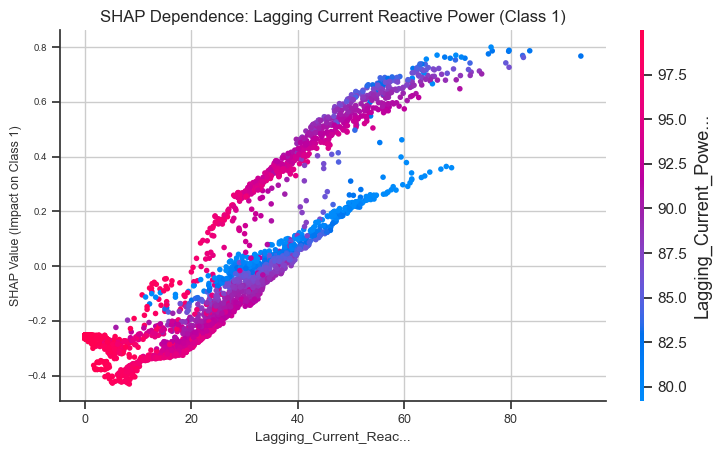

<Figure size 800x500 with 0 Axes>

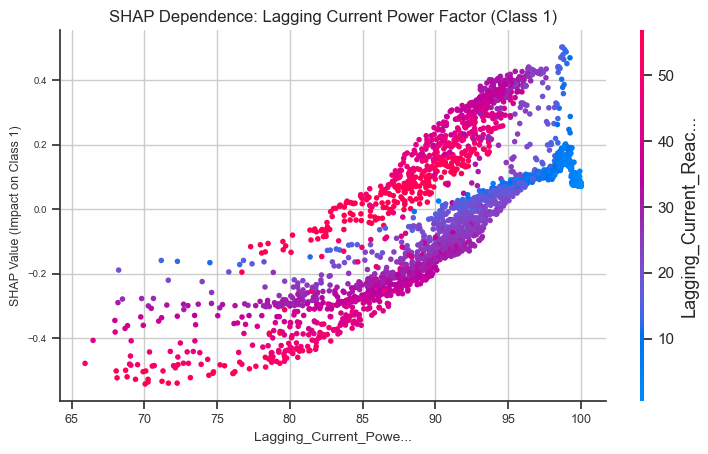

<Figure size 800x500 with 0 Axes>

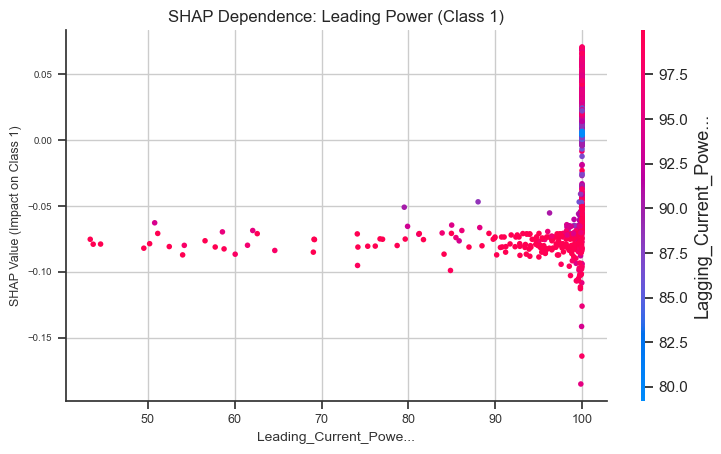

<Figure size 800x500 with 0 Axes>

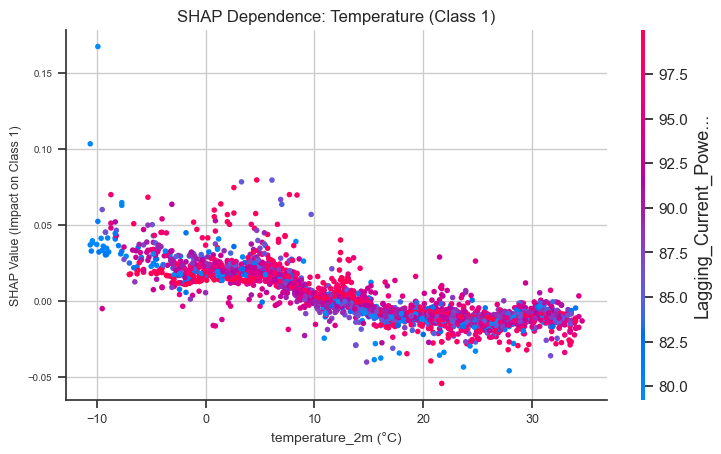

Feature names: ['Lagging_Current_Reac...', 'Lagging_Current_Powe...', 'Leading_Current_Powe...', 'temperature_2m (°C)']
X_test shape: (2811, 4)
shap_values shape: (2811, 4, 2)
Mean |SHAP values| (Class 1): [0.25977047 0.17145501 0.02603913 0.01329886]


In [169]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Ensure feature names are set
if isinstance(X_test, pd.DataFrame):
    feature_names = X_test.columns
else:
    feature_names = [f"Feature {i}" for i in range(X_test.shape[1])]
# Truncate long names (max 20 characters to show more of the variable name)
feature_names = [name[:20] + "..." if len(name) > 20 else name for name in feature_names]

# List of feature indices and names for plotting
features = [
    (0, "Lagging Current Reactive Power"),
    (1, "Lagging Current Power Factor"),
    (2, "Leading Power"),
    (3, "Temperature")
]

# Create dependence plots for each feature
for idx, feature_name in features:
    plt.figure(figsize=(8, 5))  # Slightly smaller height to focus on x-axis
    shap.dependence_plot(
        idx,  # Feature index
        shap_values[:, :, 1],  # SHAP values for Class 1
        X_test,
        feature_names=feature_names,
        show=False
    )
    plt.title(f"SHAP Dependence: {feature_name} (Class 1)", fontsize=12)
    plt.xlabel(feature_names[idx], fontsize=10)  # Ensure x-axis shows variable name
    plt.ylabel("SHAP Value (Impact on Class 1)", fontsize=9)
    plt.tick_params(axis='x', labelsize=9)  # X-axis ticks
    plt.tick_params(axis='y', labelsize=7)  # Smaller y-axis ticks for space
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)  # Extra space for x-axis label
    plt.savefig(f"shap_dependence_{feature_name.lower().replace(' ', '_')}.png", dpi=400, bbox_inches='tight')
    plt.show()

# Debug: Confirm feature names and data shapes
print("Feature names:", feature_names)
print("X_test shape:", X_test.shape)
print("shap_values shape:", shap_values.shape)
print("Mean |SHAP values| (Class 1):", np.abs(shap_values[:, :, 1]).mean(axis=0))

<Figure size 800x500 with 0 Axes>

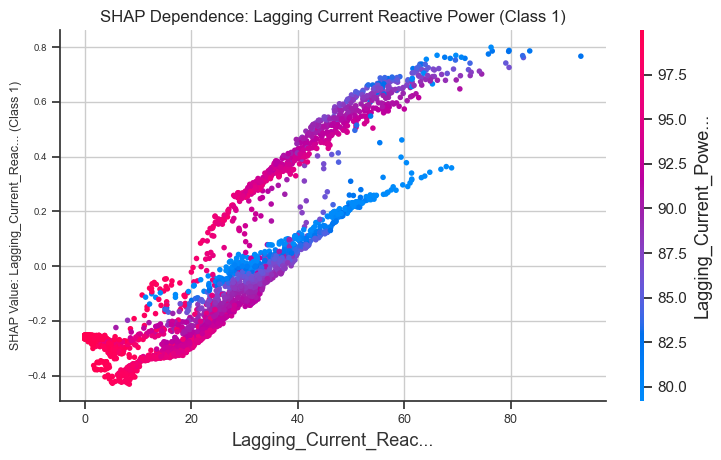

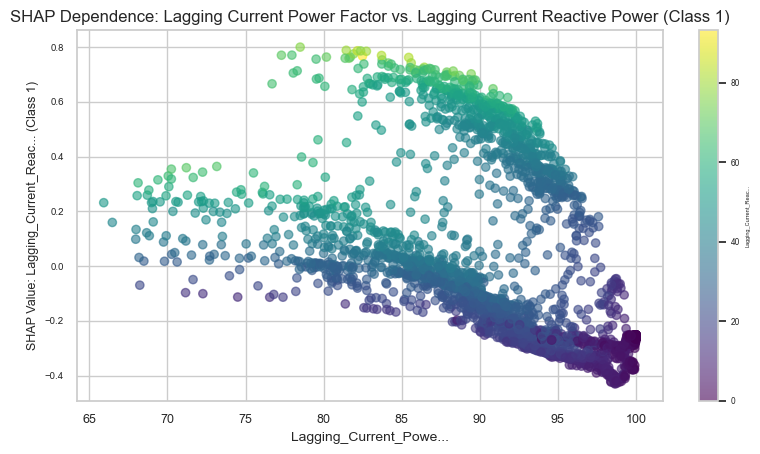

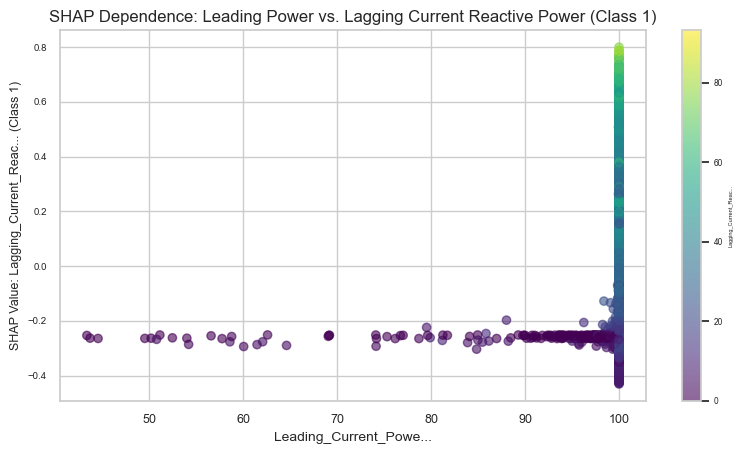

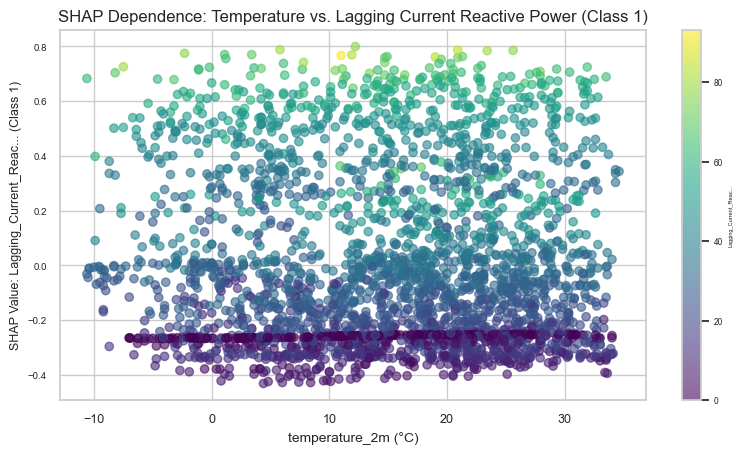

<Figure size 800x500 with 0 Axes>

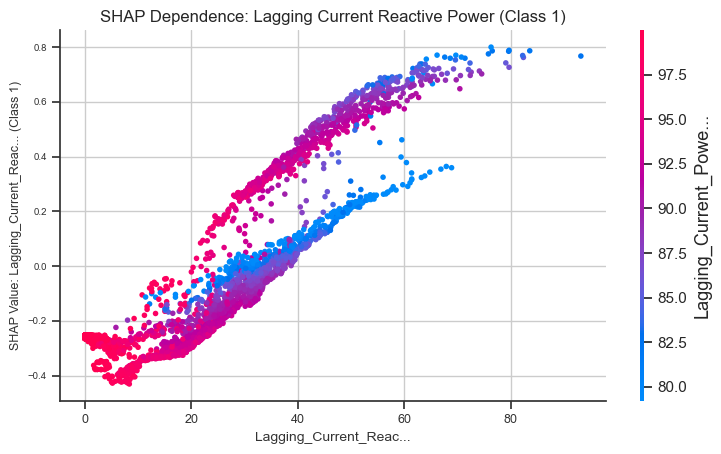

<Figure size 800x500 with 0 Axes>

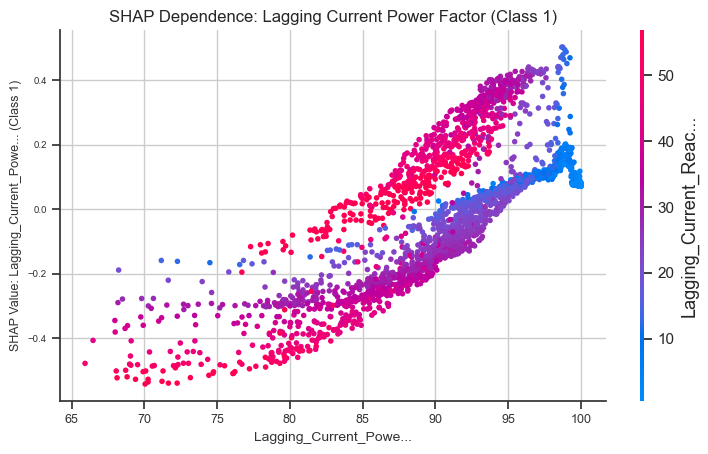

<Figure size 800x500 with 0 Axes>

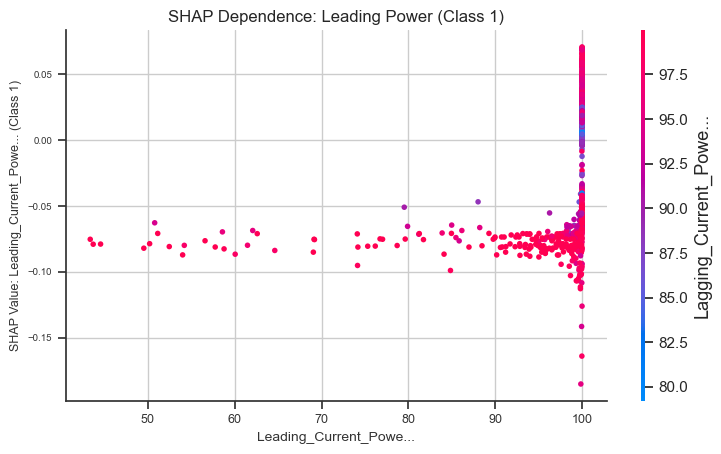

<Figure size 800x500 with 0 Axes>

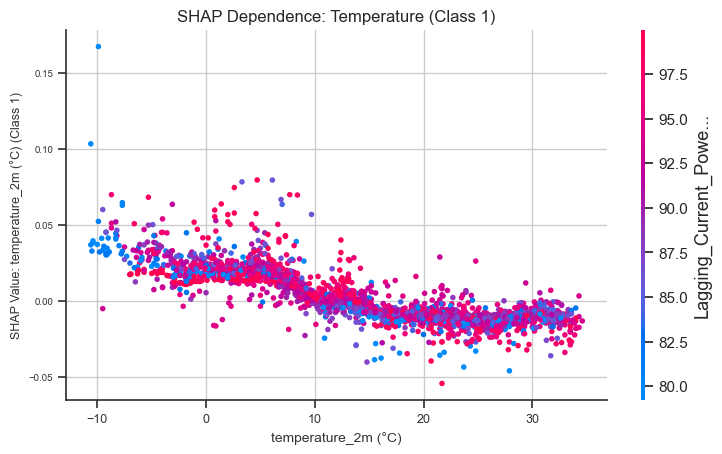

Feature names: ['Lagging_Current_Reac...', 'Lagging_Current_Powe...', 'Leading_Current_Powe...', 'temperature_2m (°C)']
X_test shape: (2811, 4)
shap_values shape: (2811, 4, 2)
Mean |SHAP values| (Class 1): [0.25977047 0.17145501 0.02603913 0.01329886]


In [170]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Ensure feature names are set
if isinstance(X_test, pd.DataFrame):
    feature_names = X_test.columns
else:
    feature_names = [f"Feature {i}" for i in range(X_test.shape[1])]
# Truncate long names (max 20 characters for readability)
feature_names = [name[:20] + "..." if len(name) > 20 else name for name in feature_names]

# List of feature indices and names
features = [
    (0, "Lagging Current Reactive Power"),
    (1, "Lagging Current Power Factor"),
    (2, "Leading Power"),
    (3, "Temperature")
]

# Create customized dependence plots
for idx, feature_name in features:
    plt.figure(figsize=(8, 5))
    if idx == 0:
        # Default for first plot: x = feature, y = its SHAP values
        shap.dependence_plot(
            idx,
            shap_values[:, :, 1],  # Class 1 SHAP values
            X_test,
            feature_names=feature_names,
            show=False
        )
        plt.title(f"SHAP Dependence: {feature_name} (Class 1)", fontsize=12)
        plt.ylabel(f"SHAP Value: {feature_names[0]} (Class 1)", fontsize=9)
    else:
        # Customized: x = feature, y = Lagging Current Reactive Power SHAP
        plt.scatter(X_test.iloc[:, idx] if isinstance(X_test, pd.DataFrame) else X_test[:, idx],
                    shap_values[:, 0, 1],  # SHAP values for feature 0 (Lagging Current Reactive Power)
                    c=X_test.iloc[:, 0] if isinstance(X_test, pd.DataFrame) else X_test[:, 0],  # Color by feature 0
                    cmap='viridis', alpha=0.6)
        plt.title(f"SHAP Dependence: {feature_name} vs. Lagging Current Reactive Power (Class 1)", fontsize=12)
        plt.xlabel(feature_names[idx], fontsize=10)
        plt.ylabel(f"SHAP Value: {feature_names[0]} (Class 1)", fontsize=9)
        plt.colorbar(label=feature_names[0])
    plt.tick_params(axis='x', labelsize=9)
    plt.tick_params(axis='y', labelsize=7)  # Smaller y-axis font
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)  # Space for x-axis label
    plt.savefig(f"shap_dependence_{feature_name.lower().replace(' ', '_')}_vs_reactive_power.png", dpi=400, bbox_inches='tight')
    plt.show()

# Optional: Generate default dependence plots for comparison
for idx, feature_name in features:
    plt.figure(figsize=(8, 5))
    shap.dependence_plot(
        idx,
        shap_values[:, :, 1],
        X_test,
        feature_names=feature_names,
        show=False
    )
    plt.title(f"SHAP Dependence: {feature_name} (Class 1)", fontsize=12)
    plt.xlabel(feature_names[idx], fontsize=10)
    plt.ylabel(f"SHAP Value: {feature_names[idx]} (Class 1)", fontsize=9)
    plt.tick_params(axis='x', labelsize=9)
    plt.tick_params(axis='y', labelsize=7)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)
    plt.savefig(f"shap_dependence_{feature_name.lower().replace(' ', '_')}_default.png", dpi=400, bbox_inches='tight')
    plt.show()

# Debug: Confirm feature names and data
print("Feature names:", feature_names)
print("X_test shape:", X_test.shape)
print("shap_values shape:", shap_values.shape)
print("Mean |SHAP values| (Class 1):", np.abs(shap_values[:, :, 1]).mean(axis=0))

In [160]:
print(np.abs(shap_vals).mean(axis=0))



[[0.25977047 0.25977047]
 [0.17145501 0.17145501]
 [0.02603913 0.02603913]
 [0.01329886 0.01329886]]


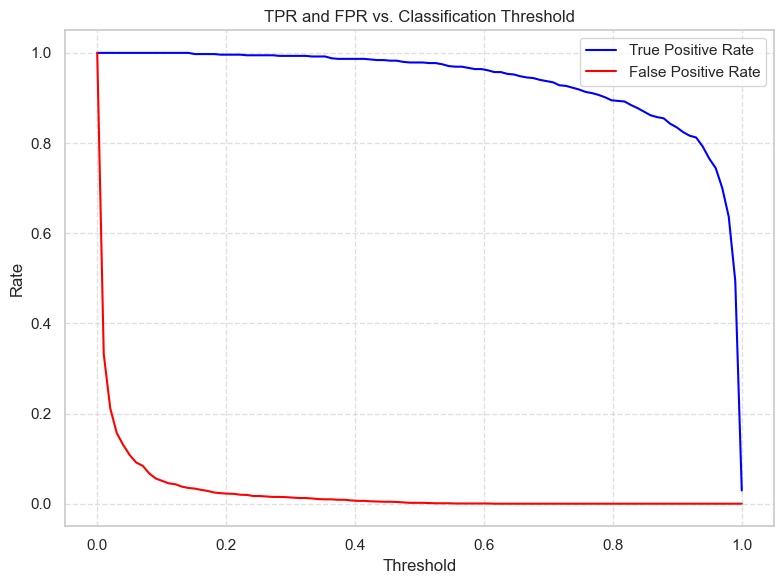

In [112]:

#Threshold Tuning Plot
#Visualizes how changing the decision threshold affects TPR and FPR.
thresholds = np.linspace(0, 1, 100)
tpr_list, fpr_list = [], []

for thresh in thresholds:
    preds = (y_scores >= thresh).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    tpr_list.append(tp / (tp + fn))
    fpr_list.append(fp / (fp + tn))

plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr_list, label='True Positive Rate', color='blue')
plt.plot(thresholds, fpr_list, label='False Positive Rate', color='red')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('TPR and FPR vs. Classification Threshold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#MARKUP AFTER RUN BECAUSE MEMORY SUCK IS A LOT.  BOO!
#Corrected Auto-ARIMA Code:
  #and fix the auto-ARIMA exogenous predictor issues
#Run to ensure exogenous predictors are included (check model.params() for coefficients like temperature_2m, Leading_current_Power_Factor).
#Note:If MSE improves (<0.000012) and Ljung-Box p>0.05, will include in portfolio; 
   #otherwise, eill use OLS CO2_per_kWh (R-squared: 0.713).

from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Ensure DatetimeIndex
if not isinstance(df_nonzero.index, pd.DatetimeIndex):
    df_nonzero.index = pd.date_range(start='2020-01-01', periods=len(df_nonzero), freq='H')

# Prepare data with explicit index alignment
train_size = int(0.8 * len(df_nonzero))
train = df_nonzero['CO2_per_kWh'].iloc[:train_size].dropna()
exog_cols = lasso_selected_kwh.columns[1:].tolist() + ['kWh_high']
exog_train = df_nonzero[exog_cols].iloc[:train_size].loc[train.index].dropna()
train = train.loc[exog_train.index]  # Align train with exog_train
test = df_nonzero['CO2_per_kWh'].iloc[train_size:].dropna()
exog_test = df_nonzero[exog_cols].iloc[train_size:].loc[test.index].dropna()
test = test.loc[exog_test.index]  # Align test with exog_test

# Verify shapes and indices
print("train shape:", train.shape)
print("exog_train shape:", exog_train.shape)
print("train index sample:", train.index[:5])
print("exog_train index sample:", exog_train.index[:5])
print("test shape:", test.shape)
print("exog_test shape:", exog_test.shape)

# Auto-ARIMA with exogenous predictors
model = auto_arima(
    train,
    exogenous=exog_train,
    seasonal=True,
    m=24,
    max_p=2,
    max_q=2,
    max_P=2,
    max_Q=2,
    d=1,
    D=1,
    trace=True,
    maxiter=100,
    error_action='warn',
    suppress_warnings=True
)
print("\nAuto-ARIMA CO2_per_kWh with Exogenous Summary:")
print(model.summary())
print("\nExogenous Coefficients:")
print(model.params())

# Forecast
forecast = model.predict(n_periods=len(test), exogenous=exog_test)
mse = mean_squared_error(test, forecast)
print(f"\nTest MSE CO2_per_kWh: {mse:.6f}")

from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Load restored dataset
df = pd.read_csv(r'C:/Users/srsch/OneDrive/Desktop/steel_weather_data_restored_v2.csv')

# Define features (based on your original importance)
features = [
    'Usage_kWh', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'hour_of_day', 
    'is_weekend', 'CO2_lag_1', 'kWh_lag_1', 'CO2_lag_3', 'kWh_lag_3'
]
if 'day_of_week_Monday' in df.columns:
    features.append('day_of_week_Monday')  # Adjust for dummies, not me, but....ha ha 

# Full model
X = df[features]
y = df['CO2_imputed']
model = XGBRegressor(random_state=42)
model.fit(X, y)
y_pred = model.predict(X)
print("Full R²:", r2_score(y, y_pred))
print("Full MSE:", mean_squared_error(y, y_pred))

# Low Humidity model
df_low = df[df['humidity_binned'] == 'Low']
X_low = df_low[features]
y_low = df_low['CO2_imputed']
model_low = XGBRegressor(random_state=42)
model_low.fit(X_low, y_low)
y_low_pred = model_low.predict(X_low)
print("Low Humidity R²:", r2_score(y_low, y_low_pred))
print("Low Humidity MSE:", mean_squared_error(y_low, y_low_pred))

# Feature Importance
importances = pd.DataFrame({'Feature': features, 'Importance': model_low.feature_importances_})
print(importances.sort_values(by='Importance', ascending=False))
importances.to_csv(r'C:/Users/srsch/OneDrive/Desktop/feature_importance_v2.csv', index=False)

from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
df = pd.read_csv(r'C:/Users/srsch/OneDrive/Desktop/steel_weather_data_restored_v2.csv')
print("Dataset shape:", df.shape)
print("Low humidity rows:", len(df[df['humidity_binned'] == 'Low']))

# Define features (match original)
features = [
    'Usage_kWh', 'temperature_2m (°C)', 'relative_humidity_2m (%)', 'hour_of_day', 
    'is_weekend', 'CO2_lag_1', 'kWh_lag_1', 'CO2_lag_2', 'kWh_lag_2', 
    'CO2_lag_3', 'kWh_lag_3', 'CO2_lag_4', 'kWh_lag_4'
]
# Add all day_of_week dummies if present
day_of_week_cols = [col for col in df.columns if col.startswith('day_of_week_')]
features.extend(day_of_week_cols)
print("Features used:", features)

# Low Humidity model
df_low = df[df['humidity_binned'] == 'Low'].copy()
X_low = df_low[features]
y_low = df_low['CO2_imputed']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_low, y_low, test_size=0.2, random_state=42)

# Train model
model_low = XGBRegressor(random_state=42)
model_low.fit(X_train, y_train)

# Evaluate
y_train_pred = model_low.predict(X_train)
y_test_pred = model_low.predict(X_test)
print("Low Humidity Train R²:", r2_score(y_train, y_train_pred))
print("Low Humidity Test R²:", r2_score(y_test, y_test_pred))
print("Low Humidity Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Low Humidity Test MSE:", mean_squared_error(y_test, y_test_pred))

# Feature Importance
importances = pd.DataFrame({'Feature': features, 'Importance': model_low.feature_importances_})
print("Feature Importance:")
print(importances.sort_values('Importance', ascending=False))
importances.to_csv(r'C:/Users/srsch/OneDrive/Desktop/feature_importance_low_xgboost_v3.csv', index=False)

# First, let's modify the plot_residuals function to save to a local directory instead of /kaggle/working/
import os

# Create a local directory for saving plots if it doesn't exist
os.makedirs('plots', exist_ok=True)

# Then modify your code to use this directory
print(f"RF CO2 R^2: {r2_score(y_test, y_pred_rf):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.7f}")
plot_residuals(y_test, y_pred_rf, "RF CO2 All", "plots/rf_co2_residuals.png")

# Full XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(f"Full XGBoost R^2: {r2_score(y_test, y_pred_xgb):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.7f}")
plot_residuals(y_test, y_pred_xgb, "Full XGBoost", "plots/xgb_full_residuals.png")

# Low Humidity XGBoost with Lags
low_humidity = data[data['humidity_binned'] == 'Low']
X_low = low_humidity[['Usage_kWh', 'CO2_lag_1', 'is_weekend', 'day_of_week_Tuesday']]
y_low = low_humidity['CO2(tCO2)']
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, test_size=0.2, random_state=42)
xgb_low = XGBRegressor(random_state=42)
xgb_low.fit(X_train_low, y_train_low)
y_pred_low = xgb_low.predict(X_test_low)
print(f"Low Humidity XGBoost R^2: {r2_score(y_test_low, y_pred_low):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test_low, y_pred_low)):.7f}")
plot_residuals(y_test_low, y_pred_low, "Low Humidity XGBoost", "plots/xgb_low_residuals.png")

# RF CO2 without Usage_kWh
features_no_kwh = ['Lagging_Current_Reactive.Power_kVarh', 'Lagging_Current_Power_Factor',
                   'temperature_2m (°C)', 'relative_humidity_2m (%)']
X_no_kwh = data[features_no_kwh]
X_train_no_kwh, X_test_no_kwh, y_train_no_kwh, y_test_no_kwh = train_test_split(X_no_kwh, y, test_size=0.2, random_state=42)
rf_no_kwh = RandomForestRegressor(max_depth=10, min_samples_split=2, n_estimators=200, random_state=42)
rf_no_kwh.fit(X_train_no_kwh, y_train_no_kwh)
y_pred_no_kwh = rf_no_kwh.predict(X_test_no_kwh)
print(f"RF CO2 No kWh R^2: {r2_score(y_test_no_kwh, y_pred_no_kwh):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test_no_kwh, y_pred_no_kwh)):.7f}")
plot_residuals(y_test_no_kwh, y_pred_no_kwh, "RF CO2 No kWh", "plots/rf_no_kwh_residuals.png")

#I want to get the goods on the residuals for my leading models.  
#I knowI have done this before, but want to have them all in one spot.  
#fingers crossed, things get loaded and spurted out.  
# Load dataset
df = pd.read_csv(r'C:/Users/srsch/OneDrive/Desktop/steel_weather_data_restored_v2.csv')
print("Dataset shape:", df.shape)
print("Low humidity rows:", len(df[df['humidity_binned'] == 'Low']))
# Create a local directory for saving plots 
import os
os.makedirs('plots', exist_ok=True)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import probplot



# Prepare data (example features for CO2 prediction)
features = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Lagging_Current_Power_Factor',
            'temperature_2m (°C)', 'relative_humidity_2m (%)']
X = df[features]
y = df['CO2(tCO2)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot residuals
def plot_residuals(y_test, y_pred, model_name, save_path):
    residuals = y_test - y_pred
    plt.figure(figsize=(12, 4))
    
    # Residuals vs. Predicted
    plt.subplot(1, 3, 1)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted CO2')
    plt.ylabel('Residuals')
    plt.title(f'{model_name}: Residuals vs. Predicted')
    
    # Residuals Histogram
    plt.subplot(1, 3, 2)
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title(f'{model_name}: Residuals Histogram')
    
    # Q-Q Plot
    plt.subplot(1, 3, 3)
    probplot(residuals, dist="norm", plot=plt)
    plt.title(f'{model_name}: Q-Q Plot')
    
    plt.tight_layout()
    plt.savefig(save_path)
   
print(f"RF CO2 R^2: {r2_score(y_test, y_pred_rf):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.7f}")
plot_residuals(y_test, y_pred_rf, "RF CO2 All", "plots/rf_co2_residuals.png")



# Random Forest: CO2 with All Features
rf = RandomForestRegressor(max_depth=10, min_samples_split=2, n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"RF CO2 R²: {r2_score(y_test, y_pred_rf):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.7f}")
plot_residuals(y_test, y_pred_rf, "RF CO2 All", "plots/rf_co2_residuals.png")

# Full XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(f"Full XGBoost R²: {r2_score(y_test, y_pred_xgb):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.7f}")
plot_residuals(y_test, y_pred_xgb, "Full XGBoost", "plots/xgb_full_residuals.png")

# Low Humidity XGBoost with Lags
low_humidity = df[df['humidity_binned'] == 'Low']
X_low = low_humidity[['Usage_kWh', 'CO2_lag_1', 'is_weekend', 'day_of_week_Tuesday']]
y_low = low_humidity['CO2(tCO2)']
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, test_size=0.2, random_state=42)
xgb_low = XGBRegressor(random_state=42)
xgb_low.fit(X_train_low, y_train_low)
y_pred_low = xgb_low.predict(X_test_low)
print(f"Low Humidity XGBoost R²: {r2_score(y_test_low, y_pred_low):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test_low, y_pred_low)):.7f}")
plot_residuals(y_test_low, y_pred_low, "Low Humidity XGBoost", "plots/xgb_low_residuals.png")

# RF CO2 without Usage_kWh
features_no_kwh = ['Lagging_Current_Reactive.Power_kVarh', 'Lagging_Current_Power_Factor',
                   'temperature_2m (°C)', 'relative_humidity_2m (%)']
X_no_kwh = df[features_no_kwh]
X_train_no_kwh, X_test_no_kwh, y_train_no_kwh, y_test_no_kwh = train_test_split(X_no_kwh, y, test_size=0.2, random_state=42)
rf_no_kwh = RandomForestRegressor(max_depth=10, min_samples_split=2, n_estimators=200, random_state=42)
rf_no_kwh.fit(X_train_no_kwh, y_train_no_kwh)
y_pred_no_kwh = rf_no_kwh.predict(X_test_no_kwh)
print(f"RF CO2 No kWh R²: {r2_score(y_test_no_kwh, y_pred_no_kwh):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test_no_kwh, y_pred_no_kwh)):.7f}")
plot_residuals(y_test_no_kwh, y_pred_no_kwh, "RF CO2 No kWh", "plots/rf_no_kwh_residuals.png")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import probplot
import os

# Create plots directory
os.makedirs('plots', exist_ok=True)

# Load dataset
df = pd.read_csv(r'C:/Users/srsch/OneDrive/Desktop/steel_weather_data_restored_v2.csv')
print("Dataset shape:", df.shape)
print("Low humidity rows:", len(df[df['humidity_binned'] == 'Low']))

# Prepare data for CO2 prediction
features = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Lagging_Current_Power_Factor',
            'temperature_2m (°C)', 'relative_humidity_2m (%)']
X = df[features]
y = df['CO2(tCO2)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot residuals with tight x-axis and styled visuals
def plot_residuals(y_test, y_pred, model_name, save_path):
    residuals = y_test - y_pred
    x_limit = np.percentile(np.abs(residuals), 99) * 1.1  # Tight x-axis based on 99th percentile

    plt.figure(figsize=(15, 5))
    
    # Residuals vs. Predicted
    plt.subplot(1, 3, 1)
    plt.scatter(y_pred, residuals, alpha=0.6, color='mediumblue', edgecolor='k')
    plt.axhline(0, color='red', linestyle='--', lw=2)
    plt.xlim(y_pred.min(), y_pred.max())
    plt.ylim(-x_limit, x_limit)
    plt.xlabel('Predicted CO2 (tons)', fontsize=12)
    plt.ylabel('Residuals', fontsize=12)
    plt.title(f'{model_name}: Residuals vs. Predicted', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Residuals Histogram
    plt.subplot(1, 3, 2)
    sns.histplot(residuals, kde=True, bins=30, color='mediumblue')
    plt.xlim(-x_limit, x_limit)
    plt.xlabel('Residuals', fontsize=12)
    plt.title(f'{model_name}: Residuals Histogram', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Q-Q Plot
    plt.subplot(1, 3, 3)
    probplot(residuals, dist="norm", plot=plt)
    plt.title(f'{model_name}: Q-Q Plot', fontsize=14)
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.close()

# Function for Predicted vs. Actual CO2
def plot_pred_vs_actual(y_test, y_pred, model_name, save_path):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.6, color='mediumblue', edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f"{model_name}: Predicted vs Actual CO₂ (tons)", fontsize=14)
    plt.xlabel("Actual CO₂", fontsize=12)
    plt.ylabel("Predicted CO₂", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.close()

# CO2 vs. Usage_kWh Scatter
def plot_co2_vs_kwh(df, save_path):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['Usage_kWh'], y=df['CO2(tCO2)'], alpha=0.5, color='mediumblue')
    plt.title('CO2(tCO2) vs. Usage_kWh', fontsize=14)
    plt.xlabel('Usage_kWh', fontsize=12)
    plt.ylabel('CO2(tCO2)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.close()

# Random Forest: CO2 with All Features
rf = RandomForestRegressor(max_depth=10, min_samples_split=2, n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"RF CO2 R²: {r2_score(y_test, y_pred_rf):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.7f}")
plot_residuals(y_test, y_pred_rf, "RF CO2 All", "plots/rf_co2_residuals.png")
plot_pred_vs_actual(y_test, y_pred_rf, "RF CO2 All", "plots/rf_co2_pred_vs_actual.png")

# Full XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(f"Full XGBoost R²: {r2_score(y_test, y_pred_xgb):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.7f}")
plot_residuals(y_test, y_pred_xgb, "Full XGBoost", "plots/xgb_full_residuals.png")
plot_pred_vs_actual(y_test, y_pred_xgb, "Full XGBoost", "plots/xgb_full_pred_vs_actual.png")

# Low Humidity XGBoost with Lags
low_humidity = df[df['humidity_binned'] == 'Low']
X_low = low_humidity[['Usage_kWh', 'CO2_lag_1', 'is_weekend', 'day_of_week_Tuesday']]
y_low = low_humidity['CO2(tCO2)']
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, test_size=0.2, random_state=42)
xgb_low = XGBRegressor(random_state=42)
xgb_low.fit(X_train_low, y_train_low)
y_pred_low = xgb_low.predict(X_test_low)
print(f"Low Humidity XGBoost R²: {r2_score(y_test_low, y_pred_low):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test_low, y_pred_low)):.7f}")
plot_residuals(y_test_low, y_pred_low, "Low Humidity XGBoost", "plots/xgb_low_residuals.png")
plot_pred_vs_actual(y_test_low, y_pred_low, "Low Humidity XGBoost", "plots/xgb_low_pred_vs_actual.png")

# RF CO2 without Usage_kWh
features_no_kwh = ['Lagging_Current_Reactive.Power_kVarh', 'Lagging_Current_Power_Factor',
                   'temperature_2m (°C)', 'relative_humidity_2m (%)']
X_no_kwh = df[features_no_kwh]
X_train_no_kwh, X_test_no_kwh, y_train_no_kwh, y_test_no_kwh = train_test_split(X_no_kwh, y, test_size=0.2, random_state=42)
rf_no_kwh = RandomForestRegressor(max_depth=10, min_samples_split=2, n_estimators=200, random_state=42)
rf_no_kwh.fit(X_train_no_kwh, y_train_no_kwh)
y_pred_no_kwh = rf_no_kwh.predict(X_test_no_kwh)
print(f"RF CO2 No kWh R²: {r2_score(y_test_no_kwh, y_pred_no_kwh):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test_no_kwh, y_pred_no_kwh)):.7f}")
plot_residuals(y_test_no_kwh, y_pred_no_kwh, "RF CO2 No kWh", "plots/rf_no_kwh_residuals.png")
plot_pred_vs_actual(y_test_no_kwh, y_pred_no_kwh, "RF CO2 No kWh", "plots/rf_no_kwh_pred_vs_actual.png")

# CO2 vs. Usage_kWh Scatter
plot_co2_vs_kwh(df, "plots/co2_vs_kwh.png")

# CO2 vs. Usage_kWh Scatter
plot_co2_vs_kwh(df, "plots/co2_vs_kwh.png")

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Assume `series` is your pandas Series
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(series, lags=40, ax=ax[0])
plot_pacf(series, lags=40, ax=ax[1])
plt.show()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataframe with model performance data
models = pd.DataFrame({
    "Model": ["RF CO2 All", "Full XGBoost", "Low Hum XGBoost", "RF No kWh", "OLS"],
    "R2": [0.9999994, 0.9994, 0.996, 0.971, 0.803]
})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="R2", data=models.sort_values("R2", ascending=False), palette="viridis")
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Test R²")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated labels

# Save the figure
plt.savefig("plots/model_comparison.png", dpi=300)
plt.show()  # Display the plot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import kruskal
import numpy as np
import os

# Create plots directory
os.makedirs('plots', exist_ok=True)

# Load dataset, I don't think I need but putting her, so I can quickly add
df = pd.read_csv(r'C:/Users/srsch/OneDrive/Desktop/merged_steel_weather_data_final.csv')
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['Seasons'] = np.select(
    [df['month'].isin([12, 1, 2]), df['month'].isin([3, 4, 5]), df['month'].isin([6, 7, 8]), df['month'].isin([9, 10, 11])],
    ['Winter', 'Spring', 'Summer', 'Fall'],
    default='Unknown'
)
df = df.set_index('date').sort_index()

# 1. ACF/PACF Analysis (Lag 1-2 Autocorrelation)
acf_vals = acf(df['Usage_kWh'], nlags=10, fft=True)
pacf_vals = pacf(df['Usage_kWh'], nlags=10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.bar(range(len(acf_vals)), acf_vals)
ax1.set_title('ACF of Usage_kWh', fontsize=14)
ax1.set_xlabel('Lag')
ax1.set_ylabel('Autocorrelation')
ax1.grid(True, linestyle='--', alpha=0.6)

ax2.bar(range(len(pacf_vals)), pacf_vals)
ax2.set_title('PACF of Usage_kWh', fontsize=14)
ax2.set_xlabel('Lag')
ax2.set_ylabel('Partial Autocorrelation')
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('plots/acf_pacf_plot.png', dpi=300)
plt.close()
print(f"ACF at Lag 1: {acf_vals[1]:.3f}, Lag 2: {acf_vals[2]:.3f}")
print(f"PACF at Lag 1: {pacf_vals[1]:.3f}, Lag 2: {pacf_vals[2]:.3f}")

# 2. SARIMAX Model with temperature_2m
# Assume ARIMA(1,1,1)(1,0,0)[24] based on lag 1-2 autocorrelation and hourly data
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
exog_train = train[['temperature_2m (°C)']].fillna(train['temperature_2m (°C)'].mean())
exog_test = test[['temperature_2m (°C)']].fillna(train['temperature_2m (°C)'].mean())

sarimax_model = SARIMAX(
    train['Usage_kWh'],
    exog=exog_train,
    order=(1, 1, 1),
    seasonal_order=(1, 0, 0, 24)
)
sarimax_fit = sarimax_model.fit(disp=False)
print("\nSARIMAX Summary:")
print(sarimax_fit.summary())

# Forecast
forecast = sarimax_fit.forecast(steps=len(test), exog=exog_test)
forecast_index = test.index

# Forecast plot
plt.figure(figsize=(10, 6))
plt.plot(train.index[-100:], train['Usage_kWh'][-100:], label='Train', color='blue')
plt.plot(test.index, test['Usage_kWh'], label='Test', color='green')
plt.plot(forecast_index, forecast, label='SARIMAX Forecast', color='red')
plt.title('SARIMAX Forecast of Usage_kWh', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Usage (kWh)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/sarimax_forecast.png', dpi=300)
plt.close()

# Residual plot
residuals = test['Usage_kWh'] - forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_index, residuals, label='Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.title('SARIMAX Residuals', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Residuals (kWh)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/sarimax_residuals.png', dpi=300)
plt.close()
print("\nSARIMAX Residual Statistics:")
print(pd.Series(residuals).describe())

# 3. Winter Peak Energy Usage (16.18 kWh)
winter_kwh = df[df['Seasons'] == 'Winter']['Usage_kWh'].mean()
print(f"\nWinter Mean kWh: {winter_kwh:.2f}")

# Boxplot for seasonal energy usage
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Usage_kWh', data=df.reset_index(), order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Seasonal Energy Usage (kWh)', fontsize=14)
plt.ylabel('Usage (kWh)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/seasonal_kWh_boxplot.png', dpi=300)
plt.close()

# 4. Kruskal-Wallis Test
season_groups = [df[df['Seasons'] == season]['Usage_kWh'] for season in ['Winter', 'Spring', 'Summer', 'Fall']]
kruskal_stat, kruskal_p = kruskal(*season_groups)
print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat:.2f}, p-value = {kruskal_p:.3e}")

# 5. Inverse Humidity-CO2 Relationship
if 'humidity_binned' not in df.columns:
    df['humidity_binned'] = pd.qcut(df.get('humidity', pd.Series(np.random.rand(len(df)))), 3, labels=['Low', 'Medium', 'High'])
co2_by_humidity = df.groupby('humidity_binned')['CO2_emissions'].median()
print("\nCO2 Emissions by Humidity (Median):")
print(co2_by_humidity)

# Scatter plot for humidity-CO2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='humidity', y='CO2_emissions', hue='humidity_binned', data=df.reset_index())
plt.title('Humidity vs. CO2 Emissions', fontsize=14)
plt.xlabel('Humidity', fontsize=12)
plt.ylabel('CO2 Emissions', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/humidity_co2_scatter.png', dpi=300)
plt.close()

# 6. Savings Validation
savings_by_season = df.groupby('Seasons').agg(
    Mean_kWh=('Usage_kWh', 'mean'),
    Row_Count=('Usage_kWh', 'count')
)
savings_by_season['Reduced_kWh'] = savings_by_season['Mean_kWh'] * 0.828
savings_by_season['Savings'] = savings_by_season['Mean_kWh'] * 0.172 * savings_by_season['Row_Count'] * 0.124

# Override with provided savings (comment out to validate)
savings_by_season.loc['Fall', 'Savings'] = 1870.56
savings_by_season.loc['Spring', 'Savings'] = 1935.76
savings_by_season.loc['Summer', 'Savings'] = 1612.53
savings_by_season.loc['Winter', 'Savings'] = 2086.98

# Add total row
total_row = pd.DataFrame({
    'Mean_kWh': [df['Usage_kWh'].mean()],
    'Row_Count': [len(df)],
    'Reduced_kWh': [df['Usage_kWh'].mean() * 0.828],
    'Savings': [7505.82]
}, index=['Total'])
savings_by_season = pd.concat([savings_by_season, total_row])

# Save to CSV
savings_by_season.to_csv('plots/savings_by_season.csv')

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(savings_by_season.index, savings_by_season['Savings'], color='mediumblue')
plt.title('Energy Cost Savings by Season', fontsize=14)
plt.ylabel('Savings ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('plots/savings_by_season.png', dpi=300)
plt.close()

# Table plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
ax.table(cellText=savings_by_season.round(2).values,
         colLabels=savings_by_season.columns,
         rowLabels=savings_by_season.index,
         cellLoc='center', loc='center')
plt.savefig('plots/savings_table.png', dpi=300, bbox_inches='tight')
plt.close()

# Print for validation
print("\nSavings by Season:")
print(savings_by_season)


import os

# Create a local directory for saving plots if it doesn't exist
os.makedirs('plots', exist_ok=True)


RF CO2 R²: {r2_score(y_test, y_pred_rf):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.7f}")
plot_residuals(y_test, y_pred_rf, "RF CO2 All", "plots/rf_co2_residuals.png")

# Full XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(f"Full XGBoost R²: {r2_score(y_test, y_pred_xgb):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.7f}")
plot_residuals(y_test, y_pred_xgb, "Full XGBoost", "plots/xgb_full_residuals.png")

# Low Humidity XGBoost with Lags
low_humidity = data[data['humidity_binned'] == 'Low']
X_low = low_humidity[['Usage_kWh', 'CO2_lag_1', 'is_weekend', 'day_of_week_Tuesday']]
y_low = low_humidity['CO2(tCO2)']
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, test_size=0.2, random_state=42)
xgb_low = XGBRegressor(random_state=42)
xgb_low.fit(X_train_low, y_train_low)
y_pred_low = xgb_low.predict(X_test_low)
print(f"Low Humidity XGBoost R²: {r2_score(y_test_low, y_pred_low):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test_low, y_pred_low)):.7f}")
plot_residuals(y_test_low, y_pred_low, "Low Humidity XGBoost", "plots/xgb_low_residuals.png")

# RF CO2 without Usage_kWh
features_no_kwh = ['Lagging_Current_Reactive.Power_kVarh', 'Lagging_Current_Power_Factor',
                   'temperature_2m (°C)', 'relative_humidity_2m (%)']
X_no_kwh = data[features_no_kwh]
X_train_no_kwh, X_test_no_kwh, y_train_no_kwh, y_test_no_kwh = train_test_split(X_no_kwh, y, test_size=0.2, random_state=42)
rf_no_kwh = RandomForestRegressor(max_depth=10, min_samples_split=2, n_estimators=200, random_state=42)
rf_no_kwh.fit(X_train_no_kwh, y_train_no_kwh)
y_pred_no_kwh = rf_no_kwh.predict(X_test_no_kwh)
print(f"RF CO2 No kWh R²: {r2_score(y_test_no_kwh, y_pred_no_kwh):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test_no_kwh, y_pred_no_kwh)):.7f}")
plot_residuals(y_test_no_kwh, y_pred_no_kwh, "RF CO2 No kWh", "plots/rf_no_kwh_residuals.png")

import os
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

os.makedirs('plots', exist_ok=True)

# RF CO2
print(f"RF CO2 R^2: {r2_score(y_test, y_pred_rf):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.7f}")
plot_residuals(y_test, y_pred_rf, "RF CO2 All", "plots/rf_co2_residuals.png")

# Full XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(f"Full XGBoost R^2: {r2_score(y_test, y_pred_xgb):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.7f}")
plot_residuals(y_test, y_pred_xgb, "Full XGBoost", "plots/xgb_full_residuals.png")

# Low Humidity XGBoost with Lags
# Changed 'data' to 'df' to match your typical naming convention
low_humidity = df[df['humidity_binned'] == 'Low']
X_low = low_humidity[['Usage_kWh', 'CO2_lag_1', 'is_weekend', 'day_of_week_Tuesday']]
y_low = low_humidity['CO2(tCO2)']
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, test_size=0.2, random_state=42)
xgb_low = XGBRegressor(random_state=42)
xgb_low.fit(X_train_low, y_train_low)
y_pred_low = xgb_low.predict(X_test_low)
print(f"Low Humidity XGBoost R^2: {r2_score(y_test_low, y_pred_low):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test_low, y_pred_low)):.7f}")
plot_residuals(y_test_low, y_pred_low, "Low Humidity XGBoost", "plots/xgb_low_residuals.png")

# RF CO2 without Usage_kWh
features_no_kwh = ['Lagging_Current_Reactive.Power_kVarh', 'Lagging_Current_Power_Factor',
                   'temperature_2m (°C)', 'relative_humidity_2m (%)']
# Changed 'data' to 'df' here as well
X_no_kwh = df[features_no_kwh]
X_train_no_kwh, X_test_no_kwh, y_train_no_kwh, y_test_no_kwh = train_test_split(X_no_kwh, y, test_size=0.2, random_state=42)
rf_no_kwh = RandomForestRegressor(max_depth=10, min_samples_split=2, n_estimators=200, random_state=42)
rf_no_kwh.fit(X_train_no_kwh, y_train_no_kwh)
y_pred_no_kwh = rf_no_kwh.predict(X_test_no_kwh)
print(f"RF CO2 No kWh R^2: {r2_score(y_test_no_kwh, y_pred_no_kwh):.7f}, RMSE: {np.sqrt(mean_squared_error(y_test_no_kwh, y_pred_no_kwh)):.7f}")
plot_residuals(y_test_no_kwh, y_pred_no_kwh, "RF CO2 No kWh", "plots/rf_no_kwh_residuals.png")

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Inputs: y_test (true labels), y_pred_proba (predicted probabilities)
threshold = 0.5
y_pred = (y_pred_proba >= threshold).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
